# Date Preprocessing

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.tsa.api as sm
import numpy as np
sns.set()
data = pd.read_excel('Data/NEER_Economic_Indicators.xlsx', sheet_name = 'main')
data.date = pd.to_datetime(data.date.astype(str), format = '%Y-%d-%m') #convert to correct datetime format
data.index = data.date
data.drop('date', inplace=True, axis = 1)

In [2]:
data #date format is in YYYY-DD-MM

neer      cpi  import_price_index  import_price_index_non_oil  \
date                                                                          
2011-01-01  102.96   90.405             113.030                     106.988   
2011-02-01  103.11   90.339             115.507                     107.294   
2011-03-01  103.11   90.458             116.868                     107.038   
2011-04-01  103.72   90.774             117.220                     106.108   
2011-05-01  104.23   91.318             115.186                     105.549   
...            ...      ...                 ...                         ...   
2020-10-01  110.93   99.711              90.992                     100.380   
2020-11-01  110.64  100.105              91.761                     100.232   
2020-12-01  110.62  100.469              93.418                     100.208   
2021-01-01  110.61  100.440              95.230                     100.565   
2021-02-01  110.72  101.015              97.896                     100.911   

            import_price_index_food  cpi_food  import_price_index_clothing  \
date                                                                         
2011-01-01                  100.239    84.562                       87.894   
2011-02-01                  100.988    84.930                       88.116   
2011-03-01                  100.879    84.838                       88.404   
2011-04-01                  101.632    85.177                       88.480   
2011-05-01                  101.383    85.171                       88.976   
...                             ...       ...                          ...   
2020-10-01                  101.434   102.101                      101.390   
2020-11-01                  101.820   102.226                      101.711   
2020-12-01                  102.246   102.253                      101.347   
2021-01-01                  103.517   102.579                      100.637   
2021-02-01                  104.646   102.900                      100.752   

            cpi_clothing  import_price_index_footwear  cpi_footwear  \
date                                                                  
2011-01-01        97.163                       94.518        92.986   
2011-02-01        97.185                       94.443        94.298   
2011-03-01        99.611                       94.413        96.832   
2011-04-01        99.503                       94.385        95.295   
2011-05-01        99.239                       96.168        93.331   
...                  ...                          ...           ...   
2020-10-01        95.319                      103.499        91.641   
2020-11-01        94.168                      103.692        92.428   
2020-12-01        95.328                      103.661        93.618   
2021-01-01        93.878                      104.098        93.000   
2021-02-01        92.064                      104.488        94.401   

            import_price_index_telecommunication_equipment  \
date                                                         
2011-01-01                                         186.988   
2011-02-01                                         186.561   
2011-03-01                                         186.661   
2011-04-01                                         170.264   
2011-05-01                                         170.089   
...                                                    ...   
2020-10-01                                          86.745   
2020-11-01                                          86.535   
2020-12-01                                          86.307   
2021-01-01                                          86.466   
2021-02-01                                          86.665   

            cpi_telecommunication_equipment  \
date                                          
2011-01-01                          128.224   
2011-02-01                          125.018   
2011-03-01                          120.916   
2011-

In [3]:
data.columns

Index(['neer', 'cpi', 'import_price_index', 'import_price_index_non_oil',
       'import_price_index_food', 'cpi_food', 'import_price_index_clothing',
       'cpi_clothing', 'import_price_index_footwear', 'cpi_footwear',
       'import_price_index_telecommunication_equipment',
       'cpi_telecommunication_equipment',
       'import_price_index_beverages_tobacco', 'cpi_alcohol_tobacco'],
      dtype='object')

In [4]:
def tsplot(y, lags=50, figsize=(10, 8), title='Time Series Analysis Plots', style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))    
        y.plot(ax=ts_ax)
        p_value = sm.adfuller(y)[1]
        ts_ax.set_title(f'{title}\n Dickey-Fuller: p={p_value:.5f}')
        sm.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        sm.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)
        plt.tight_layout()
    return

In [5]:
#Consider past 10 years data, from Jan 2011 to Feb 2011
start_date = '2011-01-01'
end_date = '2021-02-01'
data=data.loc[start_date:end_date]

# Time Series Analysis (NEER,  CPI, Import Price Index)

## NEER

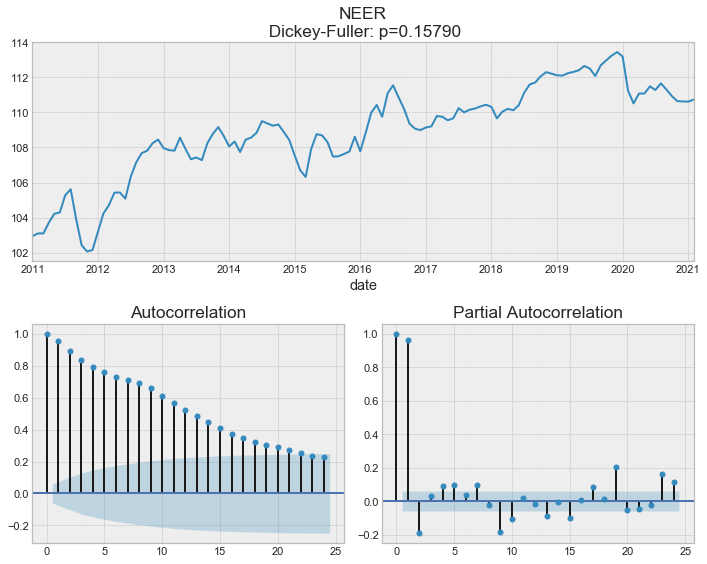

In [6]:
tsplot(data.neer, lags=24, title='NEER')

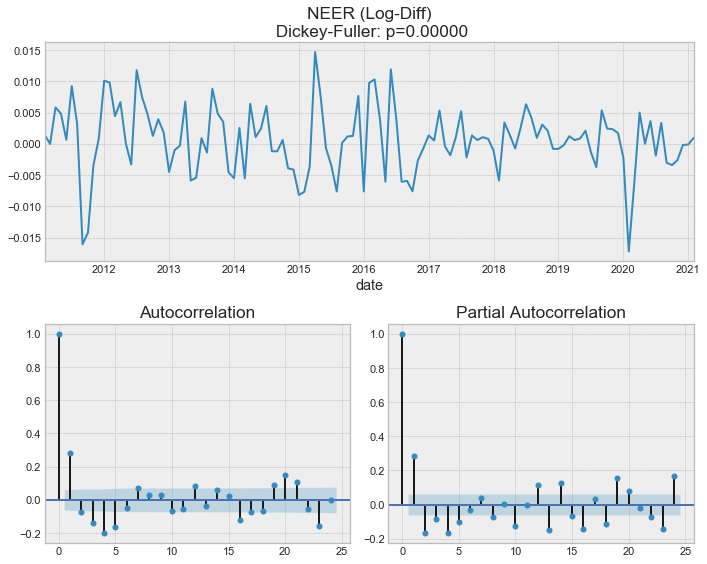

In [7]:
tsplot(np.log(data.neer+1).diff().dropna(), lags=24, title = 'NEER (Log-Diff)')

## Consumer Price Index (CPI)

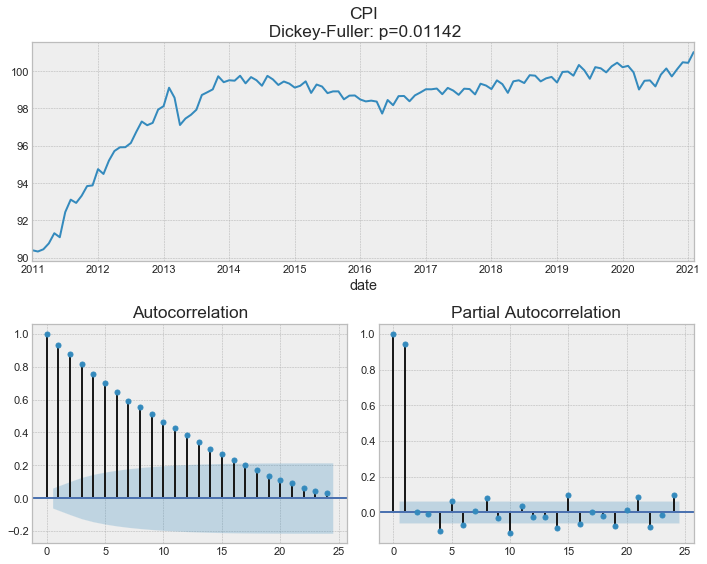

In [8]:
tsplot(data['cpi'], lags=24, title = 'CPI')

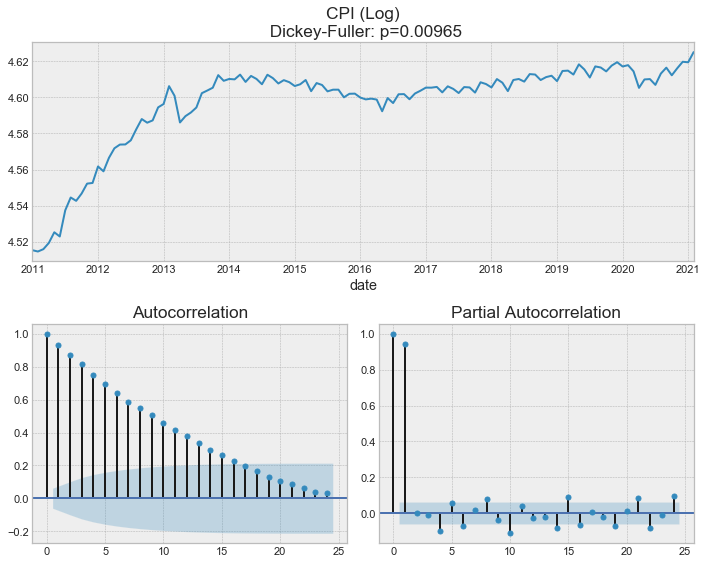

In [9]:
tsplot(np.log(data['cpi']+1), lags=24, title = 'CPI (Log)')

## Import Price Index

C:\Users\Reverse\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


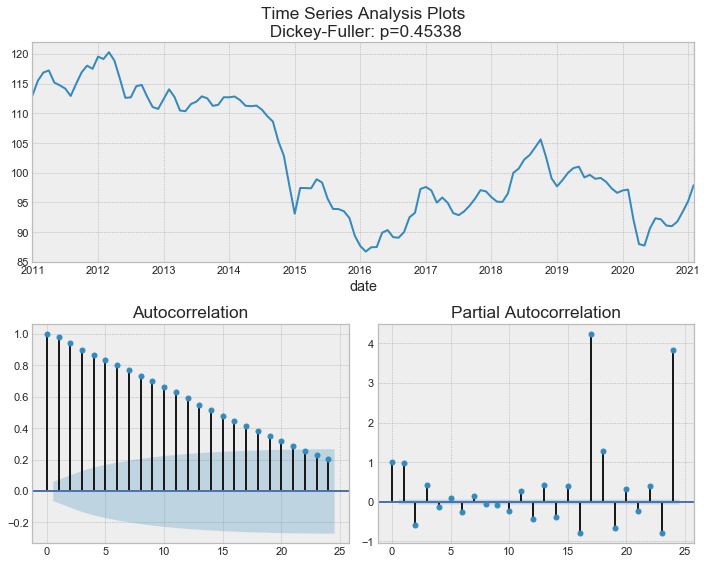

In [10]:
tsplot(data.import_price_index, lags=24)

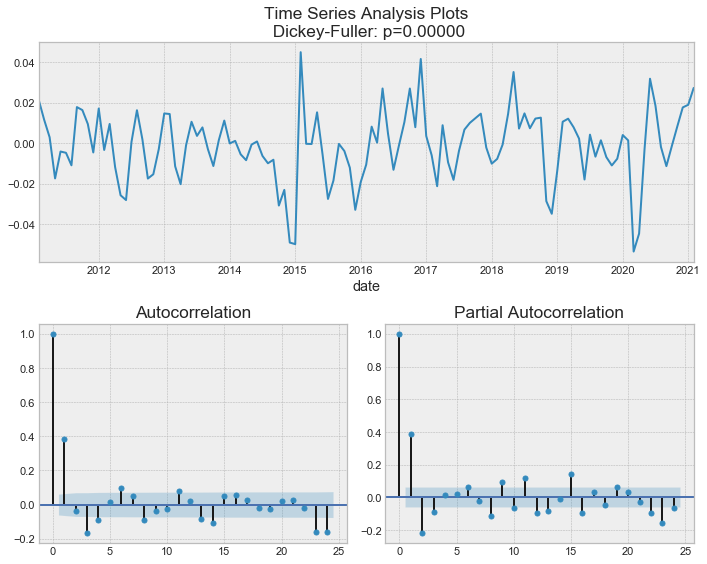

In [11]:
tsplot(np.log(data.import_price_index+1).diff().dropna(), lags=24)

## Import Price Index Non Oil

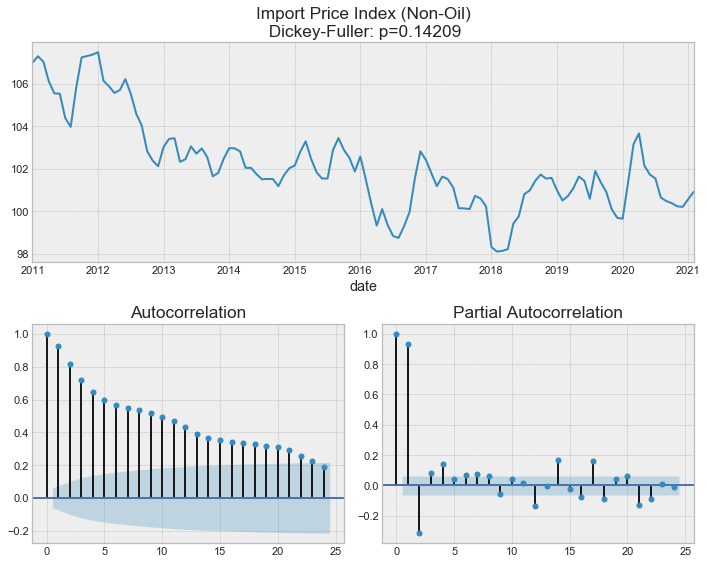

In [12]:
tsplot(data.import_price_index_non_oil, lags=24, title="Import Price Index (Non-Oil)")

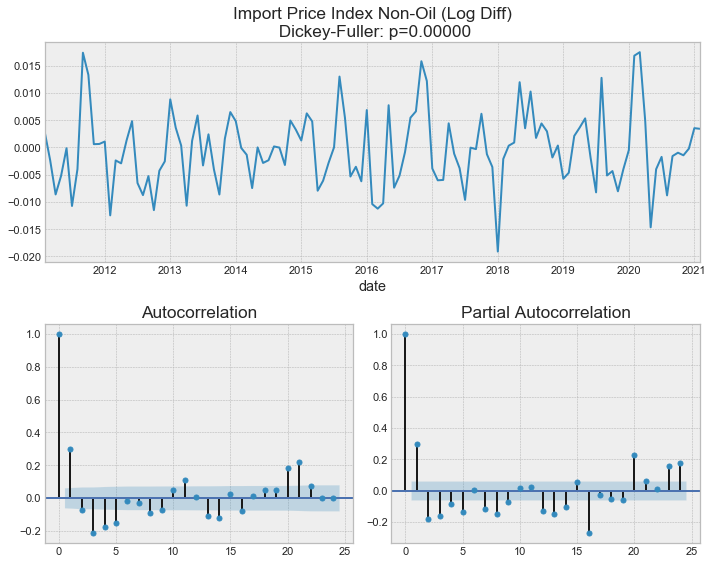

In [13]:
tsplot(np.log(data.import_price_index_non_oil+1).diff().dropna(), lags=24, title="Import Price Index Non-Oil (Log Diff)")

# Main Model (NEER, Import Price Index, CPI)
## VAR

In [14]:
data = data.dropna(axis=1)
data.columns

Index(['neer', 'cpi', 'import_price_index', 'import_price_index_non_oil',
       'import_price_index_food', 'cpi_food', 'import_price_index_clothing',
       'cpi_clothing', 'import_price_index_footwear', 'cpi_footwear',
       'import_price_index_telecommunication_equipment',
       'cpi_telecommunication_equipment',
       'import_price_index_beverages_tobacco', 'cpi_alcohol_tobacco'],
      dtype='object')

In [15]:
data_trans = pd.concat([
                        np.log(data.neer+1).diff().dropna(), 
                        np.log(data.import_price_index+1).diff().dropna(),
                        np.log(data.cpi+1),
                       ], axis = 1)
data_trans = data_trans.iloc[1:] #since some variables use diff

In [16]:
data_trans

neer  import_price_index       cpi
date                                              
2011-02-01  0.001442            0.021490  4.514578
2011-03-01  0.000000            0.011614  4.515880
2011-04-01  0.005842            0.002982  4.519329
2011-05-01  0.004858           -0.017355  4.525239
2011-06-01  0.000665           -0.004062  4.522908
...              ...                 ...       ...
2020-10-01 -0.003389           -0.001325  4.612255
2020-11-01 -0.002594            0.008325  4.616160
2020-12-01 -0.000179            0.017705  4.619753
2021-01-01 -0.000090            0.019009  4.619467
2021-02-01  0.000985            0.027328  4.625120

[121 rows x 3 columns]

In [17]:
from statsmodels.tsa.api import VAR
order = 15
model = VAR(data_trans)
model.select_order(order).summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [18]:
# for o in list(range(1, 20)):
orders = model.select_order(order).selected_orders
orders
for o in orders.values():
    if o == 0:
        continue
    print(f'Order: {o}')
    results = model.fit(o)
    print(results.is_stable())
    print(results.test_whiteness())
    print()


Order: 3
True
<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 10 is zero: fail to reject at 5% significance level. Test statistic: 64.362, critical value: 82.529>, p-value: 0.429>

Order: 1
True
<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 10 is zero: reject at 5% significance level. Test statistic: 157.592, critical value: 103.010>, p-value: 0.000>

Order: 1
True
<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 10 is zero: reject at 5% significance level. Test statistic: 157.592, critical value: 103.010>, p-value: 0.000>

Order: 3
True
<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 10 is zero: fail to reject at 5% significance level. Test statistic: 64.362, critical value: 82.529>, p-value: 0.429>



### Impulse Response Analysis

In [19]:
results = model.fit(3) 

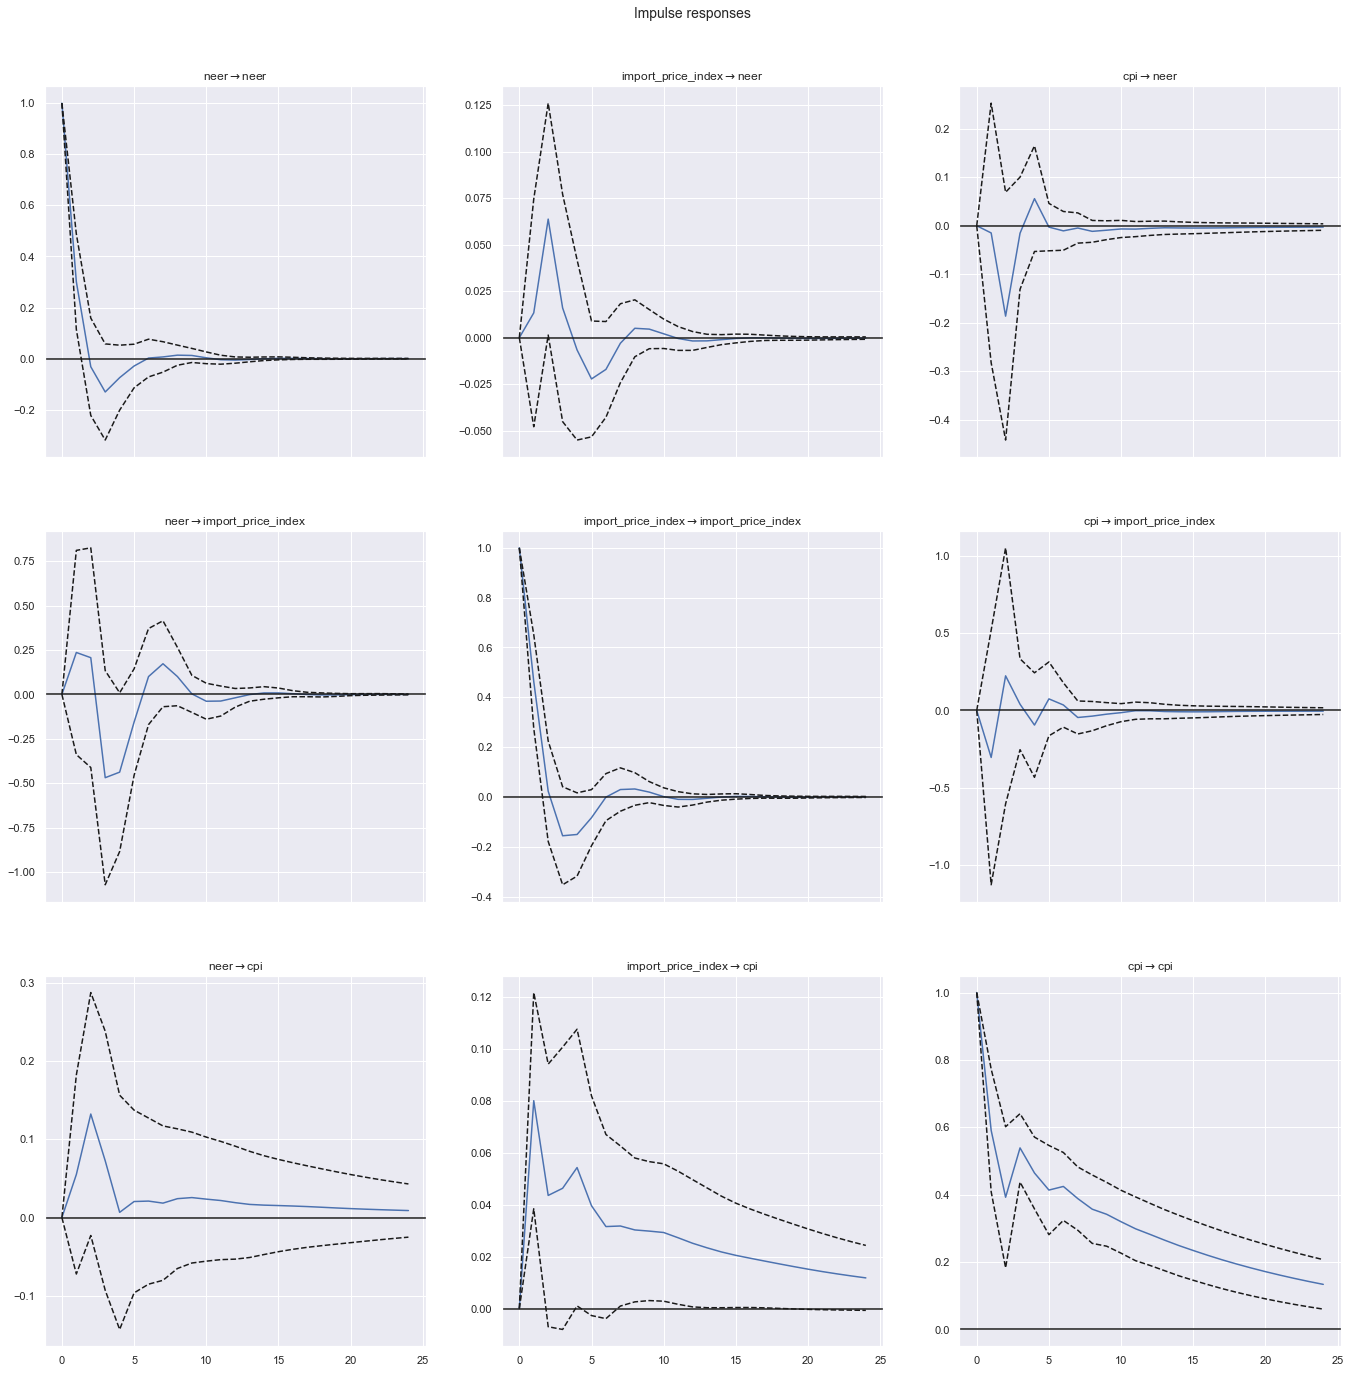

In [20]:
irf = results.irf(24)
irf_plot = irf.plot(orth=False,figsize=(20,20))

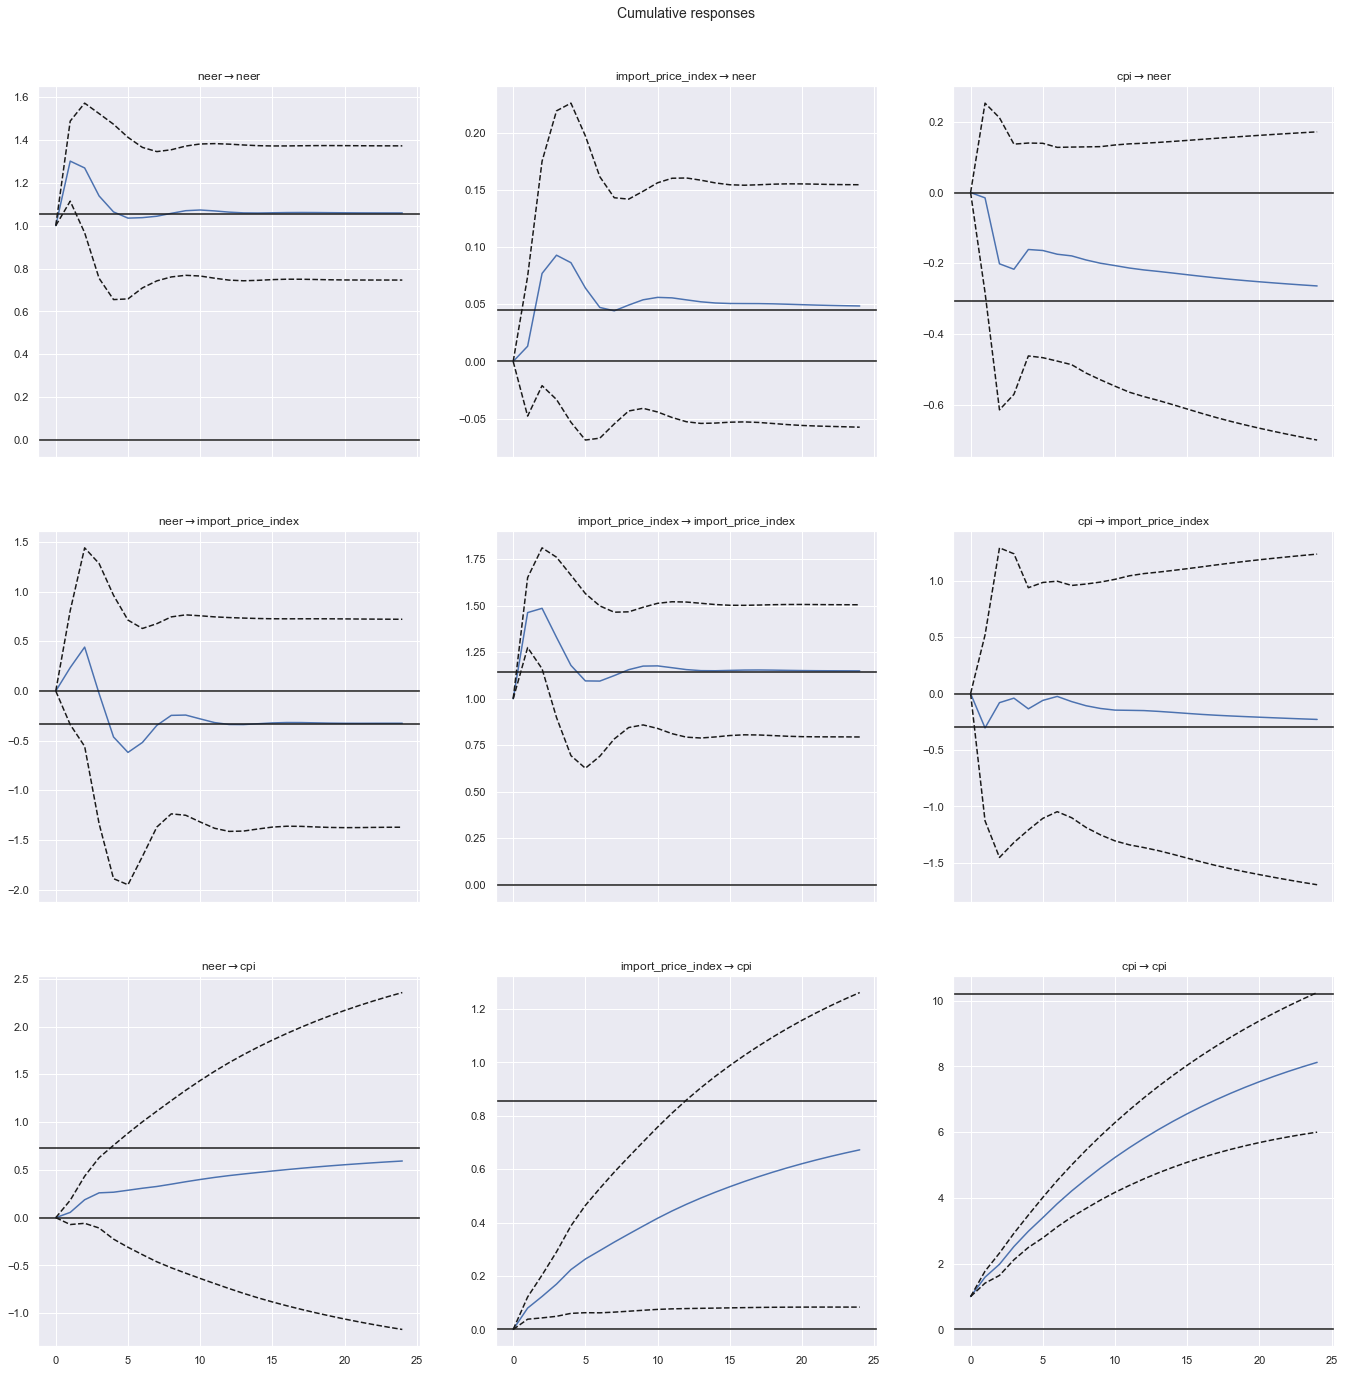

In [21]:
irf_cum_plot = irf.plot_cum_effects(orth=False,figsize=(20,20))

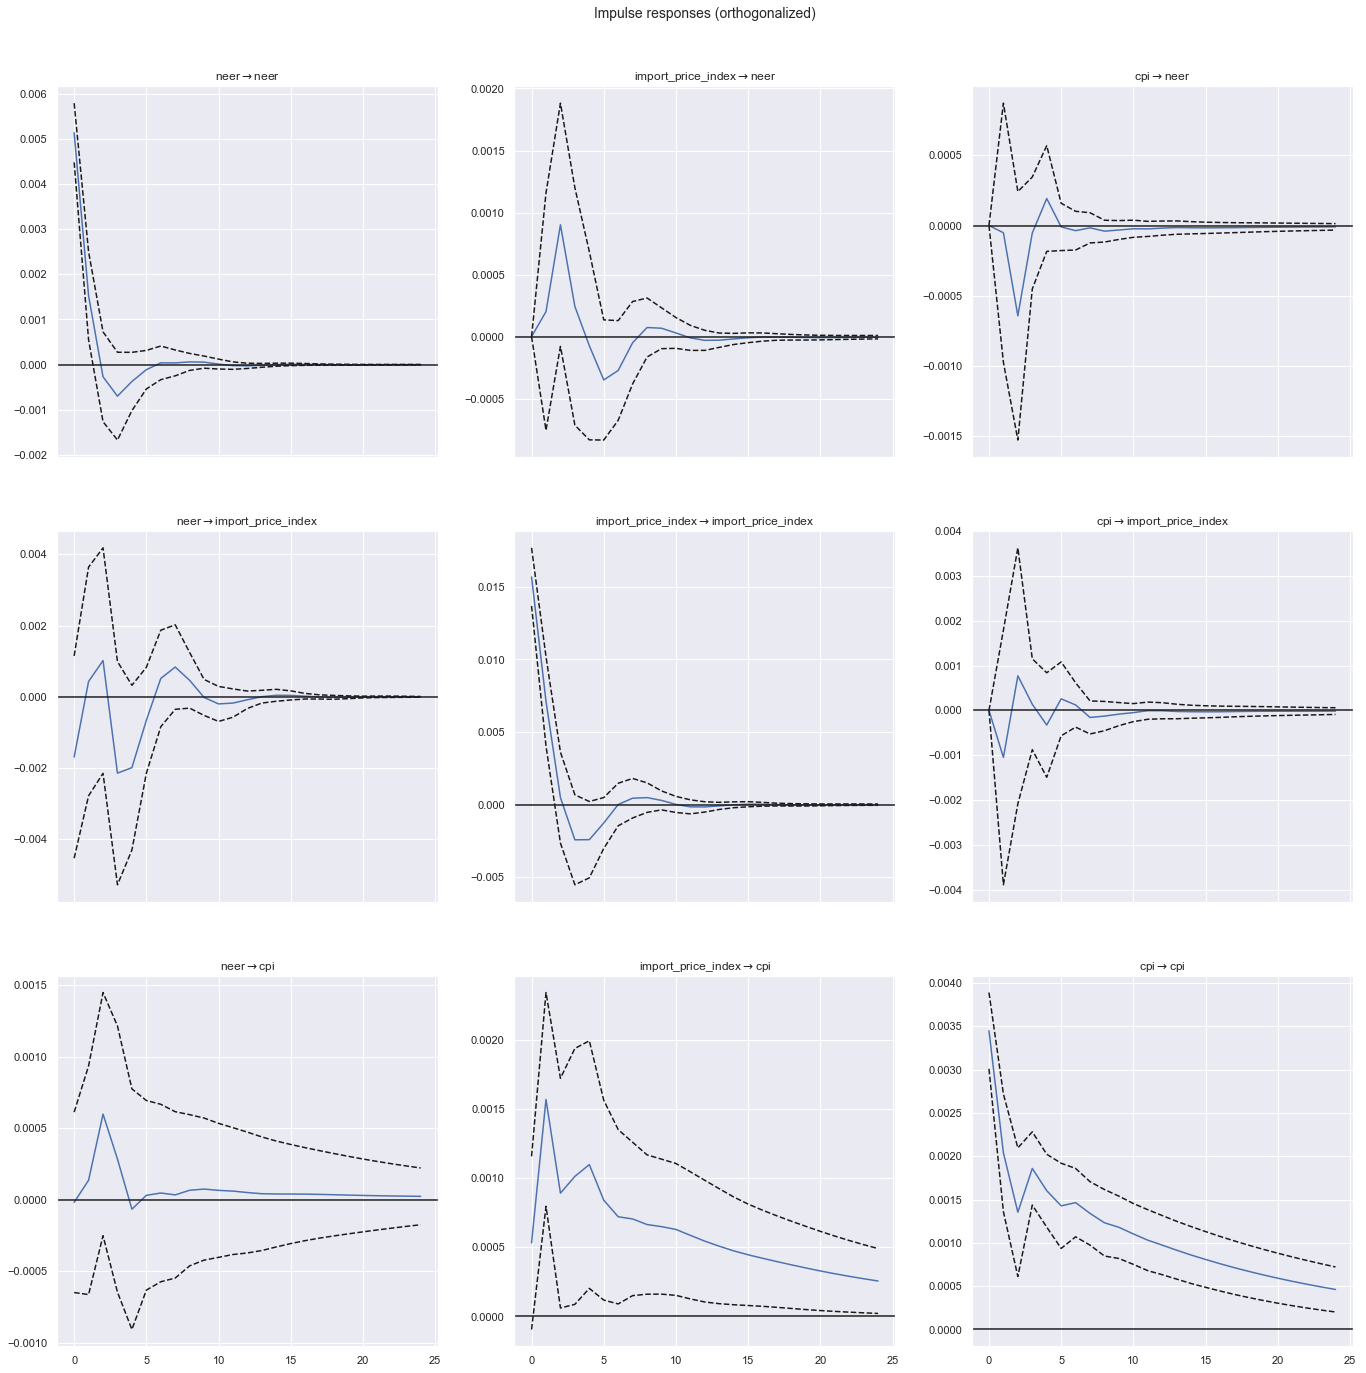

In [22]:
irf_orth_plot = irf.plot(orth=True,figsize=(20,20))

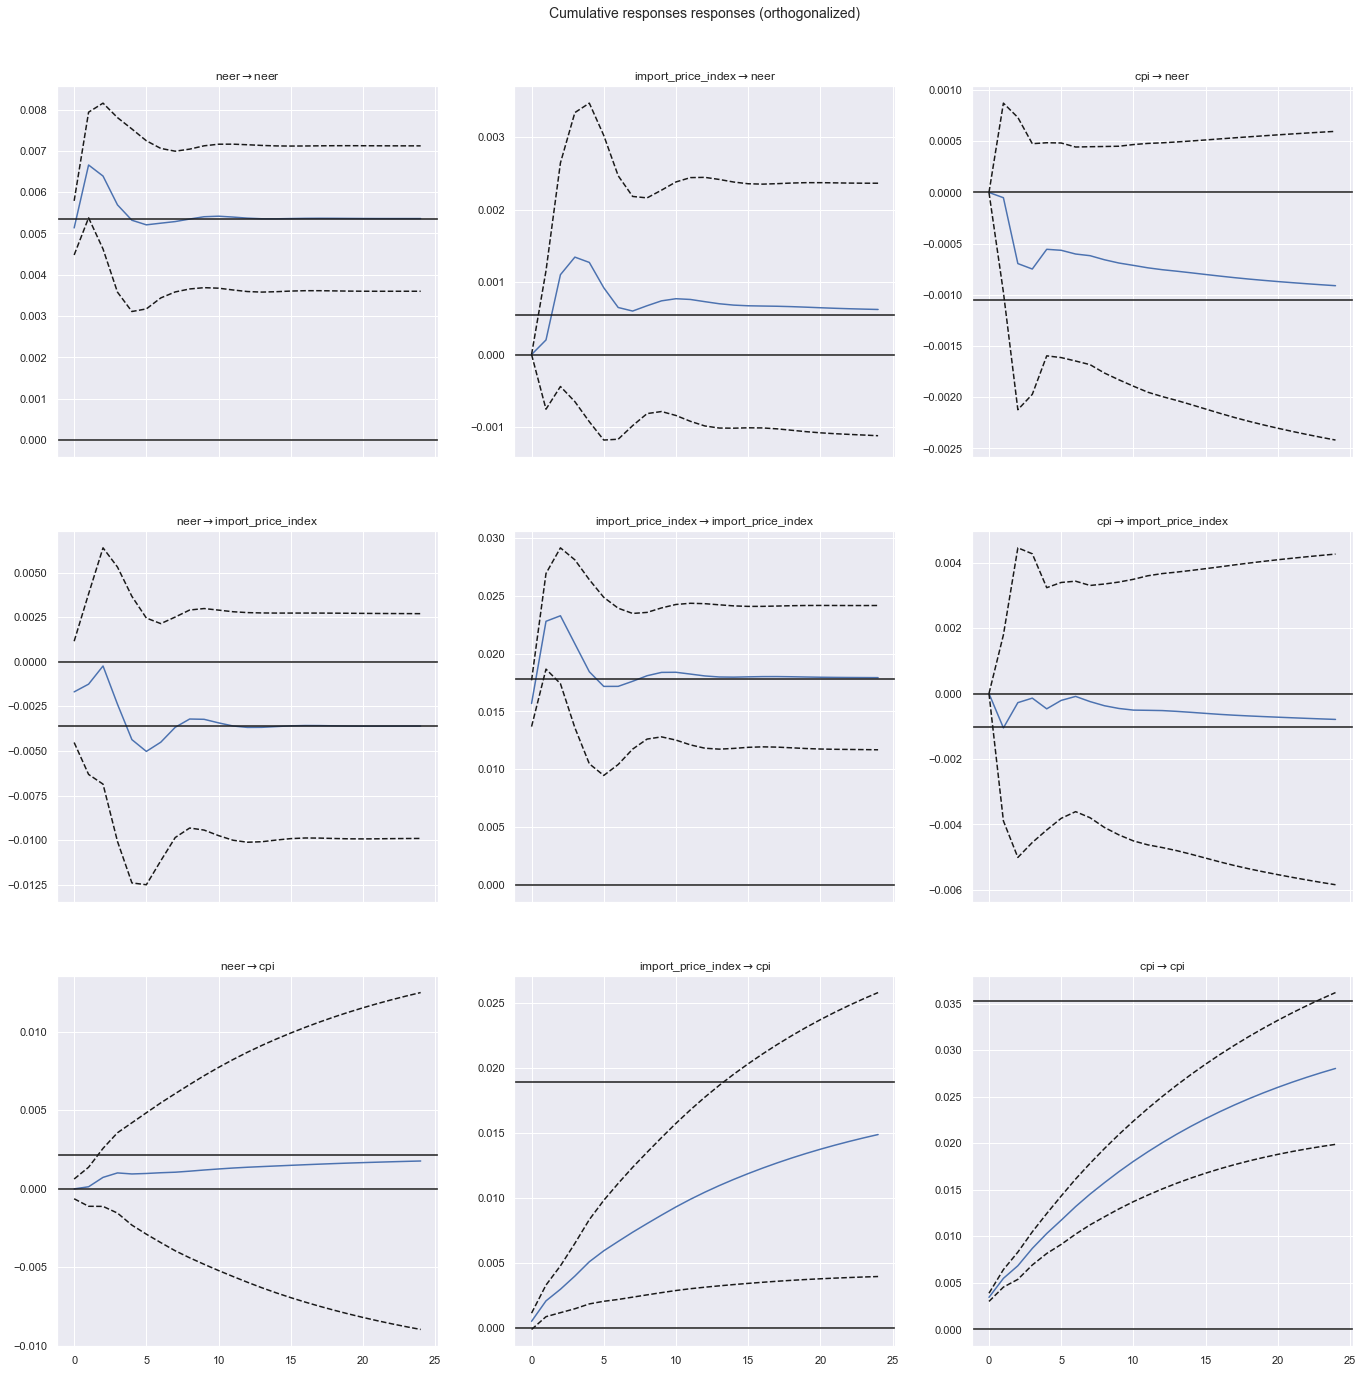

In [23]:
irf_orth_cum_plot = irf.plot_cum_effects(orth=True,figsize=(20,20))

### Forecast Error Decomposition

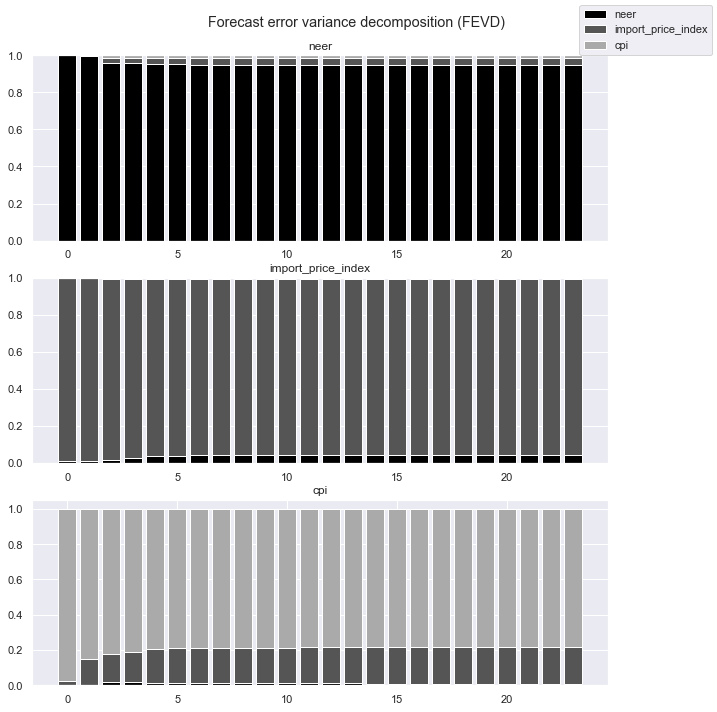

In [24]:
fevd = results.fevd(24).plot()

## Cointegration Testing/VECM
- From the cointegration test, r = 3 if using Crit-95% and r=1 if using Crit-99%.
- Hence, try running a VAR in levels and a VECM with coint_rank = 1

In [25]:
from statsmodels.tsa.vector_ar.vecm import VECM, coint_johansen

def print_coint_results(coint_results):
    print ('--------------------------------------------------')
    print ('--> Trace Statistics')
    print ('variable statistic Crit-90% Crit-95%  Crit-99%')
    for i in range(len(coint_results.lr1)):
        print ('r =', i, '\t', round(coint_results.lr1[i], 4), coint_results.cvt[i, 0], coint_results.cvt[i, 1], coint_results.cvt[i, 2])
    print ('--------------------------------------------------')

cols = ['neer', 'import_price_index','cpi']
coint_results = coint_johansen(np.log(data[cols]+1), det_order=0, k_ar_diff=1)
print_coint_results(coint_results)

--------------------------------------------------
--> Trace Statistics
variable statistic Crit-90% Crit-95%  Crit-99%
r = 0 	 39.9008 27.0669 29.7961 35.4628
r = 1 	 17.0081 13.4294 15.4943 19.9349
r = 2 	 6.3028 2.7055 3.8415 6.6349
--------------------------------------------------


### VAR in Levels

In [26]:
data_levels = pd.concat([
                        np.log(data.neer+1),
                        np.log(data.import_price_index+1),
                        np.log(data.cpi+1),
                       ], axis = 1)


In [27]:
from statsmodels.tsa.api import VAR
order = 15
model_levels = VAR(data_levels)
model_levels.select_order(order).summary()
#Order: 1, 2, 4

C:\Users\Reverse\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.table.SimpleTable'>

In [28]:
orders = model_levels.select_order(order).selected_orders
orders

{'aic': 3, 'bic': 1, 'hqic': 2, 'fpe': 3}

In [29]:
# for o in list(range(1, 20)):
for o in orders.values():
    if o == 0:
        continue
    print(f'Order: {o}')
    results = model_levels.fit(o)
    print(results.is_stable())
    print(results.test_whiteness())
    print()


Order: 3
True
<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 10 is zero: fail to reject at 5% significance level. Test statistic: 71.055, critical value: 82.529>, p-value: 0.227>

Order: 1
True
<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 10 is zero: reject at 5% significance level. Test statistic: 172.510, critical value: 103.010>, p-value: 0.000>

Order: 2
True
<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 10 is zero: reject at 5% significance level. Test statistic: 120.571, critical value: 92.808>, p-value: 0.000>

Order: 3
True
<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 10 is zero: fail to reject at 5% significance level. Test statistic: 71.055, critical value: 82.529>, p-value: 0.227>



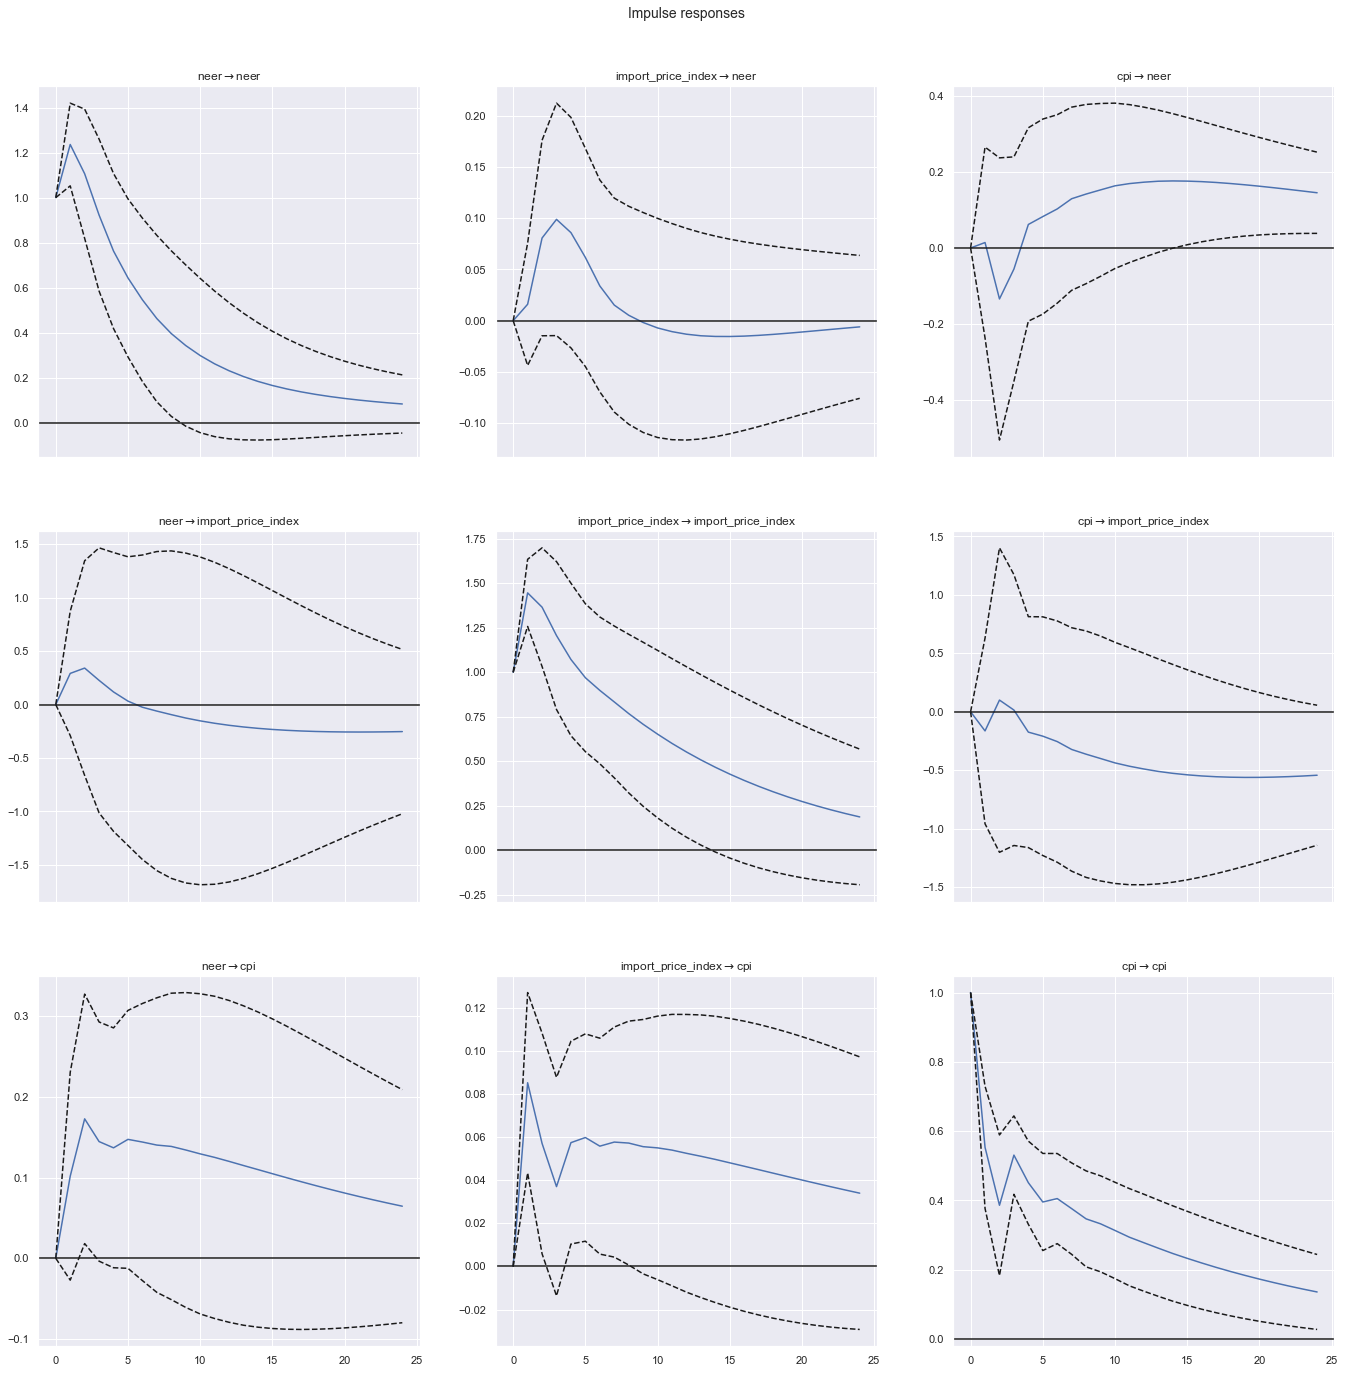

In [30]:
results_levels= model_levels.fit(3)
irf_levels = results_levels.irf(24)
irf_plot_levels = irf_levels.plot(orth=False,figsize=(20,20))

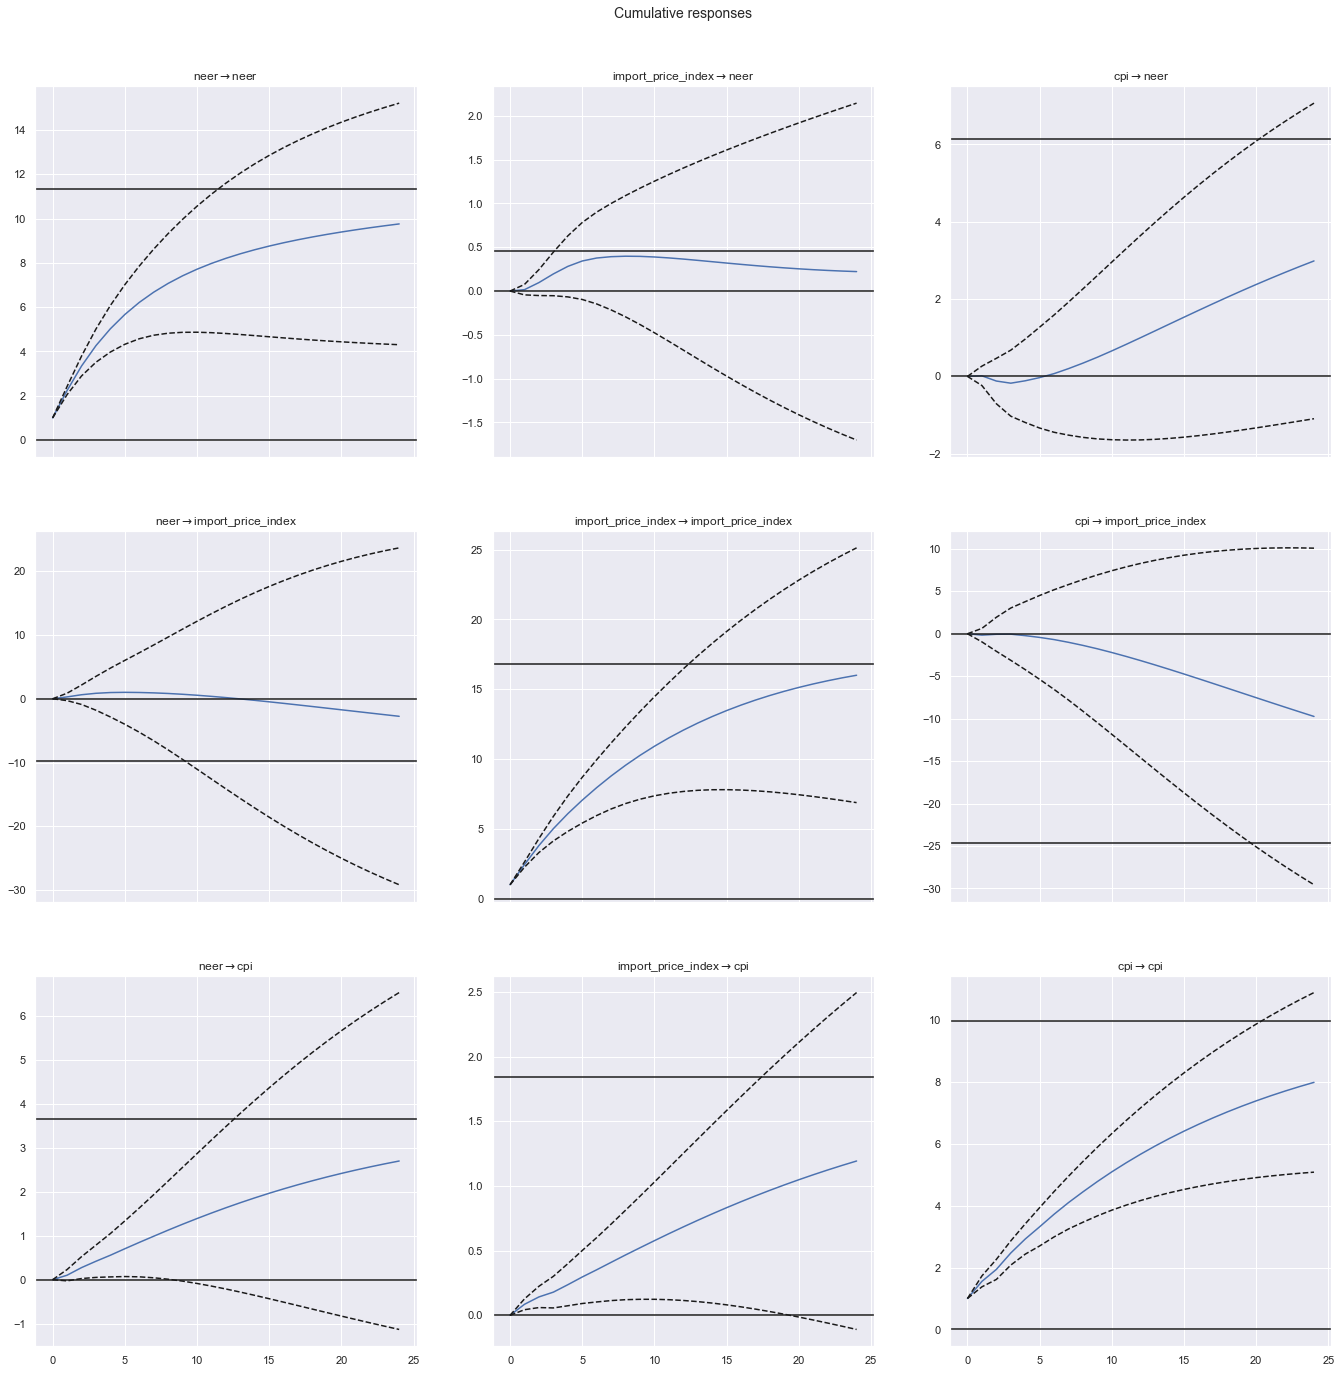

In [31]:
irf_cum_plot_levels = irf_levels.plot_cum_effects(orth=False,figsize=(20,20))

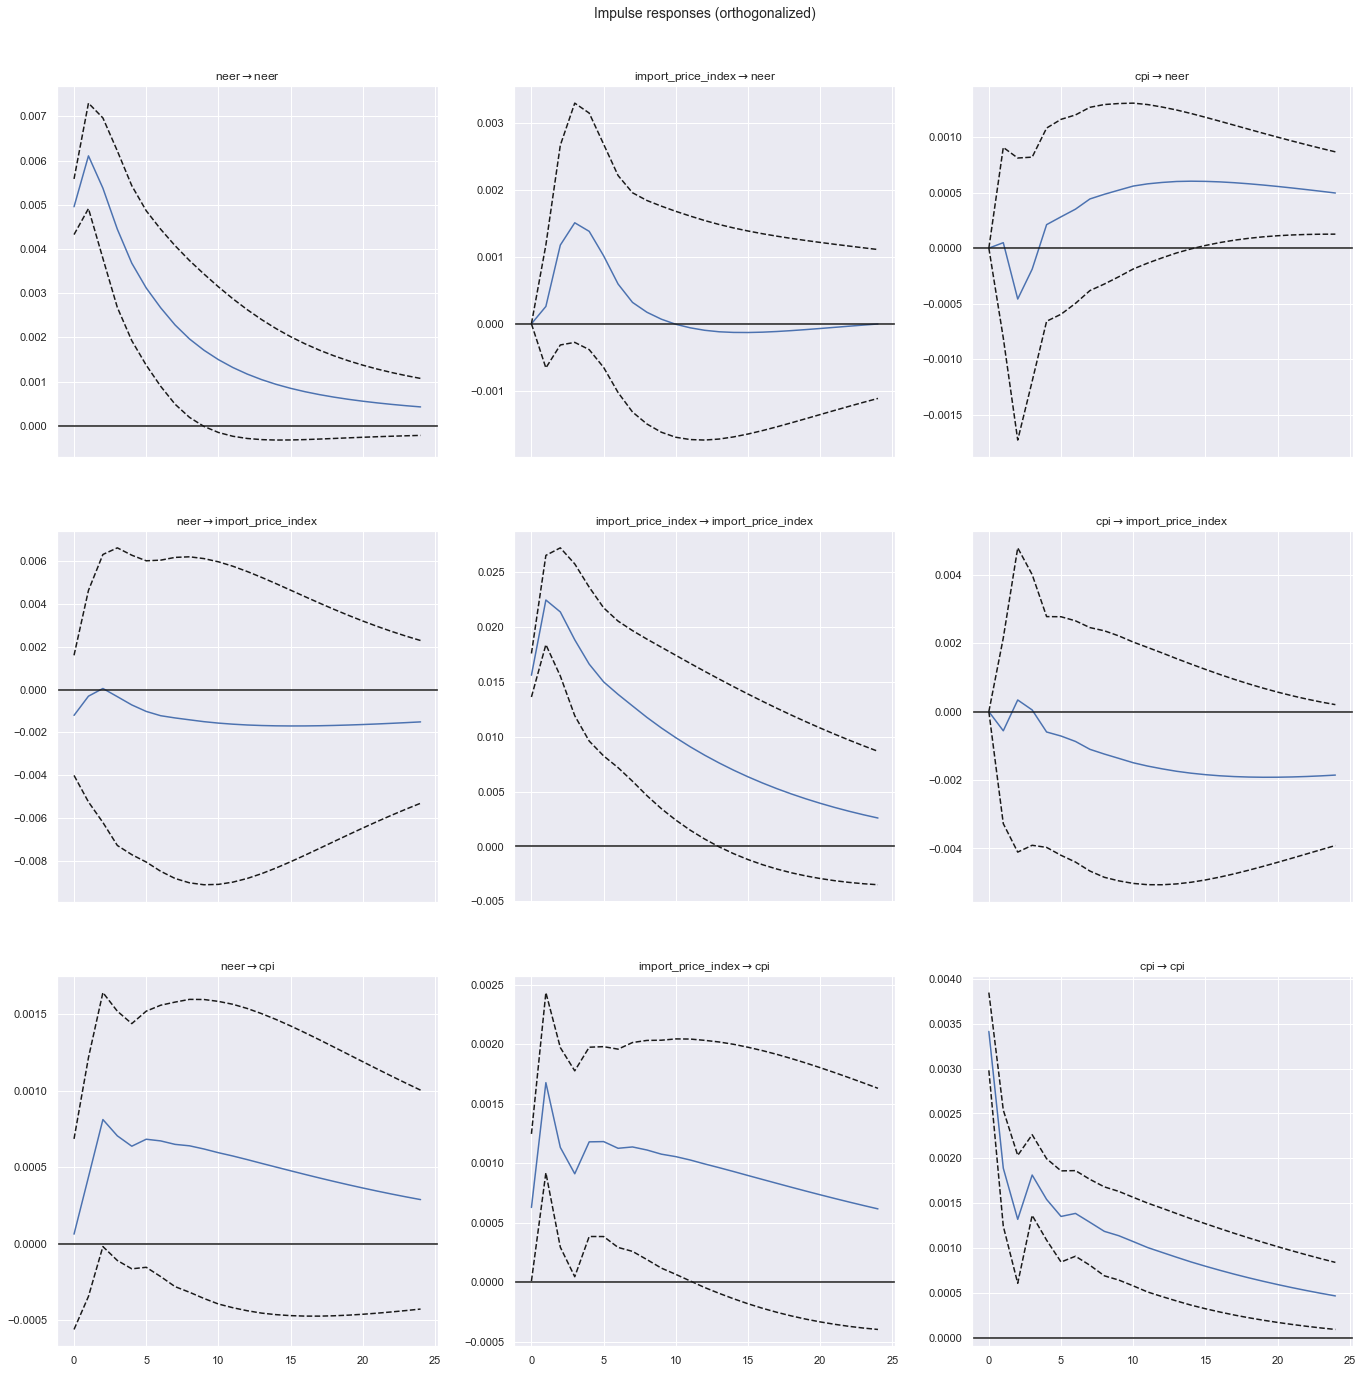

In [32]:
irf_plot_levels = irf_levels.plot(orth=True,figsize=(20,20))

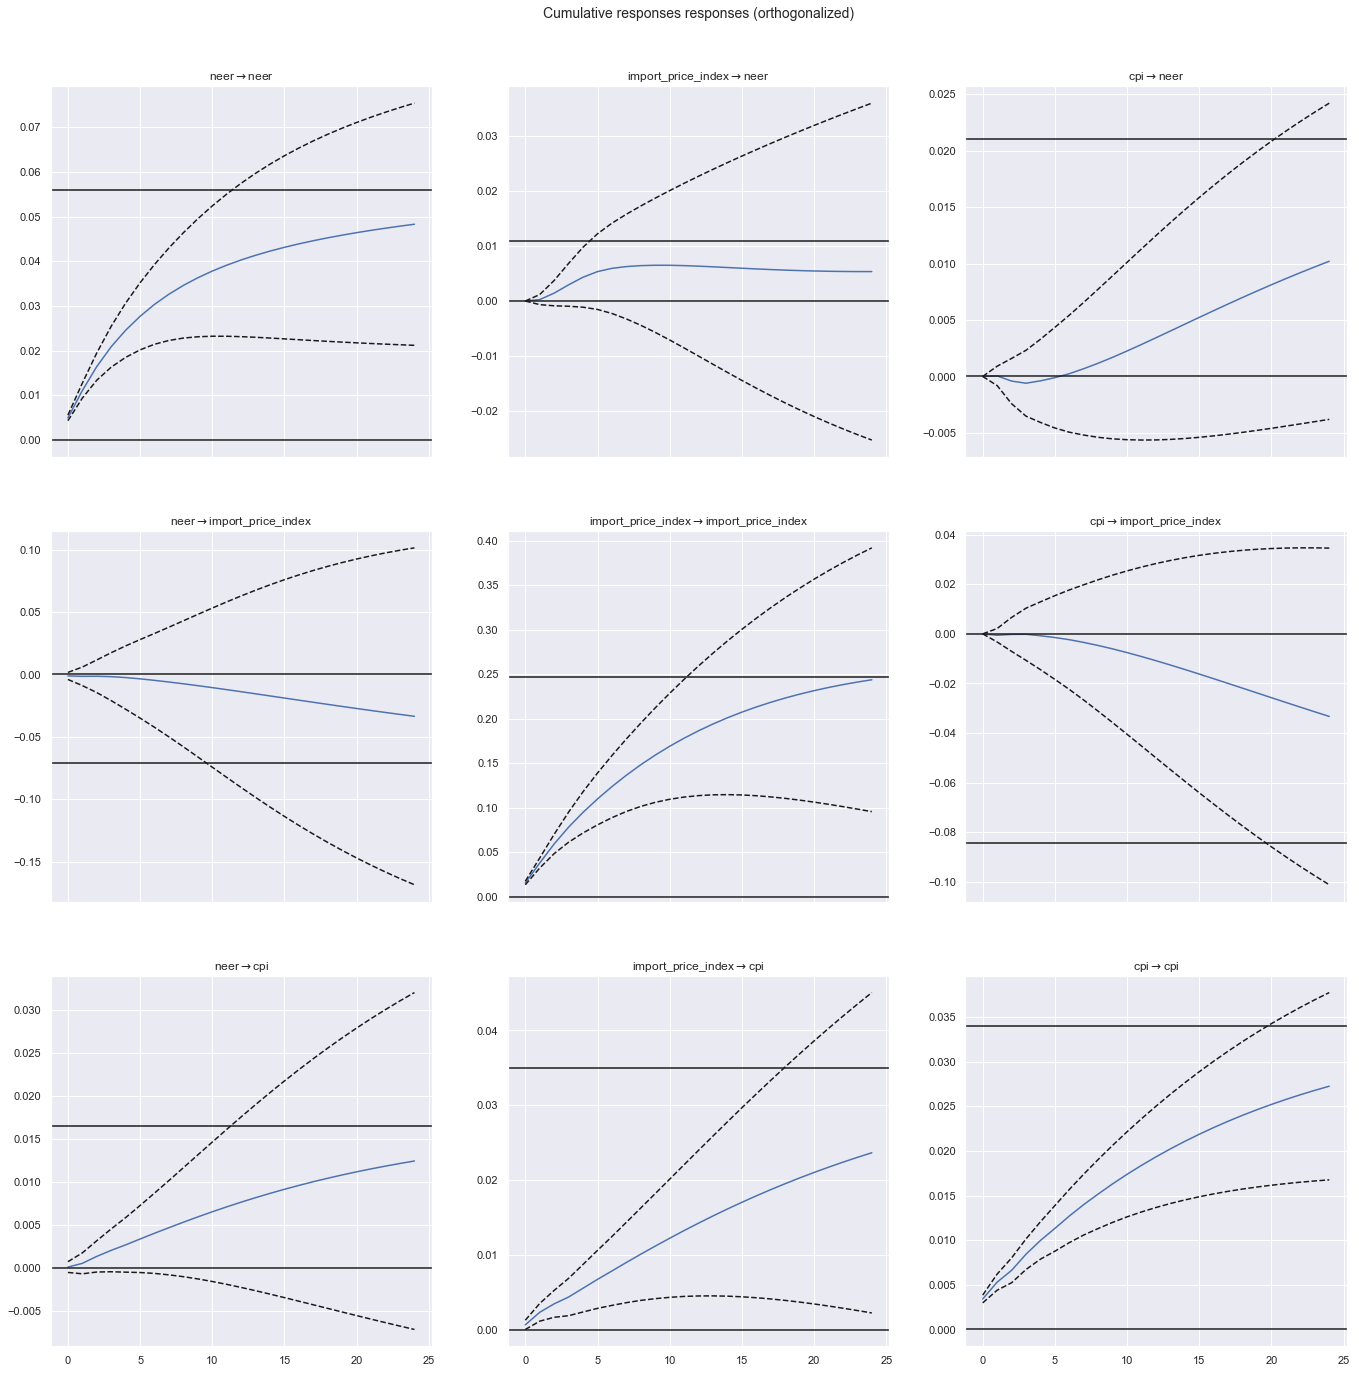

In [33]:
irf_cum_plot_levels = irf_levels.plot_cum_effects(orth=True,figsize=(20,20))

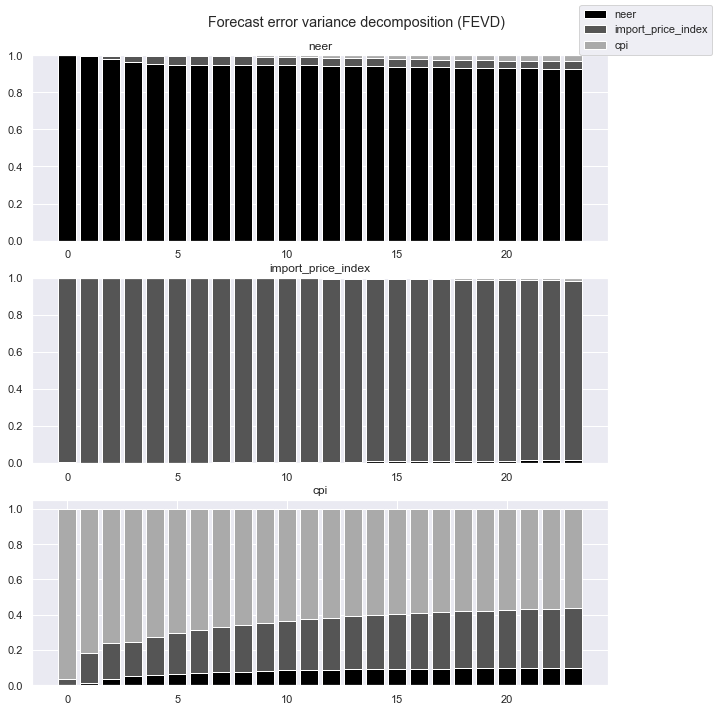

In [34]:
fevd = results_levels.fevd(24).plot()

In [35]:
vecm_model = VECM(endog = data_levels, k_ar_diff = 1, coint_rank = 1, deterministic = 'co')
vecm_fit = vecm_model.fit()
vecm_fit.summary()
print(vecm_fit.test_whiteness())

<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 10 is zero: reject at 5% significance level. Test statistic: 125.981, critical value: 99.617>, p-value: 0.000>


C:\Users\Reverse\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [36]:
#Since original VECM model is not residual whitenoise, try k_ar_diff = 2
coint_results = coint_johansen(np.log(data[cols]+1), det_order=0, k_ar_diff=2)
print_coint_results(coint_results)

--------------------------------------------------
--> Trace Statistics
variable statistic Crit-90% Crit-95%  Crit-99%
r = 0 	 52.5745 27.0669 29.7961 35.4628
r = 1 	 15.2955 13.4294 15.4943 19.9349
r = 2 	 5.6632 2.7055 3.8415 6.6349
--------------------------------------------------


In [37]:
#With K_ar_diff = 2, rank = 1. Try VECM model with coint_rank = 1, k_ar_diff = 2
#Model is now adequate
vecm_model = VECM(endog = data_levels, k_ar_diff = 2, coint_rank = 1, deterministic = 'co')
vecm_fit = vecm_model.fit()
vecm_fit.summary()
print(vecm_fit.test_whiteness())

<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 10 is zero: fail to reject at 5% significance level. Test statistic: 75.049, critical value: 89.391>, p-value: 0.289>


C:\Users\Reverse\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [38]:
vecm_irf = vecm_fit.irf(24)

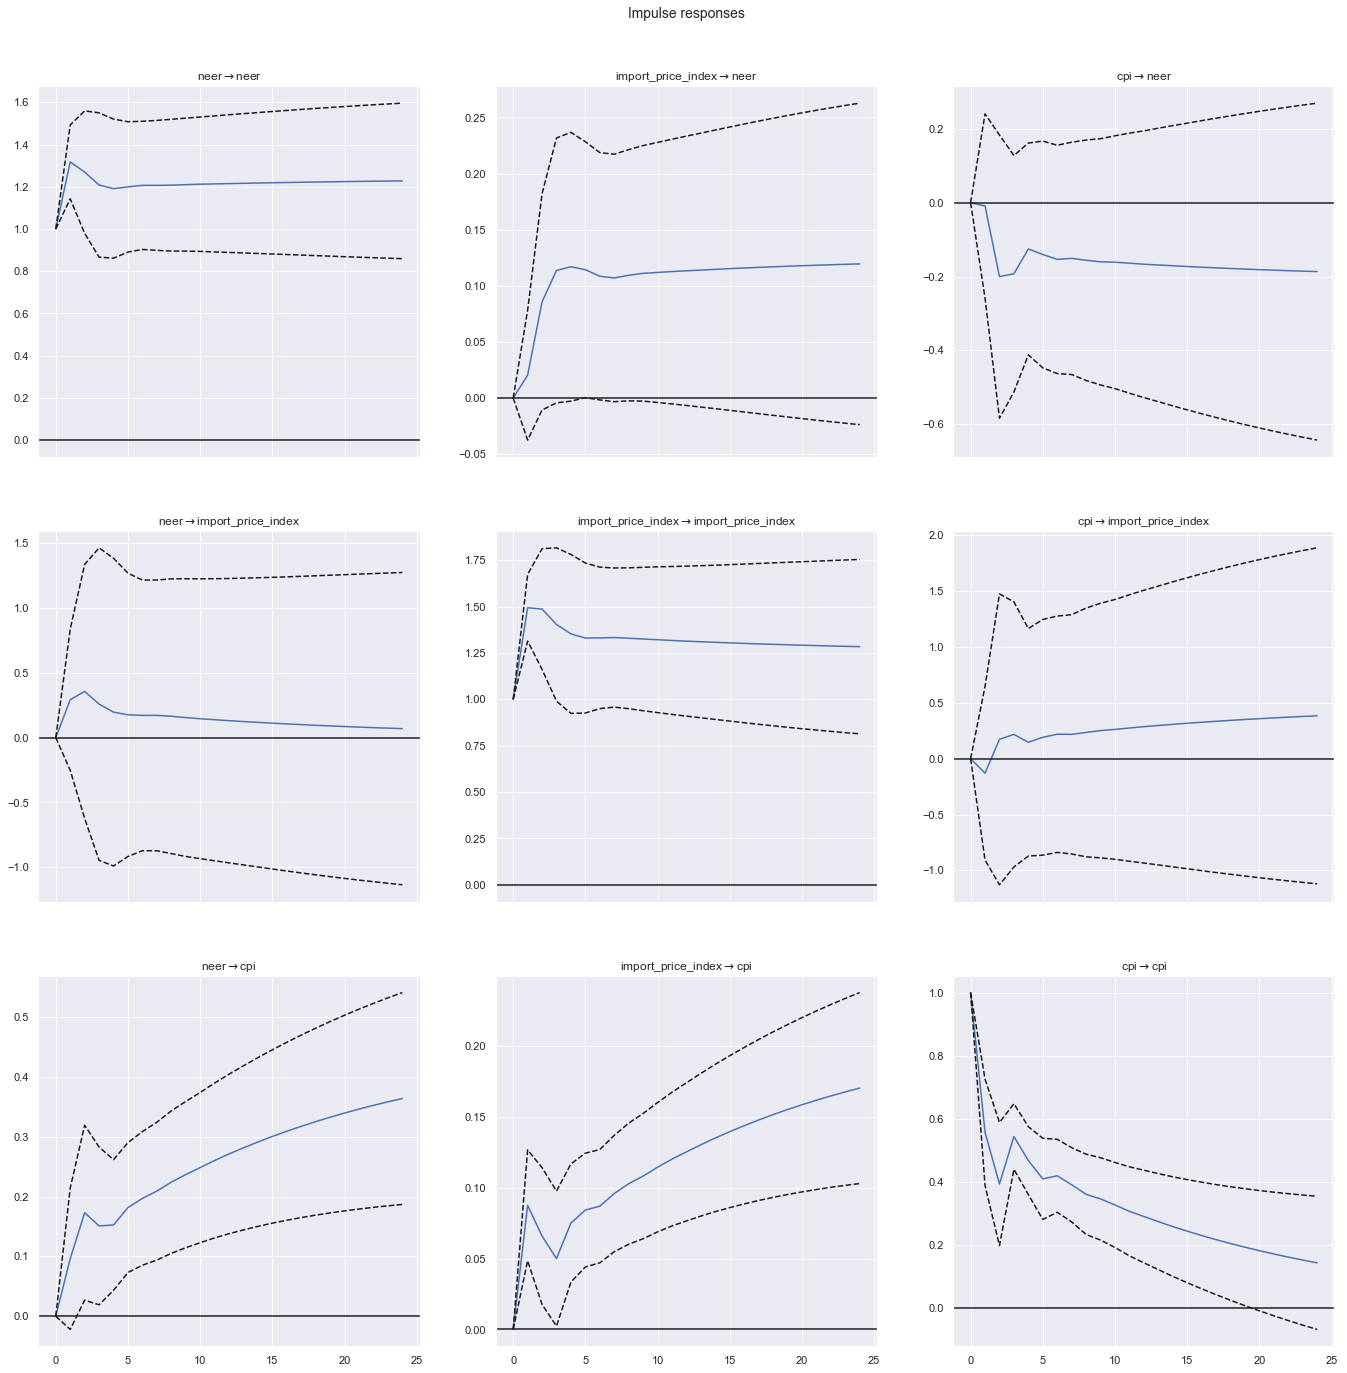

In [39]:
vecm_irf_plot = vecm_irf.plot(figsize=(20,20), orth=False)

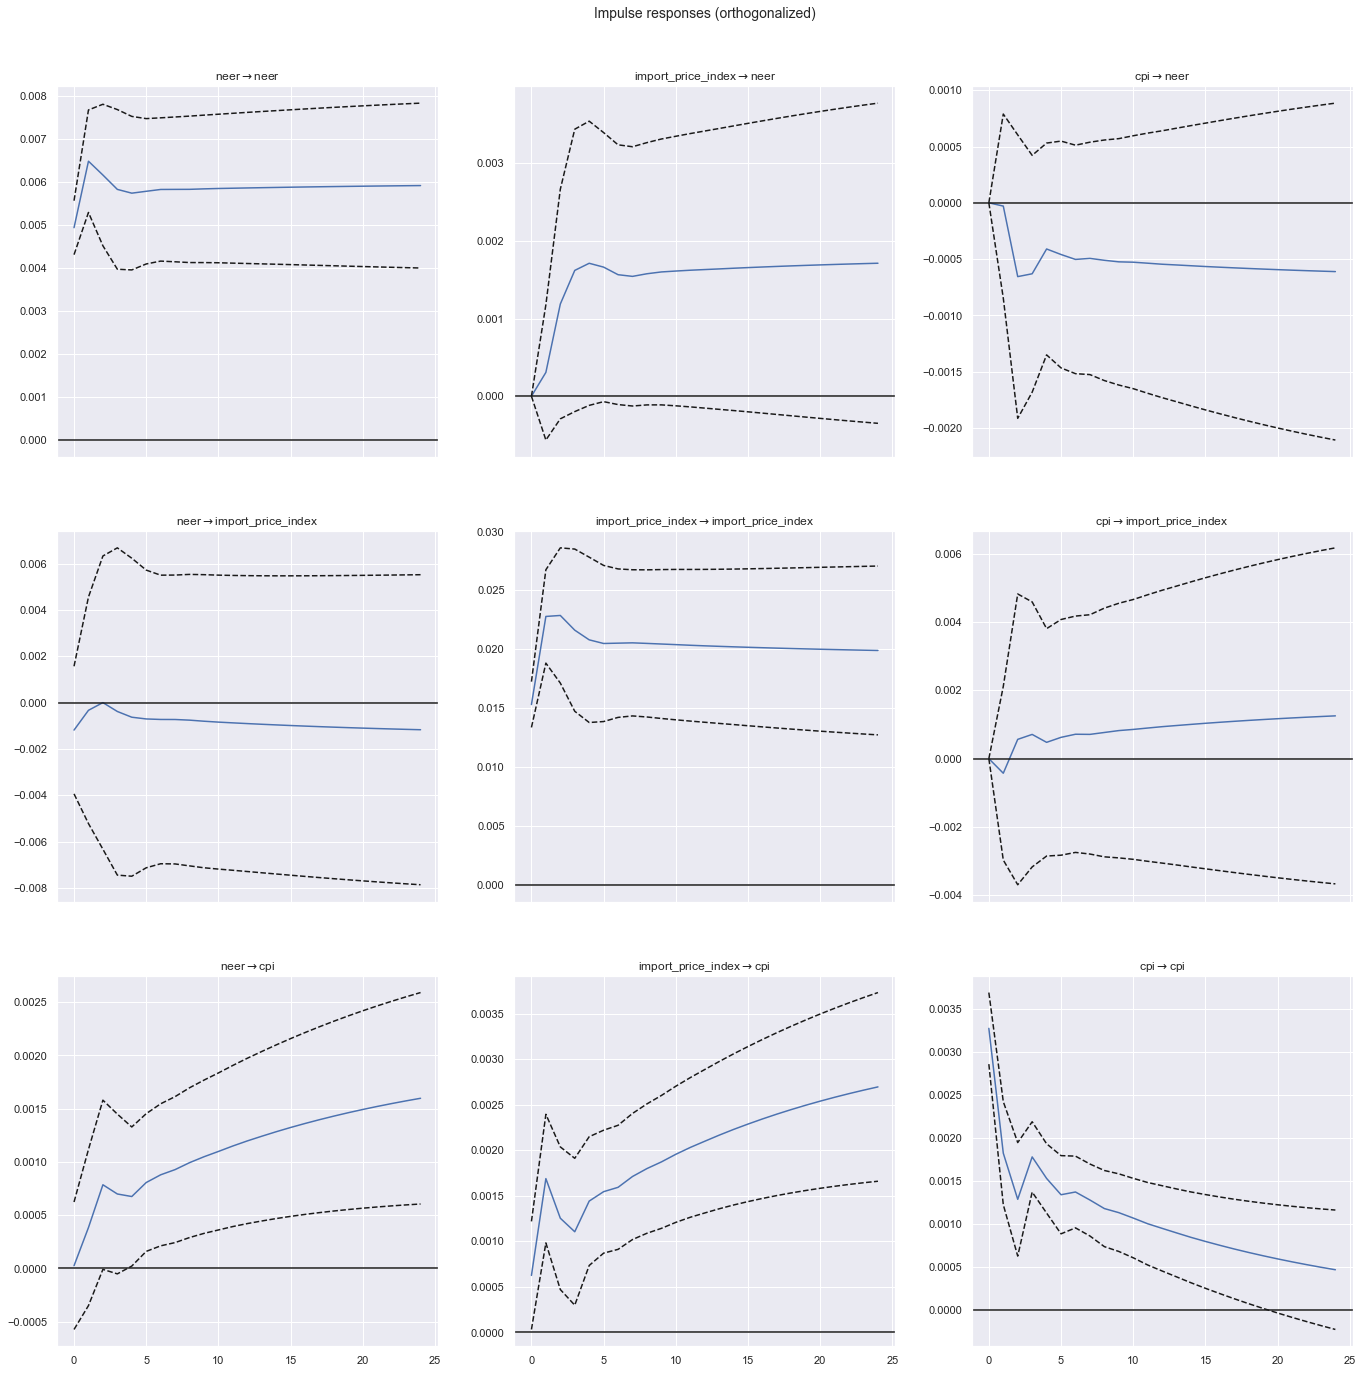

In [40]:
vecm_irf_plot = vecm_irf.plot(figsize=(20,20), orth=True)

# Alternative Model: NEER, Import Price Index (Non-Oil), CPI Adjusted

## VAR Model

In [41]:
data_trans = pd.concat([
                        np.log(data.neer+1).diff().dropna(), 
                        np.log(data.import_price_index_non_oil+1).diff().dropna(),
                        np.log(data.cpi+1),
                       ], axis = 1)
data_trans = data_trans.iloc[1:] #since some variables do not use diff
data_trans

neer  import_price_index_non_oil       cpi
date                                                      
2011-02-01  0.001442                    0.002830  4.514578
2011-03-01  0.000000                   -0.002367  4.515880
2011-04-01  0.005842                   -0.008645  4.519329
2011-05-01  0.004858                   -0.005233  4.525239
2011-06-01  0.000665                   -0.000160  4.522908
...              ...                         ...       ...
2020-10-01 -0.003389                   -0.000986  4.612255
2020-11-01 -0.002594                   -0.001461  4.616160
2020-12-01 -0.000179                   -0.000237  4.619753
2021-01-01 -0.000090                    0.003521  4.619467
2021-02-01  0.000985                    0.003401  4.625120

[121 rows x 3 columns]

In [42]:
from statsmodels.tsa.api import VAR
order = 20
model = VAR(data_trans)
model.select_order(order).summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [47]:
orders = model.select_order(order).selected_orders

for o in list(range(1, 10)):

# for o in orders.values():
    if o == 0:
        continue
    print(f'Order: {o}')
    results = model.fit(o)
    print(results.is_stable())
    print(results.test_whiteness())
    print()


Order: 1
True
<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 10 is zero: reject at 5% significance level. Test statistic: 133.965, critical value: 103.010>, p-value: 0.000>

Order: 2
True
<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 10 is zero: reject at 5% significance level. Test statistic: 98.666, critical value: 92.808>, p-value: 0.020>

Order: 3
True
<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 10 is zero: fail to reject at 5% significance level. Test statistic: 64.263, critical value: 82.529>, p-value: 0.432>

Order: 4
True
<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 10 is zero: fail to reject at 5% significance level. Test statistic: 53.993, critical value: 72.153>, p-value: 0.475>

Or

### Impulse Response Analysis

In [48]:
results = model.fit(3) 

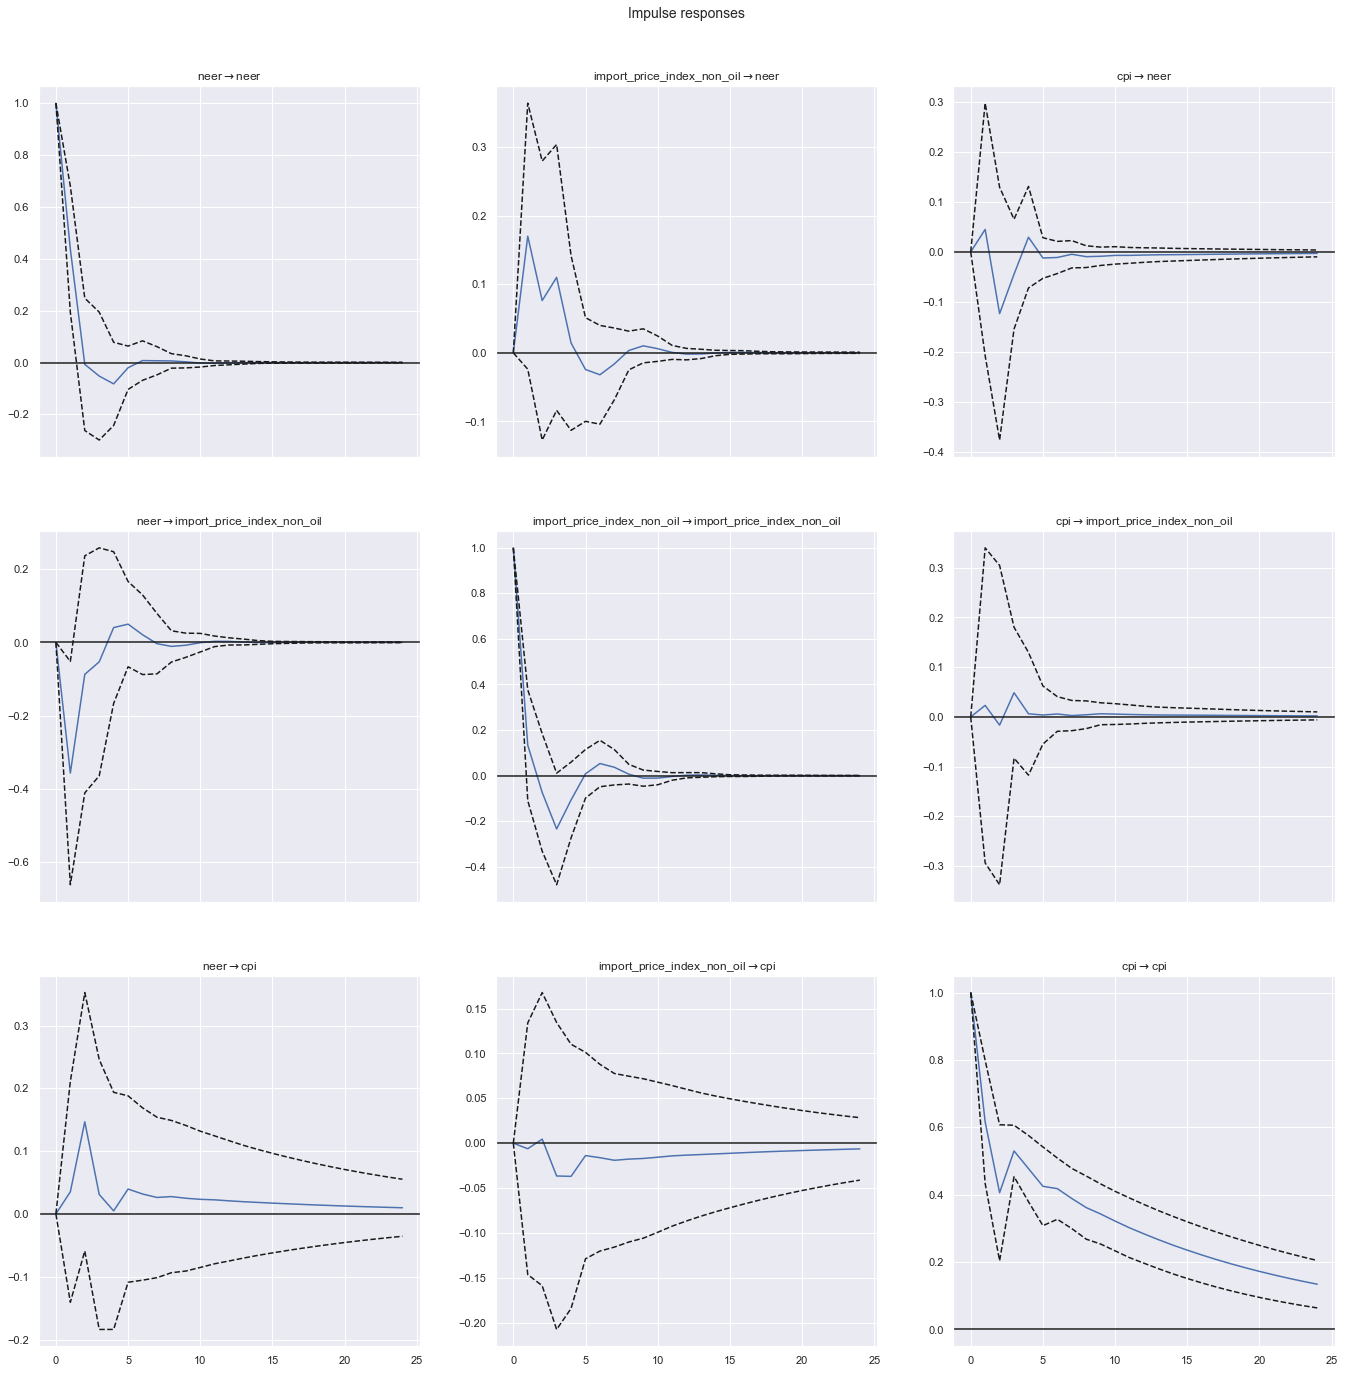

In [49]:
irf = results.irf(24)
irf_plot = irf.plot(orth=False,figsize=(20,20))

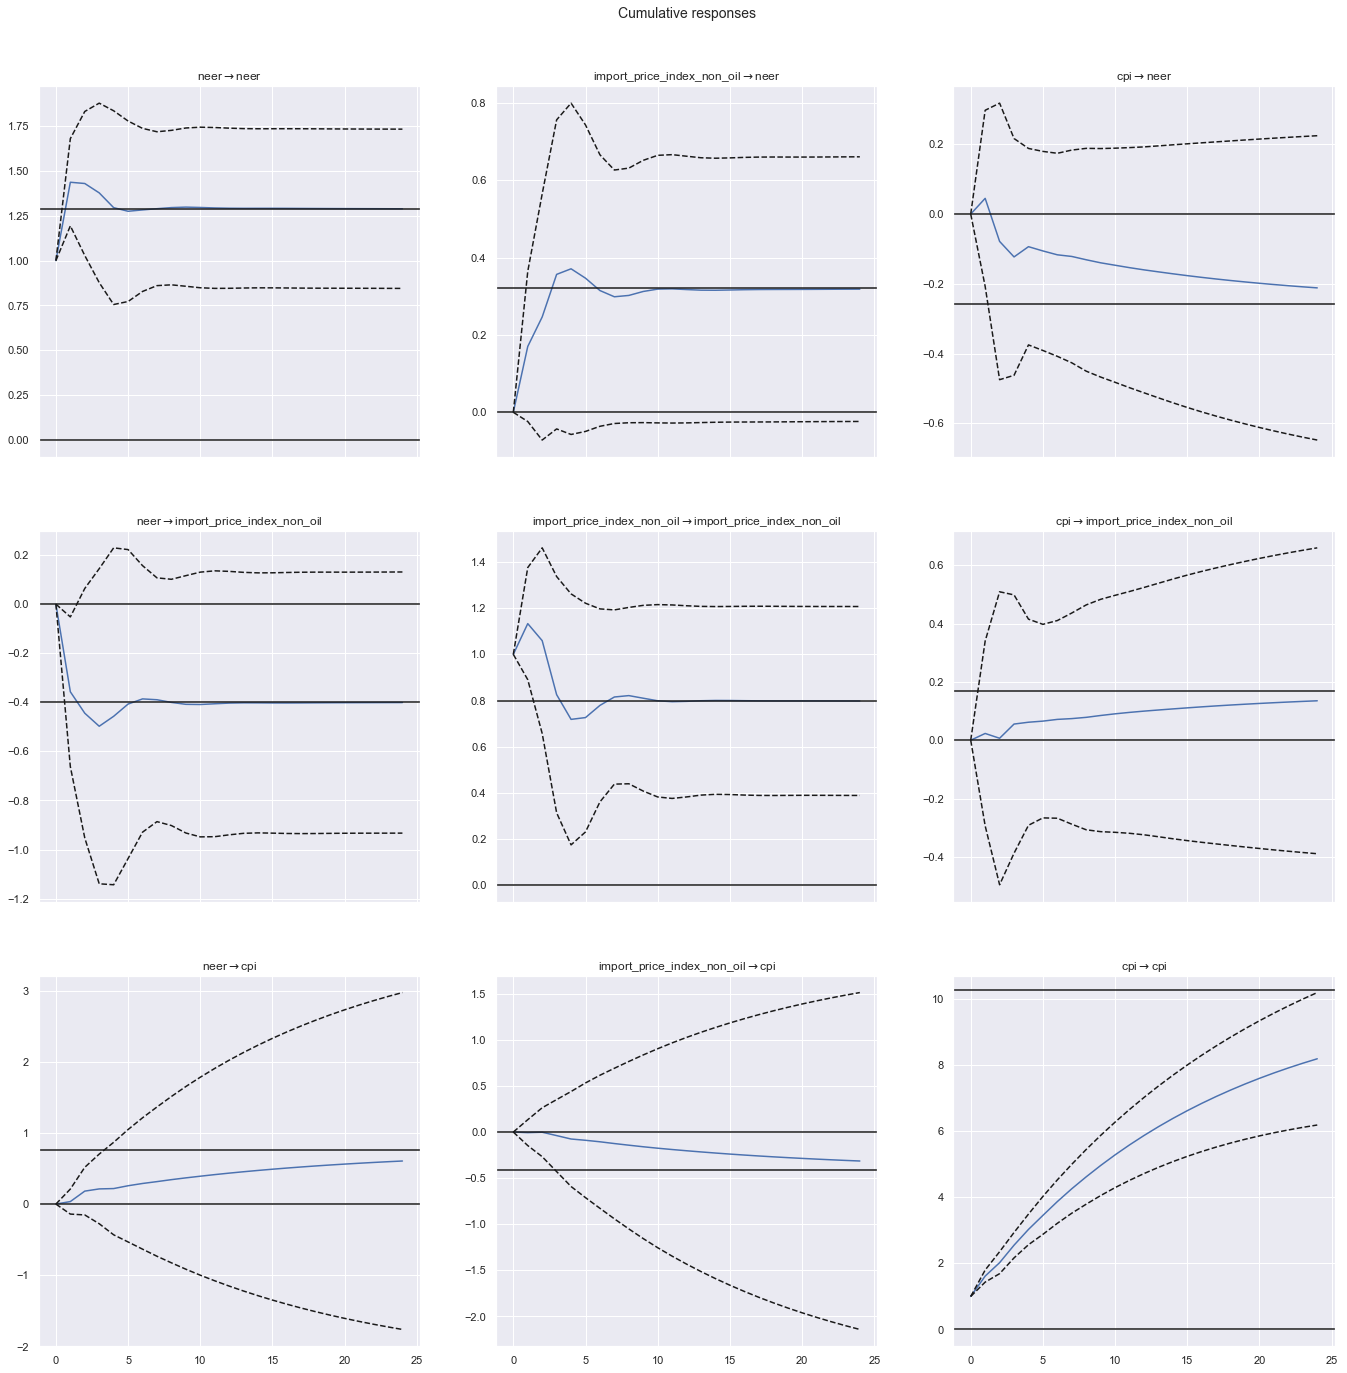

In [50]:
irf_cum_plot = irf.plot_cum_effects(orth=False,figsize=(20,20))

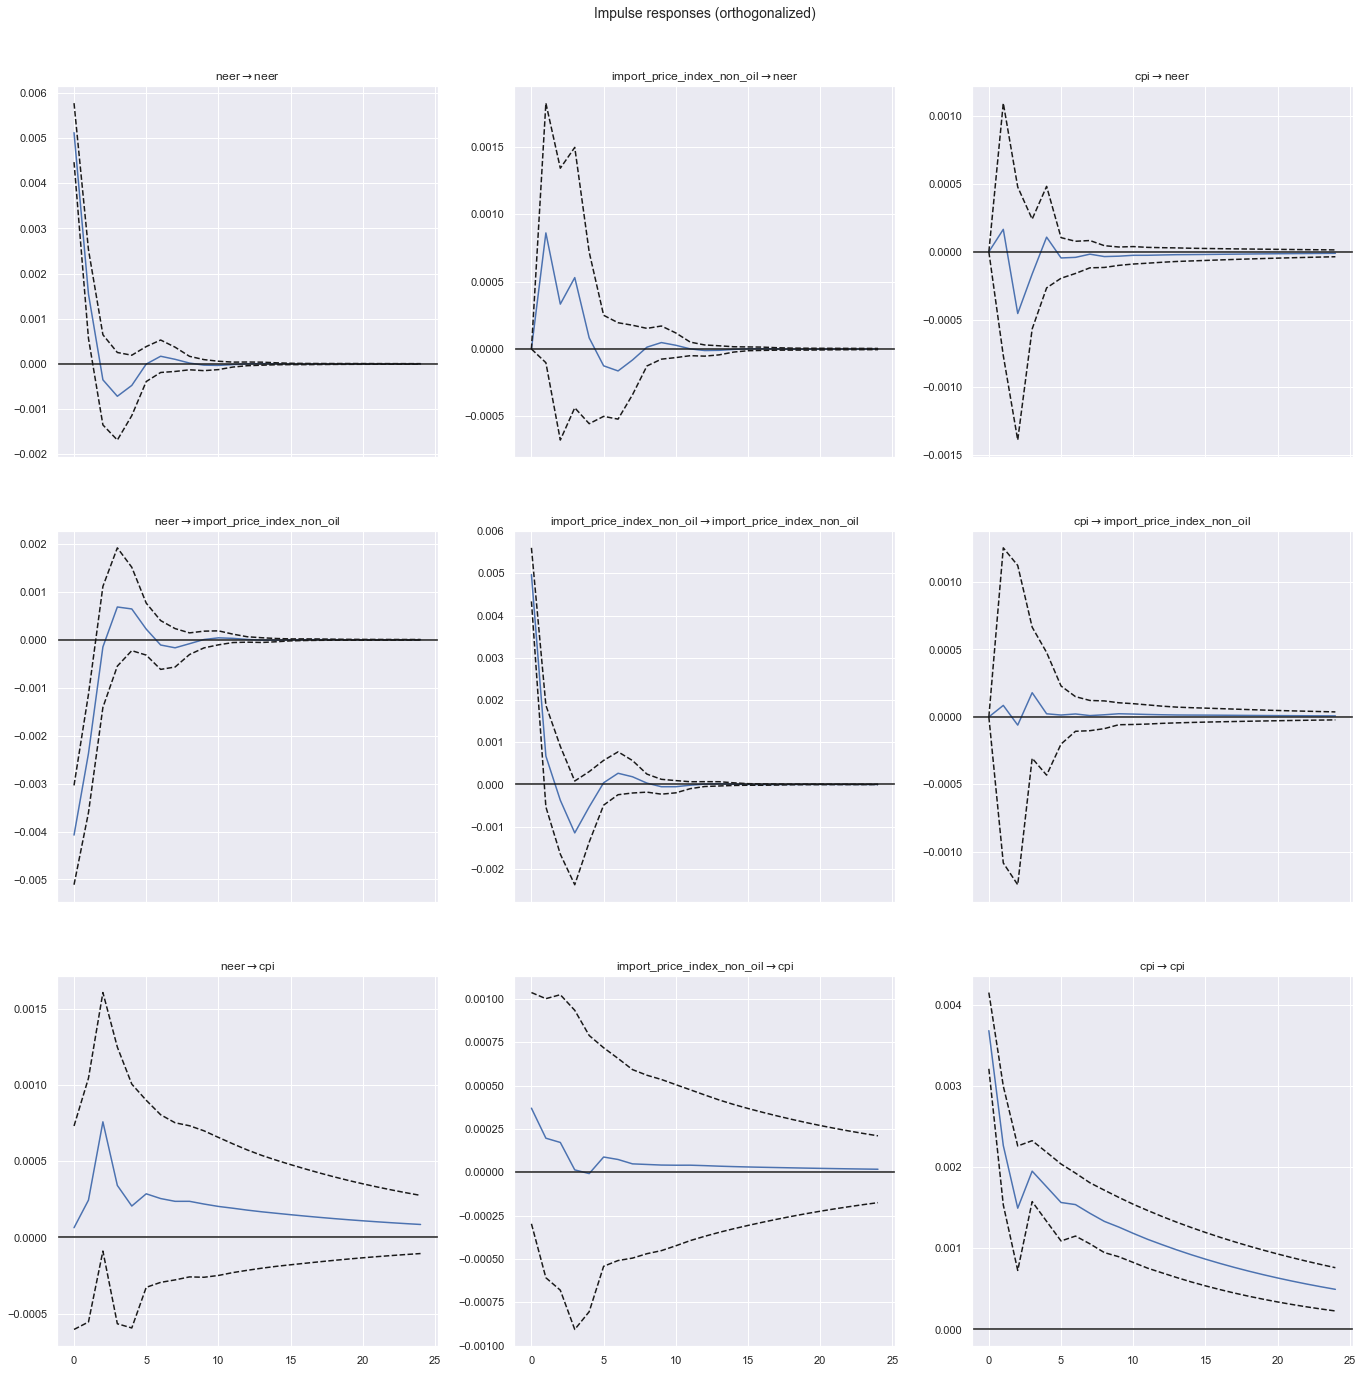

In [51]:
irf_orth_plot = irf.plot(orth=True,figsize=(20,20))

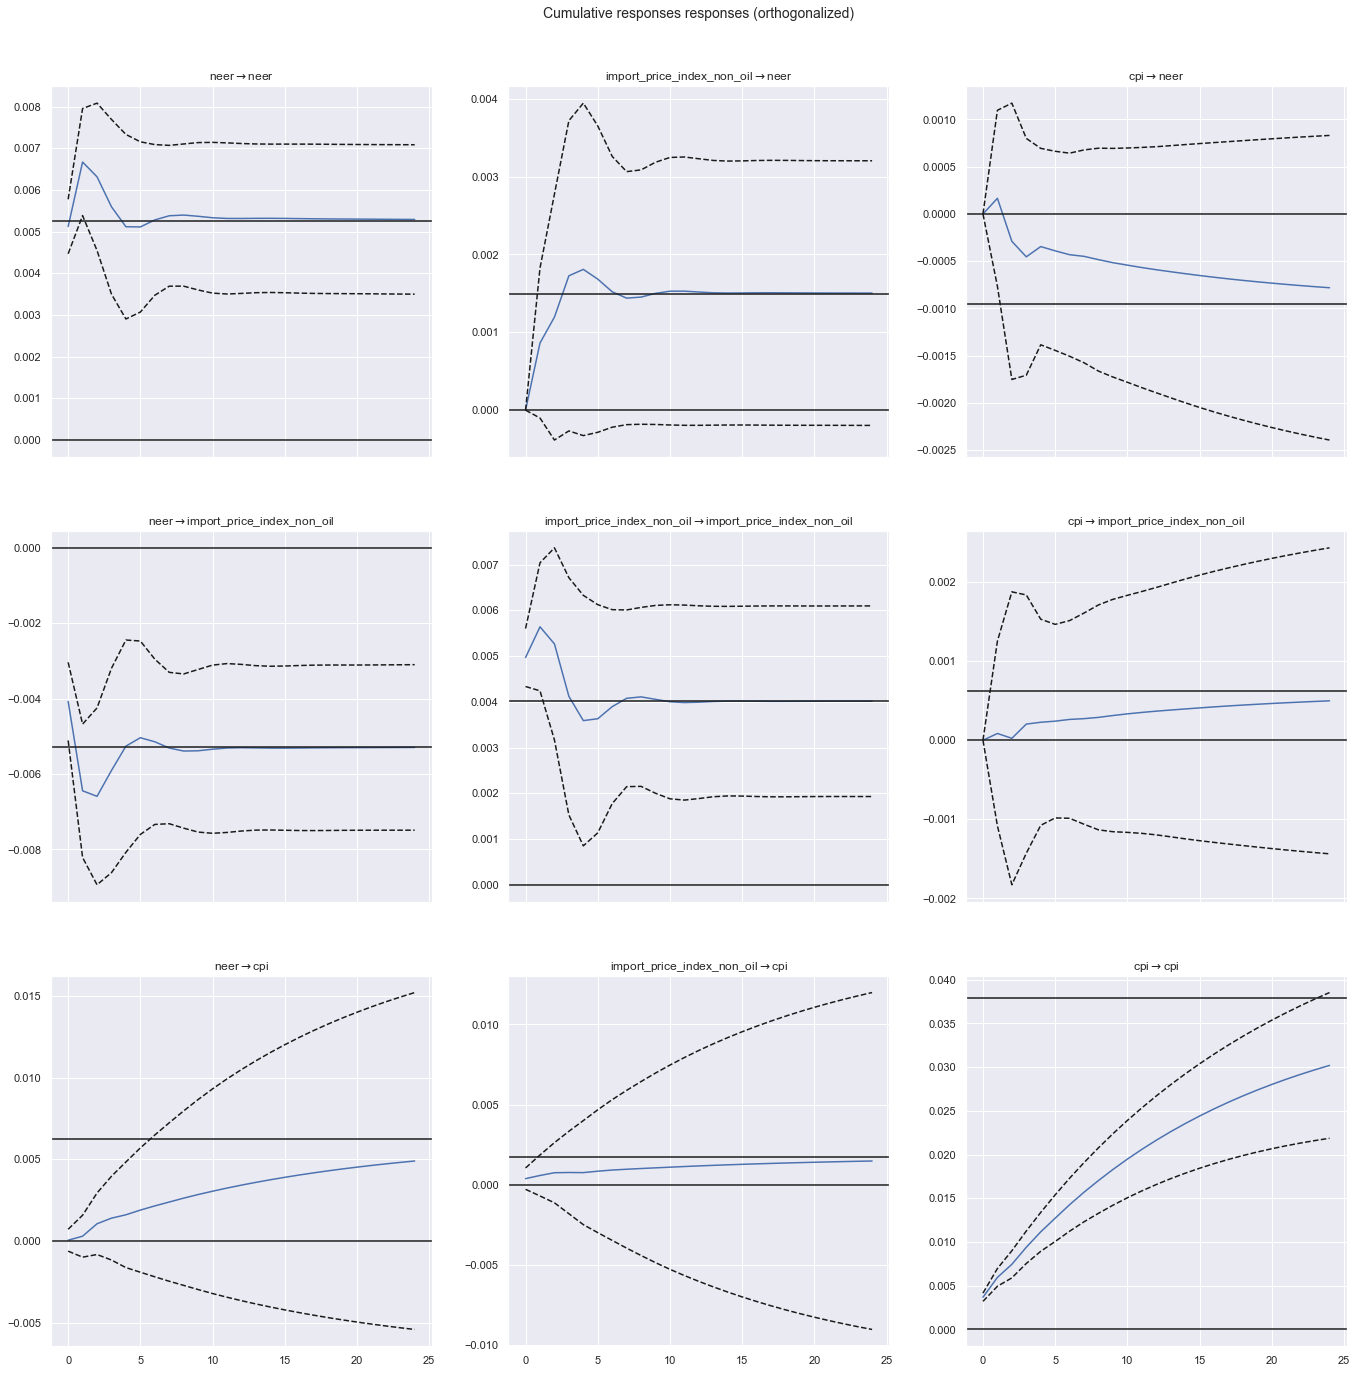

In [52]:
irf_orth_cum_plot = irf.plot_cum_effects(orth=True,figsize=(20,20))

### Forecast Error Decomposition

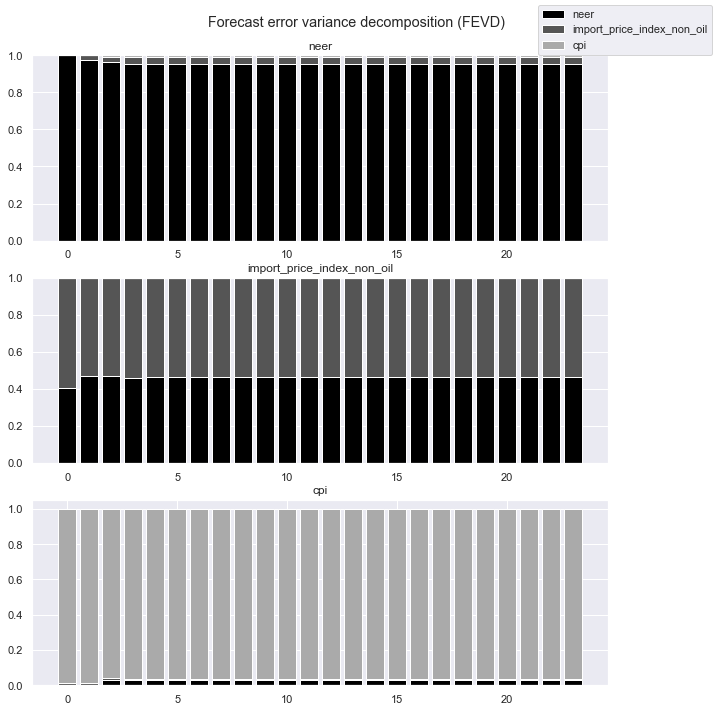

In [53]:
fevd = results.fevd(24).plot()

## Cointegration Test/VECM
Results indicate that r = 3 = k, hence use VAR in levels

In [54]:
cols = ['neer', 'import_price_index_non_oil','cpi']
coint_results = coint_johansen(np.log(data[cols]+1), det_order=0, k_ar_diff=1)
print_coint_results(coint_results)

--------------------------------------------------
--> Trace Statistics
variable statistic Crit-90% Crit-95%  Crit-99%
r = 0 	 42.3564 27.0669 29.7961 35.4628
r = 1 	 21.3543 13.4294 15.4943 19.9349
r = 2 	 6.5533 2.7055 3.8415 6.6349
--------------------------------------------------


In [55]:
data_levels = pd.concat([
                        np.log(data.neer+1),
                        np.log(data.import_price_index_non_oil+1),
                        np.log(data.cpi+1),
                       ], axis = 1)


In [56]:
from statsmodels.tsa.api import VAR
order = 15
model_levels = VAR(data_levels)
model_levels.select_order(order).summary()
#Order: 1, 2, 4

C:\Users\Reverse\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.table.SimpleTable'>

In [57]:
orders = model_levels.select_order(order).selected_orders
orders

{'aic': 2, 'bic': 1, 'hqic': 2, 'fpe': 2}

In [58]:
for o in list(range(1, 10)):
# for o in orders.values():
    if o == 0:
        continue
    print(f'Order: {o}')
    results = model_levels.fit(o)
    print(results.is_stable())
    print(results.test_whiteness())
    print()


Order: 1
True
<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 10 is zero: reject at 5% significance level. Test statistic: 151.290, critical value: 103.010>, p-value: 0.000>

Order: 2
True
<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 10 is zero: reject at 5% significance level. Test statistic: 103.691, critical value: 92.808>, p-value: 0.009>

Order: 3
True
<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 10 is zero: fail to reject at 5% significance level. Test statistic: 67.255, critical value: 82.529>, p-value: 0.334>

Order: 4
True
<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 10 is zero: fail to reject at 5% significance level. Test statistic: 59.926, critical value: 72.153>, p-value: 0.270>

O

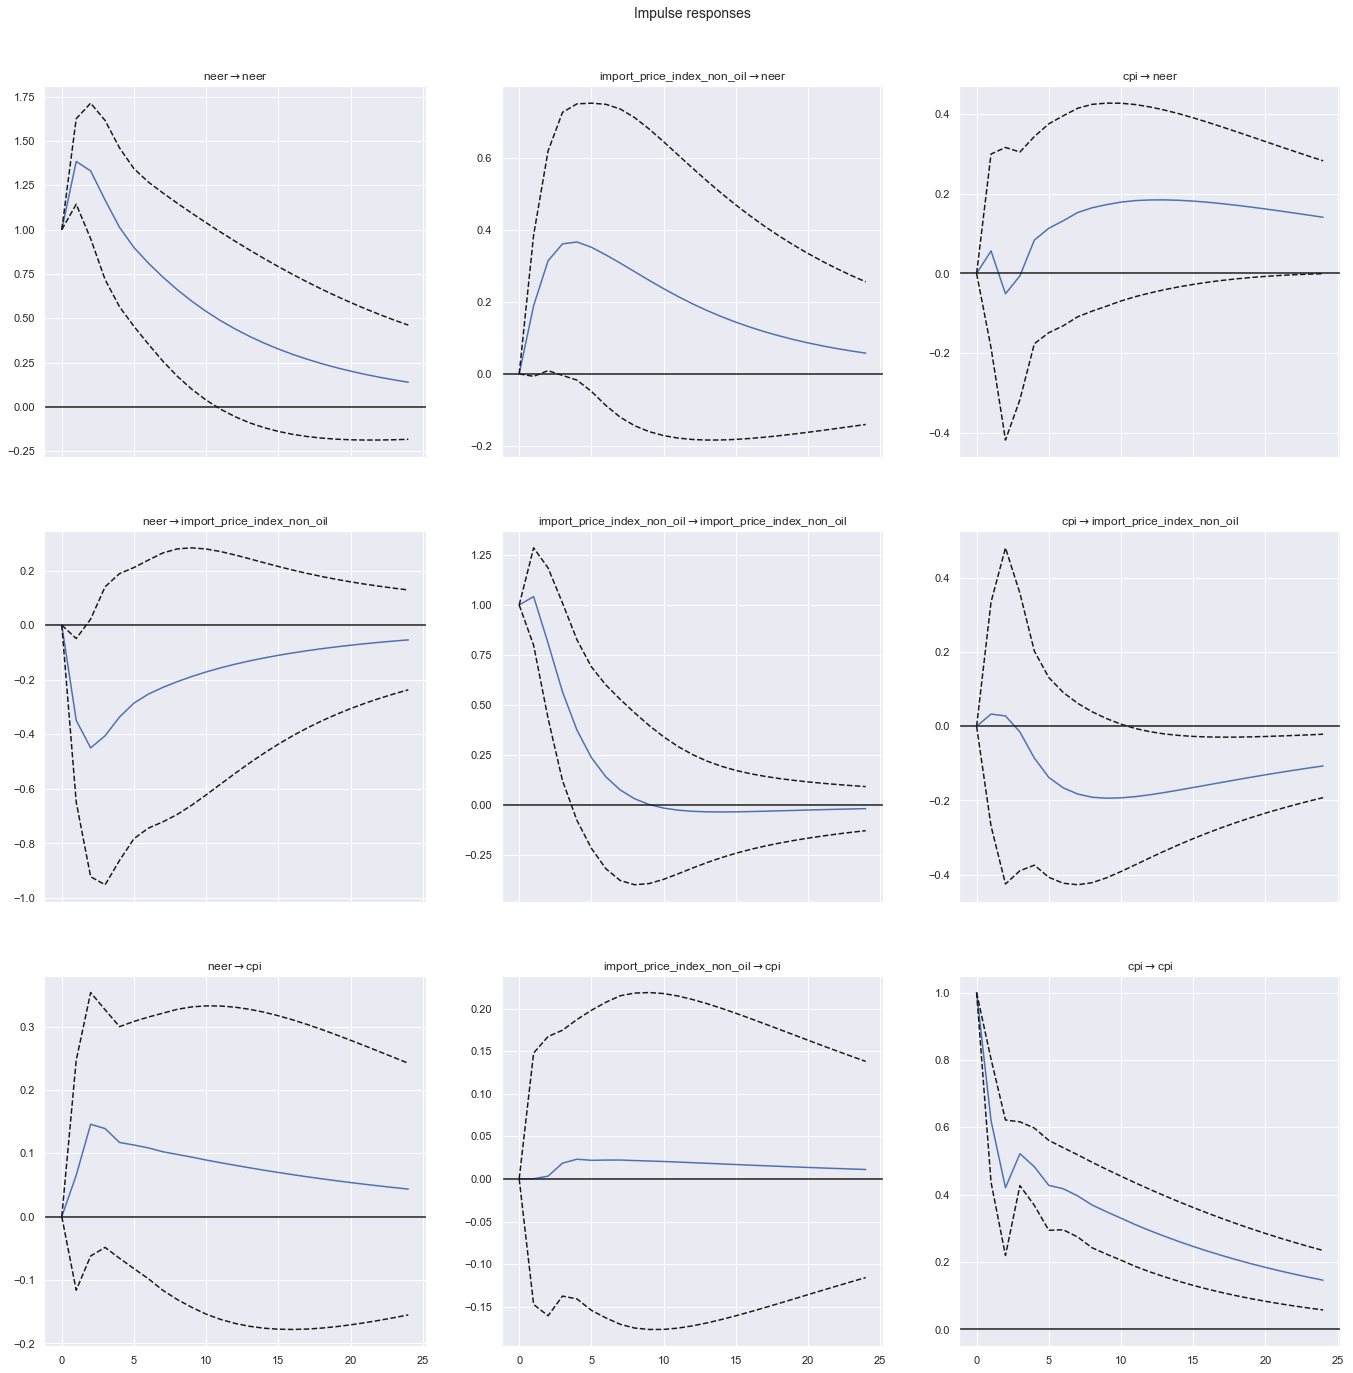

In [59]:
results_levels= model_levels.fit(3)
irf_levels = results_levels.irf(24)
irf_plot_levels = irf_levels.plot(orth=False,figsize=(20,20))

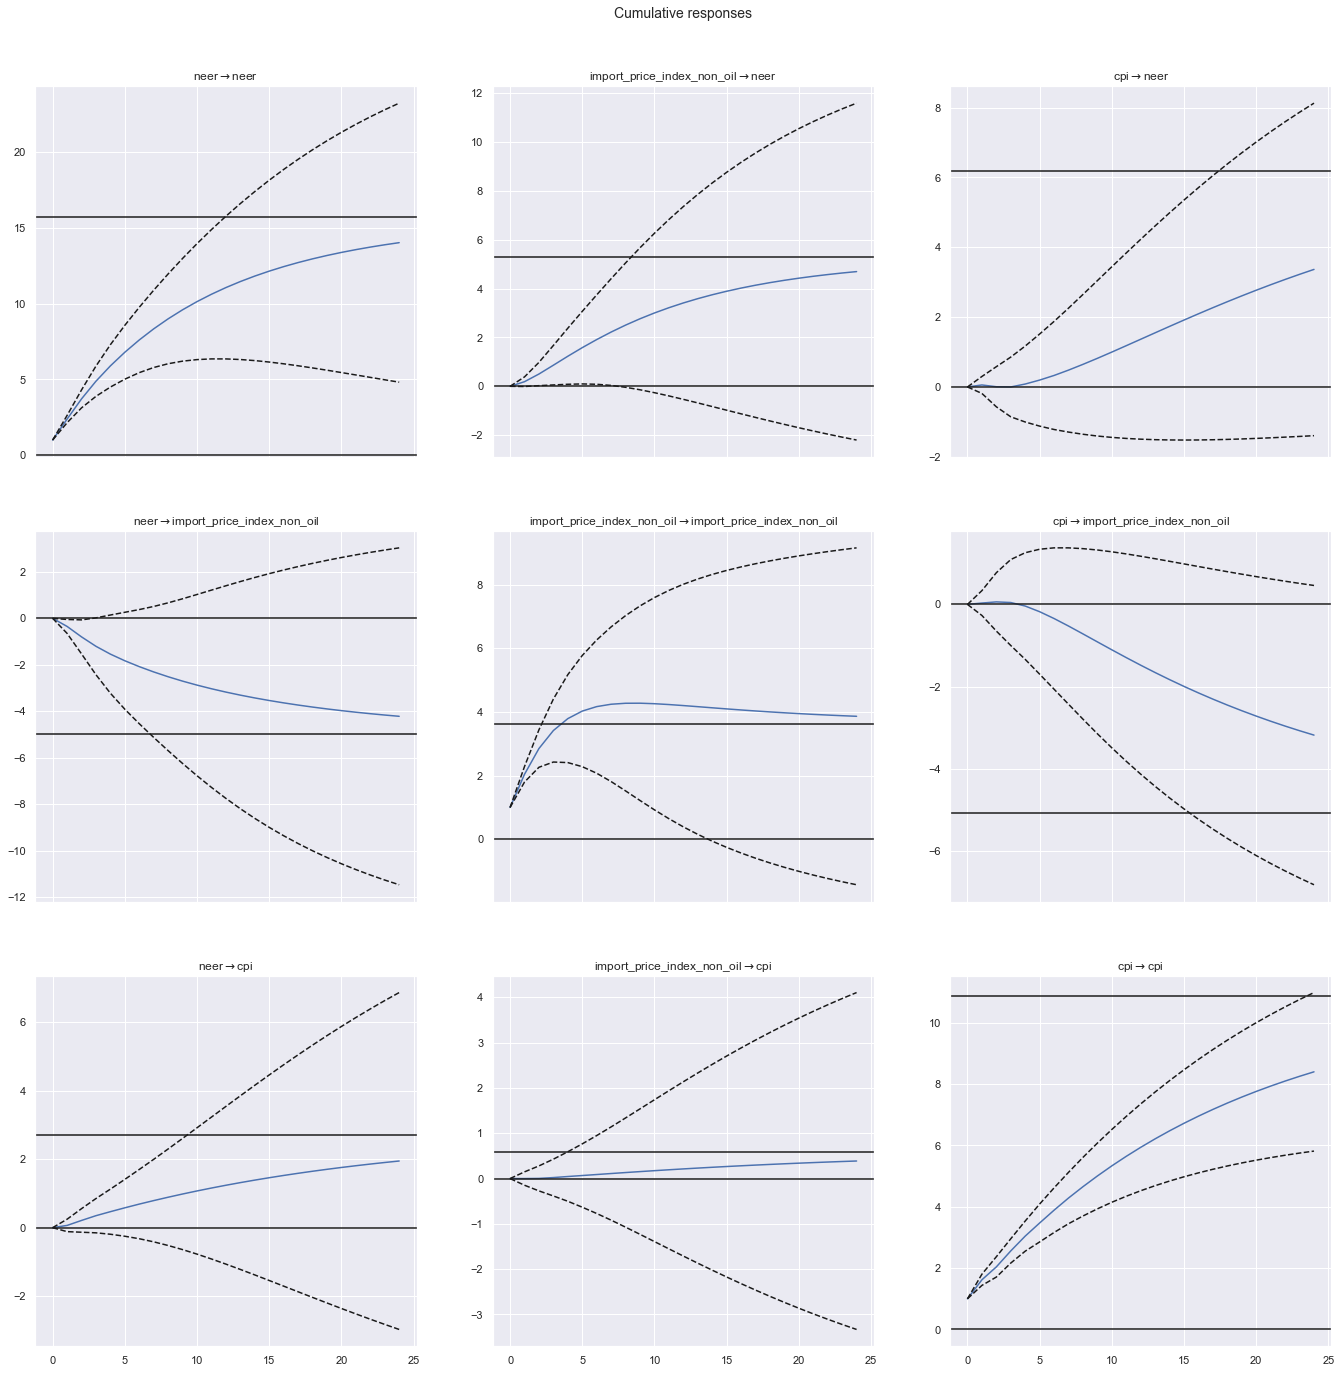

In [60]:
irf_cum_plot_levels = irf_levels.plot_cum_effects(orth=False,figsize=(20,20))

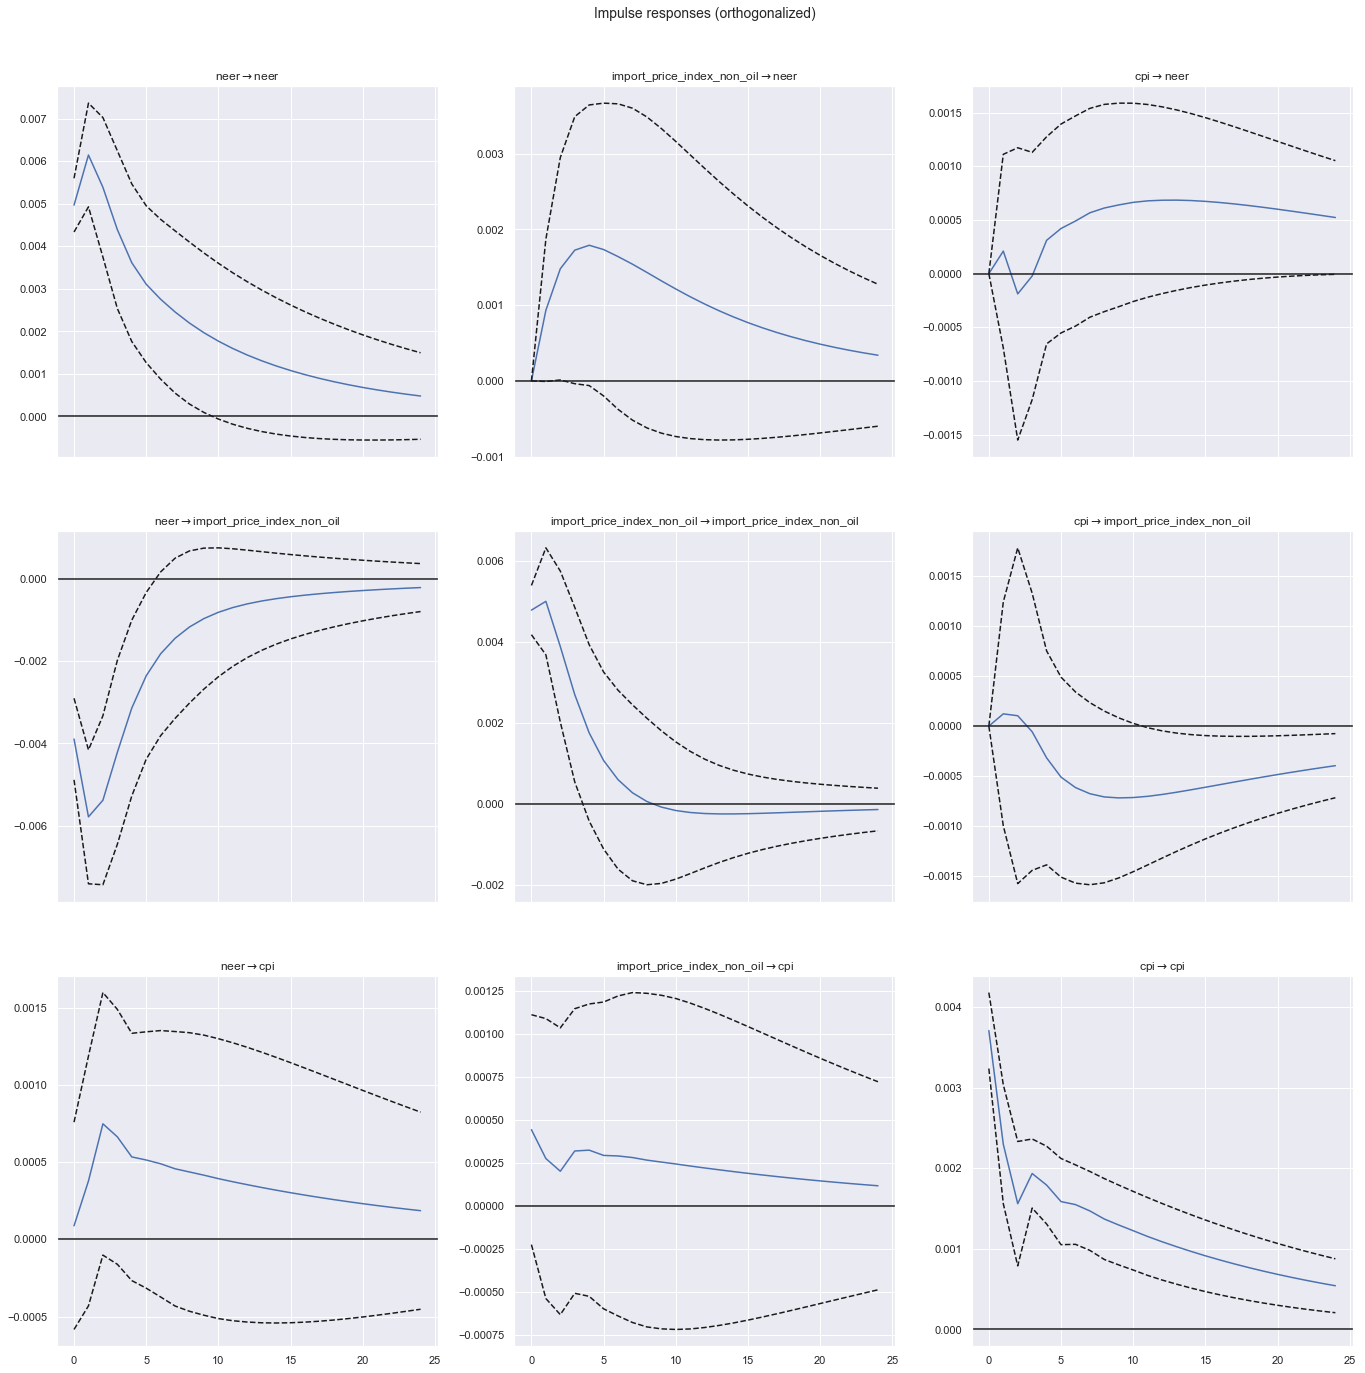

In [61]:
irf_plot_levels = irf_levels.plot(orth=True,figsize=(20,20))

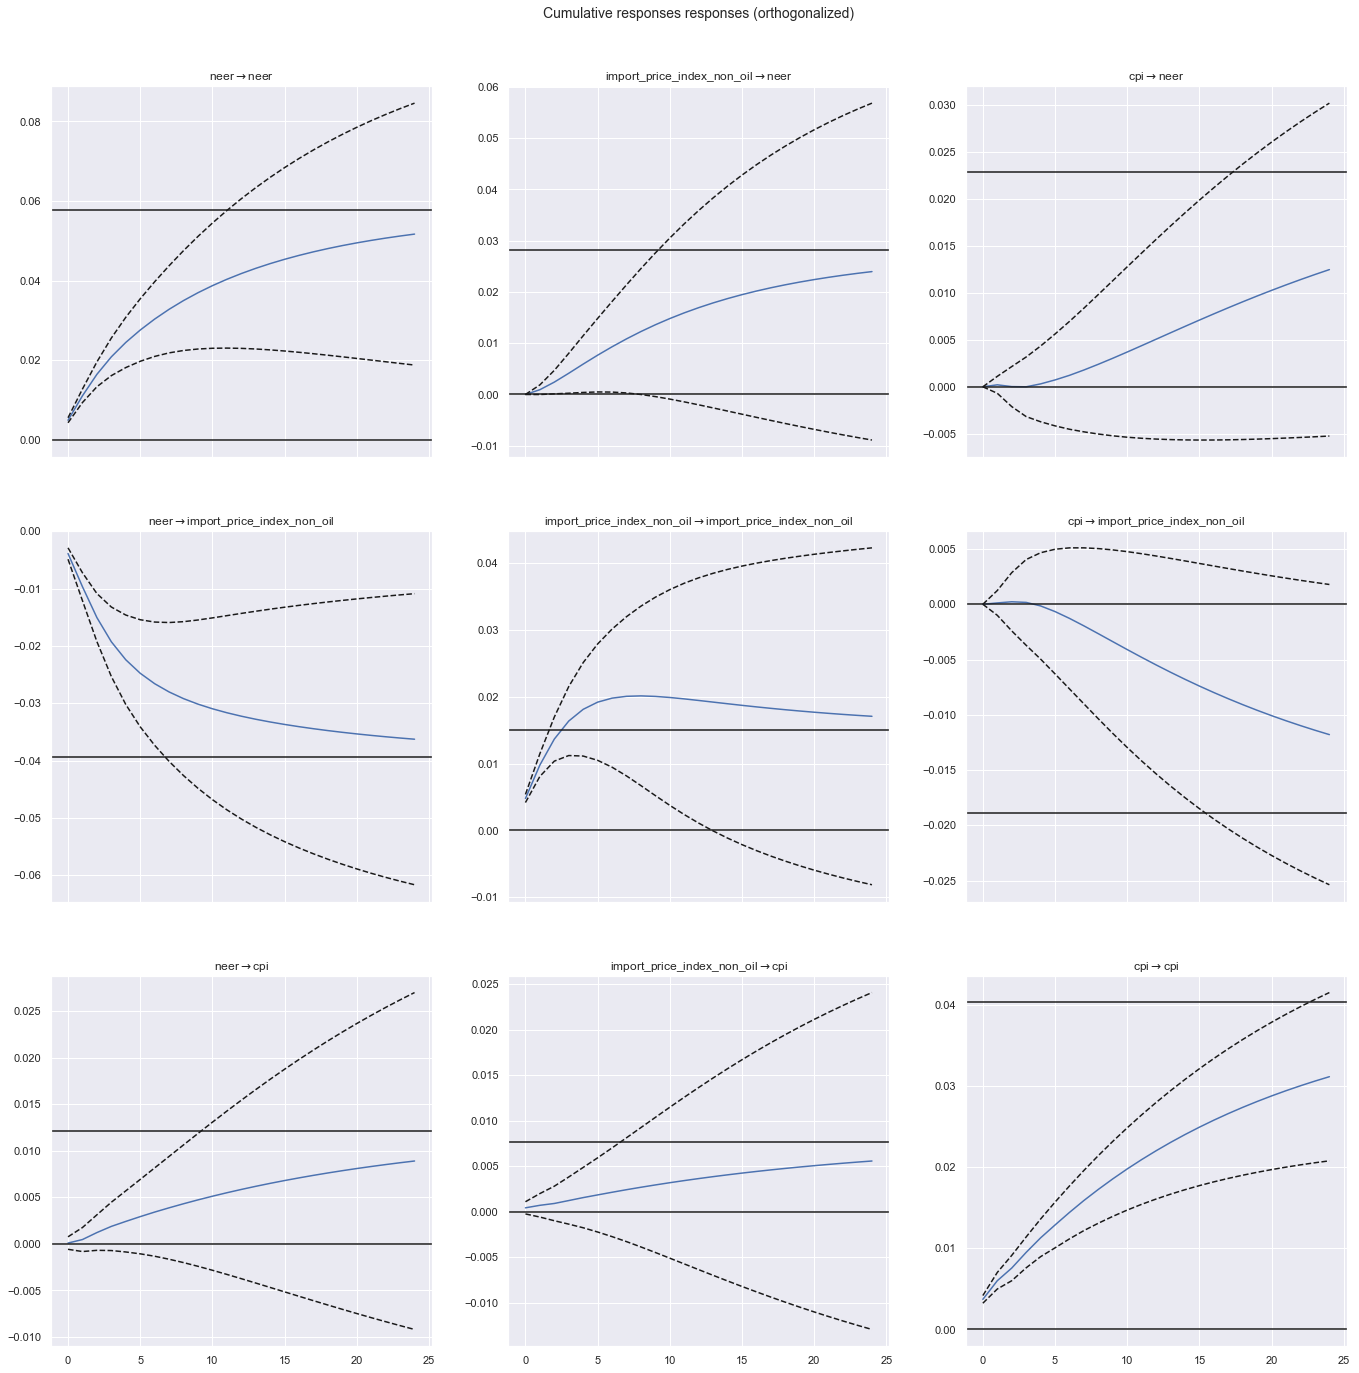

In [62]:
irf_cum_plot_levels = irf_levels.plot_cum_effects(orth=True,figsize=(20,20))

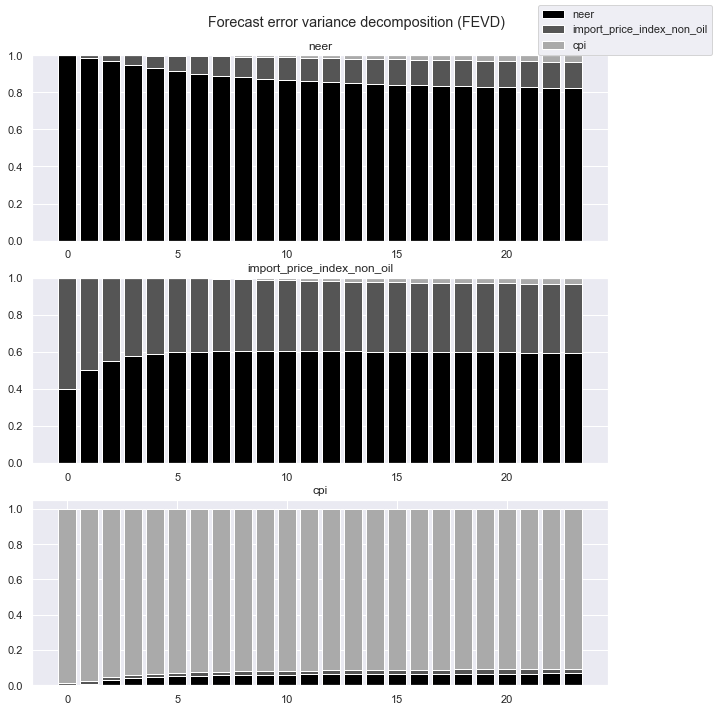

In [63]:
fevd = results_levels.fevd(24).plot()

In [64]:
data.columns

Index(['neer', 'cpi', 'import_price_index', 'import_price_index_non_oil',
       'import_price_index_food', 'cpi_food', 'import_price_index_clothing',
       'cpi_clothing', 'import_price_index_footwear', 'cpi_footwear',
       'import_price_index_telecommunication_equipment',
       'cpi_telecommunication_equipment',
       'import_price_index_beverages_tobacco', 'cpi_alcohol_tobacco'],
      dtype='object')

# Heterogeneity Analysis

Consider the impact of NEER on different import price index and CPI components. Mappings are as follows:

1) `import_price_index_food` -> `cpi_food`

2) `import_price_index_clothing` -> `cpi_clothing`

3) `import_price_index_footwear` -> `cpi_footwear`

4) `import_price_index_telecommunication_equipment` -> `cpi_telecommunication_equipment`

5) `import_price_index_beverages&tobacco` -> `cpi_alcohol_tobacco`


## Time Series Analysis

### IPI (Food)

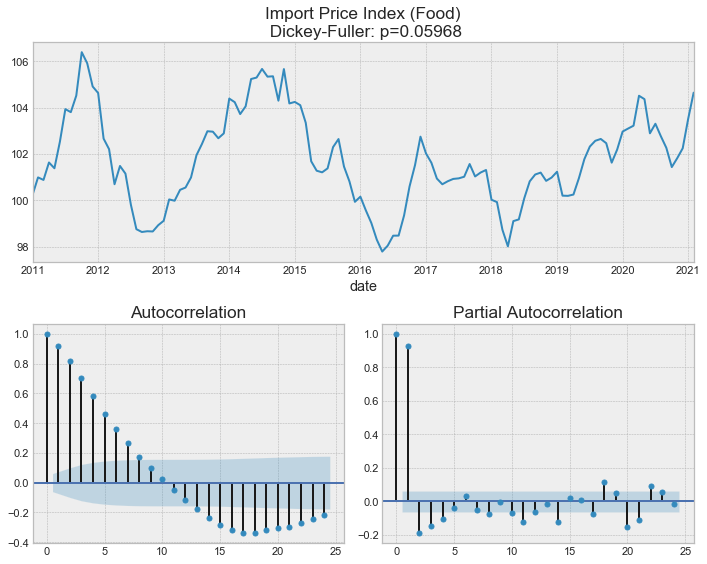

In [65]:
tsplot(data.import_price_index_food, lags = 24, title='Import Price Index (Food)')

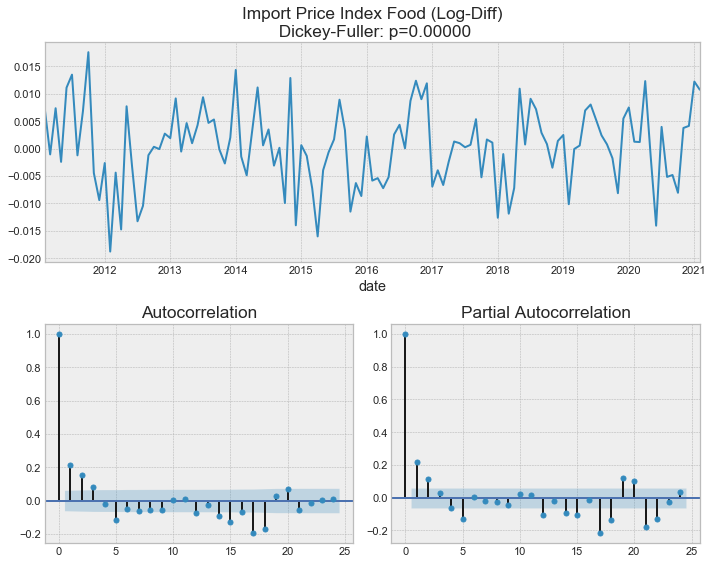

In [66]:
tsplot(np.log(data.import_price_index_food+1).diff().dropna(), lags = 24, title='Import Price Index Food (Log-Diff)')

### CPI (Food)

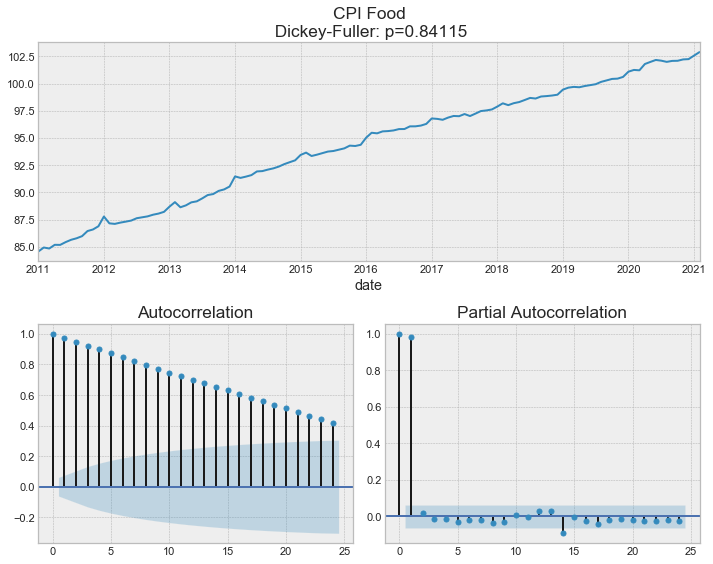

In [67]:
tsplot(data.cpi_food, lags = 24, title='CPI Food')

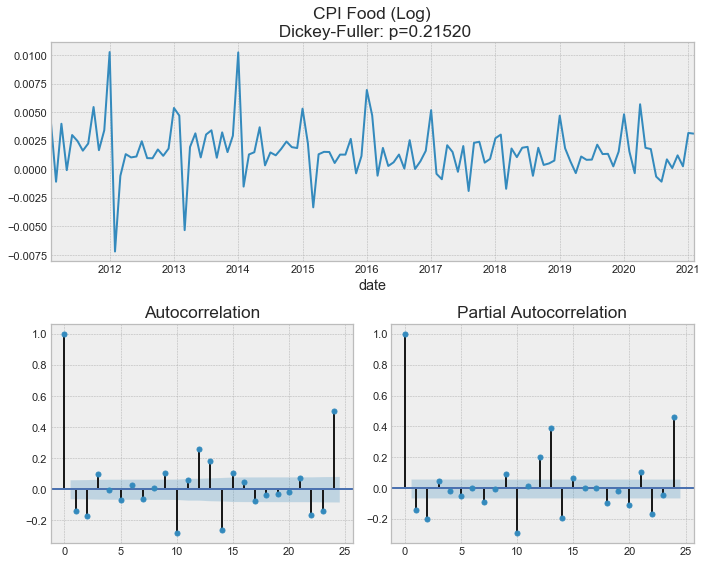

In [68]:
tsplot(np.log(data.cpi_food).diff().dropna(), lags = 24, title='CPI Food (Log)') #cannot stationarize

### IPI Clothing

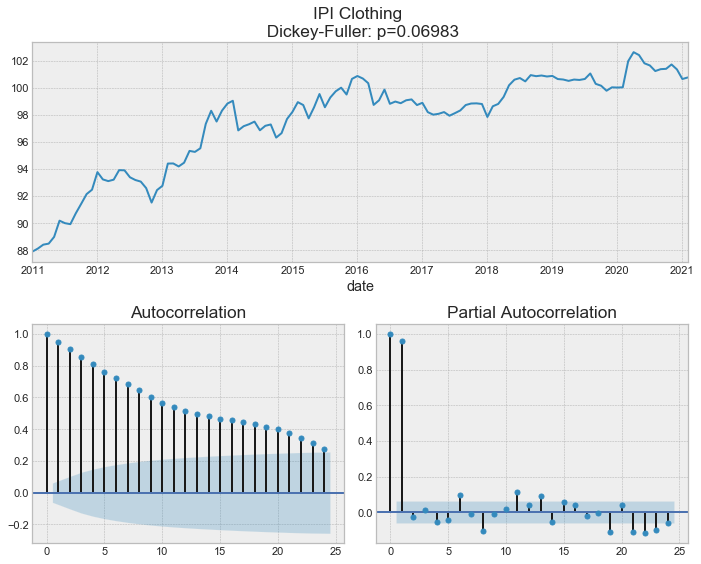

In [69]:
tsplot(data.import_price_index_clothing, lags = 24, title='IPI Clothing ')

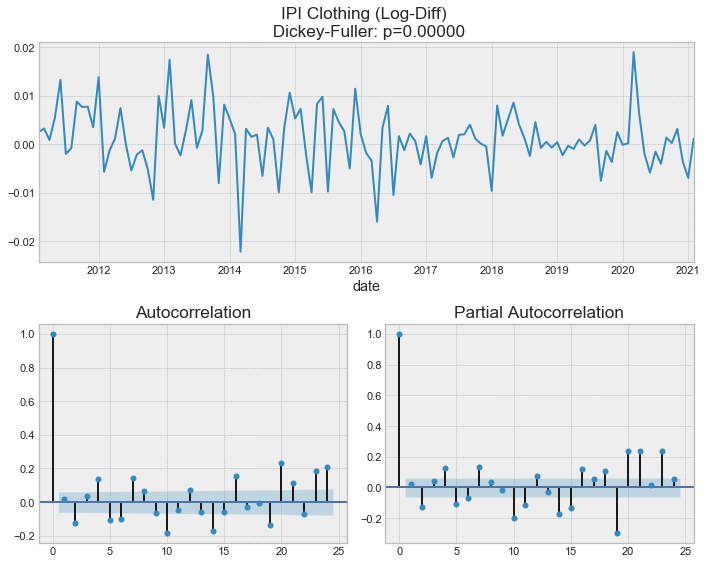

In [70]:
tsplot(np.log(data.import_price_index_clothing+1).diff().dropna(), lags = 24, title='IPI Clothing (Log-Diff) ')

### CPI Clothing

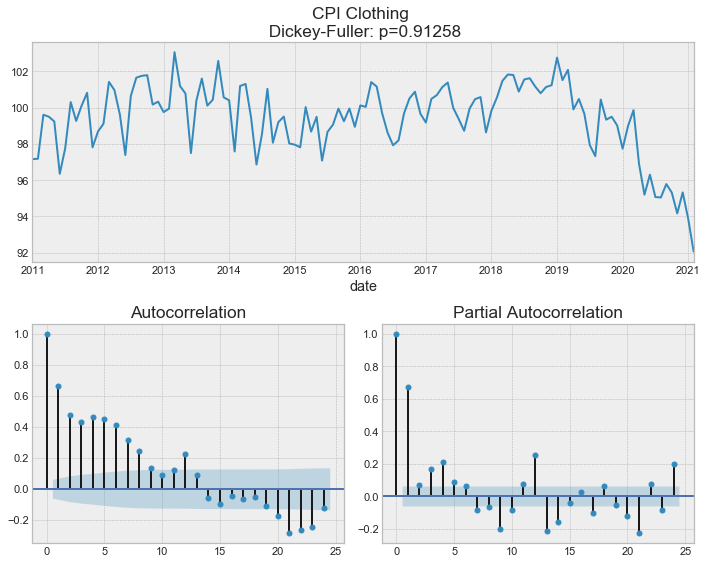

In [71]:
tsplot(data.cpi_clothing, lags = 24, title='CPI Clothing ')

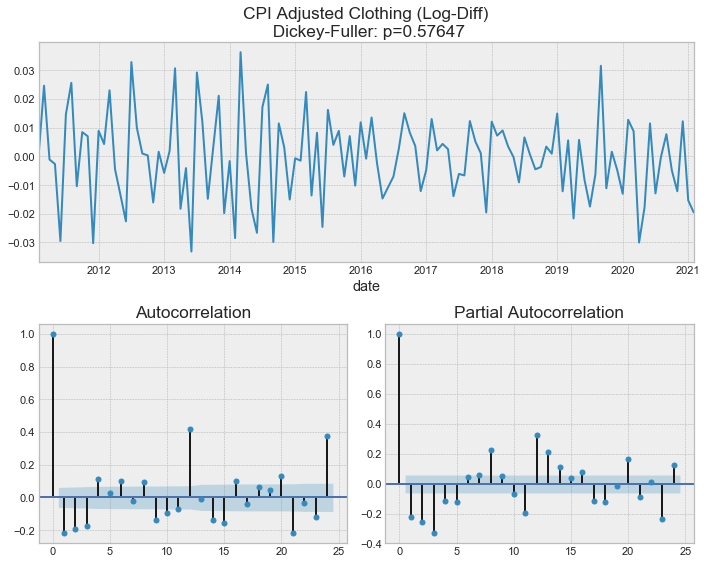

In [72]:
tsplot(np.log(data.cpi_clothing).diff().dropna(), lags = 24, title='CPI Adjusted Clothing (Log-Diff)') #cannot stationarize

### IPI Footwear

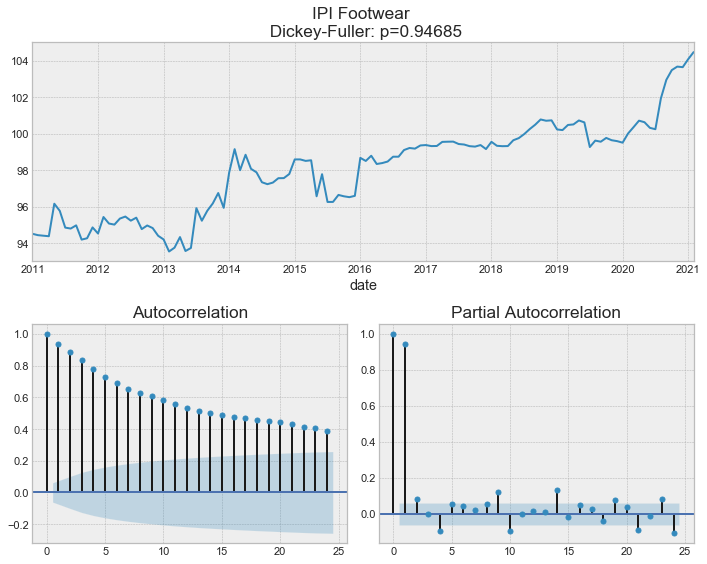

In [73]:
tsplot(data.import_price_index_footwear, lags = 24, title='IPI Footwear ')

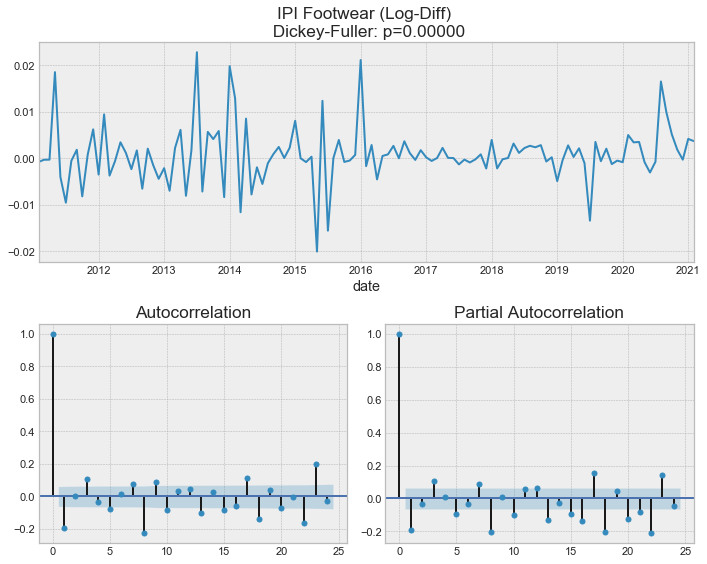

In [74]:
tsplot(np.log(data.import_price_index_footwear+1).diff().dropna(), lags = 24, title='IPI Footwear (Log-Diff) ')

### CPI Footwear

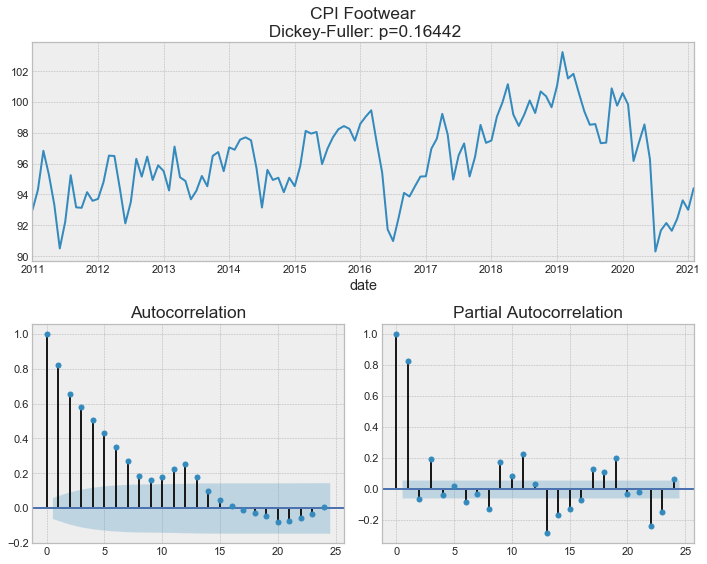

In [75]:
tsplot(data.cpi_footwear, lags = 24, title='CPI Footwear')

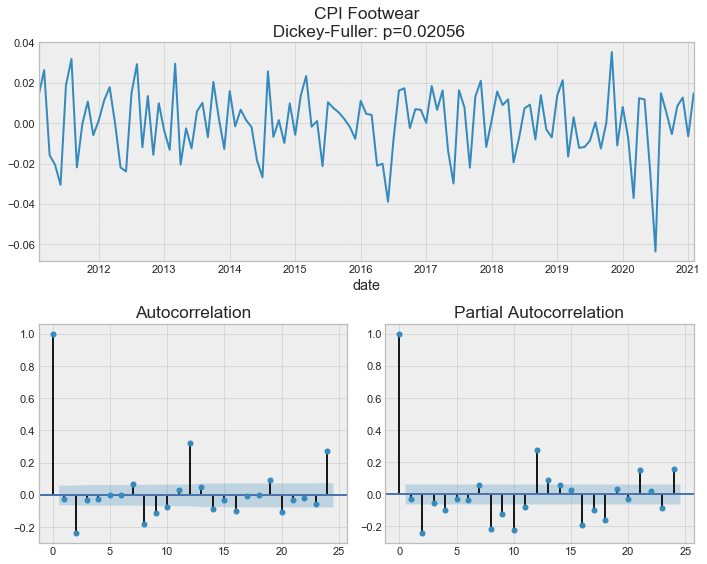

In [76]:
tsplot(np.log(data.cpi_footwear+1).diff().dropna(), lags = 24, title='CPI Footwear')

In [77]:
data.columns

Index(['neer', 'cpi', 'import_price_index', 'import_price_index_non_oil',
       'import_price_index_food', 'cpi_food', 'import_price_index_clothing',
       'cpi_clothing', 'import_price_index_footwear', 'cpi_footwear',
       'import_price_index_telecommunication_equipment',
       'cpi_telecommunication_equipment',
       'import_price_index_beverages_tobacco', 'cpi_alcohol_tobacco'],
      dtype='object')

### Import Price Index Telecommunication Equipment

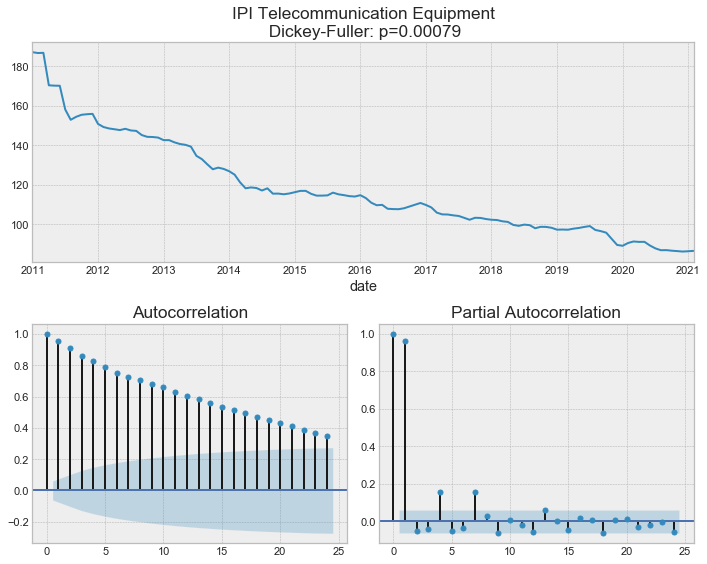

In [78]:
tsplot(data['import_price_index_telecommunication_equipment'], lags = 24, title='IPI Telecommunication Equipment')

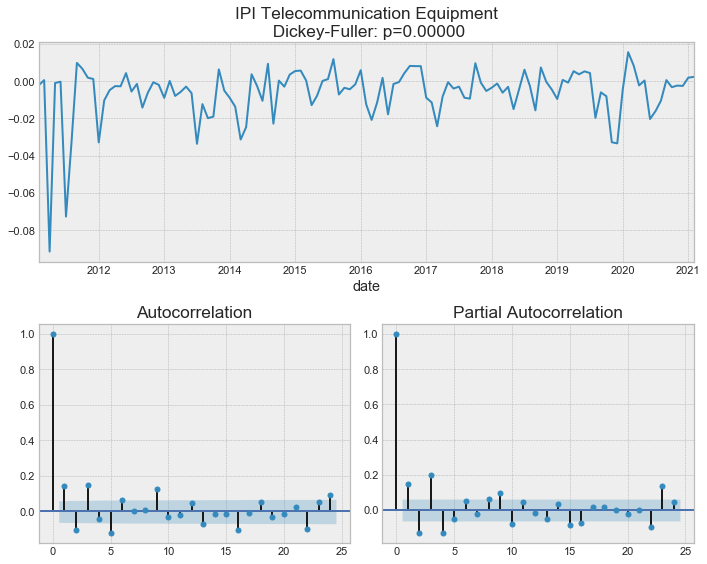

In [79]:
tsplot(np.log(data['import_price_index_telecommunication_equipment']+1).diff().dropna(), lags = 24, title='IPI Telecommunication Equipment')

### CPI Telecommunication Equipment

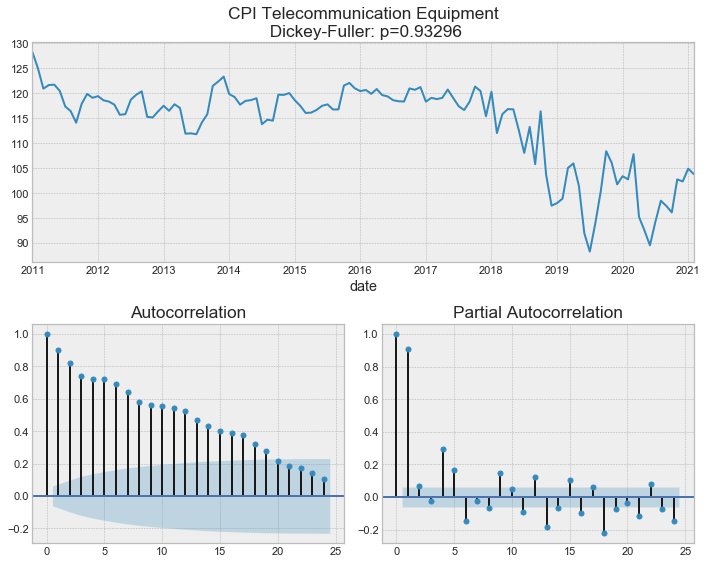

In [80]:
tsplot(data['cpi_telecommunication_equipment'], lags = 24, title='CPI Telecommunication Equipment')

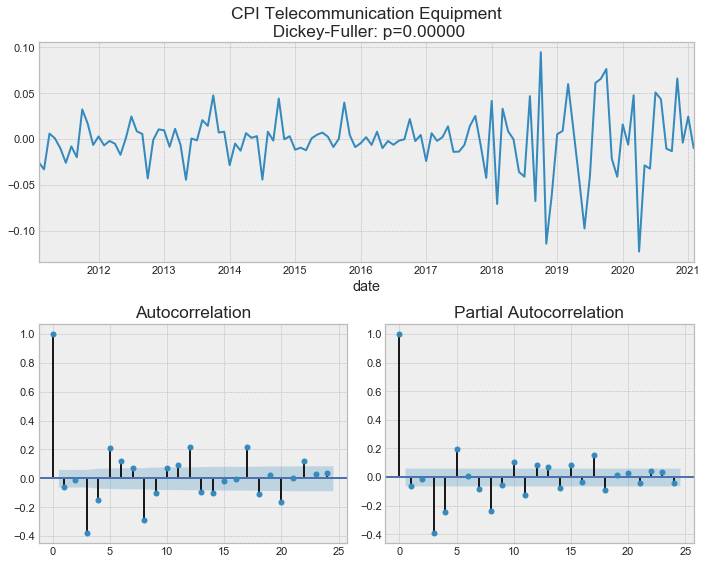

In [81]:
tsplot(np.log(data['cpi_telecommunication_equipment']+1).diff().dropna(), lags = 24, title='CPI Telecommunication Equipment')

### Import Price Index Beverages & Tobacco

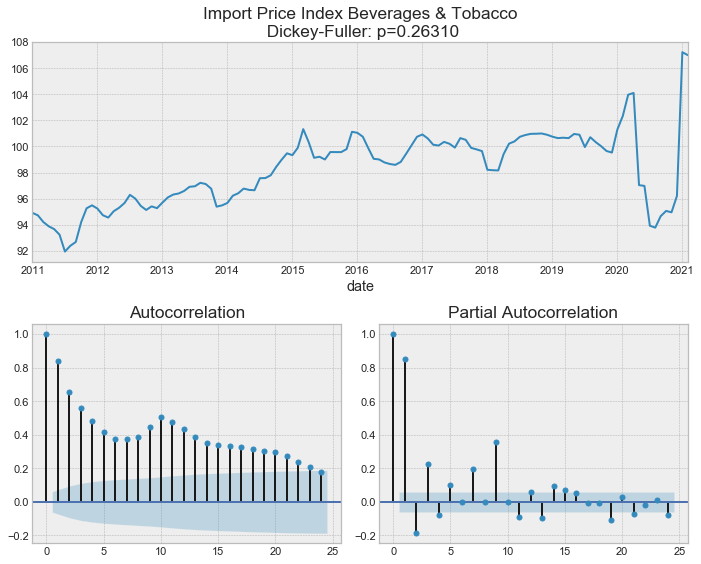

In [82]:
tsplot(data['import_price_index_beverages_tobacco'], lags = 24, title='Import Price Index Beverages & Tobacco')

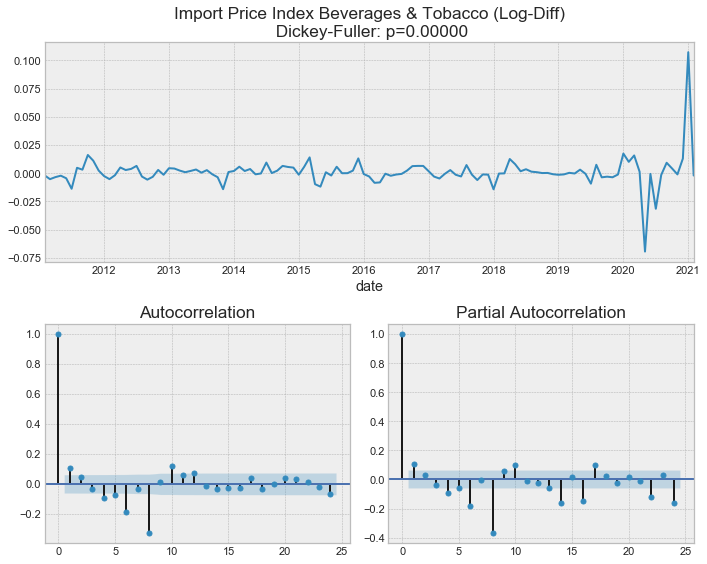

In [83]:
tsplot(np.log(data['import_price_index_beverages_tobacco']+1).diff().dropna(), lags = 24, title='Import Price Index Beverages & Tobacco (Log-Diff)')

### CPI Alcohol Tobacco

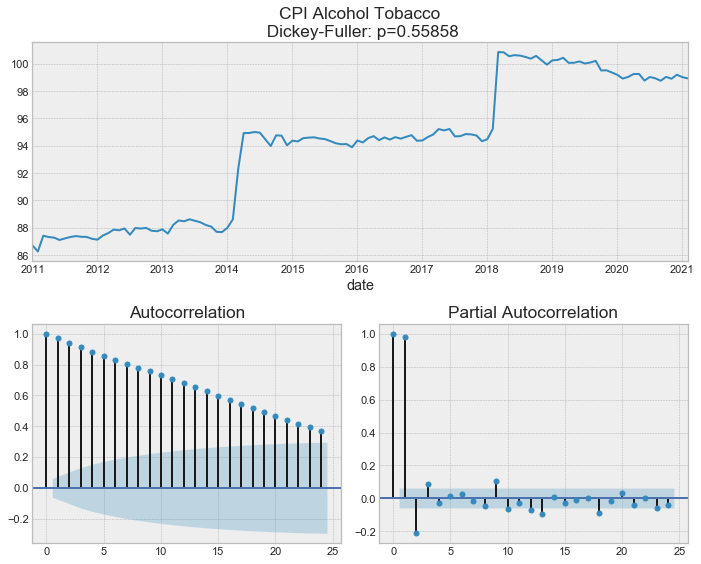

In [84]:
tsplot(data['cpi_alcohol_tobacco'], lags = 24, title='CPI Alcohol Tobacco')

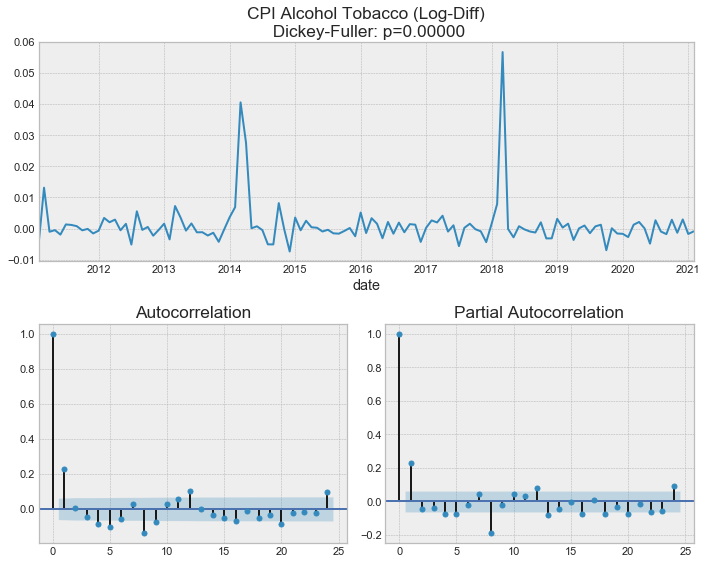

In [85]:
tsplot(np.log(data['cpi_alcohol_tobacco']+1).diff().dropna(), lags = 24, title='CPI Alcohol Tobacco (Log-Diff)')

Transformations: 
- import_price_index_food: log-diff
- cpi_food: cannot stationarize


- import_price_index_clothing: log-diff
- cpi_clothing: cannot stationarize


- import_price_index_footwear: log-diff
- cpi_footwear: log-diff


- import_price_index_telecommunication_equipment: log-diff
- cpi_telecommunication_equipment: log-diff


- import_price_index_beverages_tobacco: log-diff
- cpi_alcohol_tobacco: log-diff

## VAR Model

In [86]:
data_trans = pd.concat([
    np.log(data.neer+1).diff().dropna(),
    np.log(data.import_price_index_footwear+1).diff().dropna(),
    np.log(data.cpi_footwear+1).diff().dropna(),
    np.log(data.import_price_index_telecommunication_equipment+1).diff().dropna(),
    np.log(data.cpi_telecommunication_equipment+1).diff().dropna(),
    np.log(data.import_price_index_beverages_tobacco+1).diff().dropna(),
    np.log(data.cpi_alcohol_tobacco+1).diff().dropna(),

], axis = 1)
# data_trans = data_trans.iloc[1:] #if not all cols use diff
 

In [87]:
data_trans

neer  import_price_index_footwear  cpi_footwear  \
date                                                              
2011-02-01  0.001442                    -0.000786      0.013863   
2011-03-01  0.000000                    -0.000314      0.026243   
2011-04-01  0.005842                    -0.000294     -0.015835   
2011-05-01  0.004858                     0.018520     -0.020607   
2011-06-01  0.000665                    -0.004032     -0.030536   
...              ...                          ...           ...   
2020-10-01 -0.003389                     0.005133     -0.005426   
2020-11-01 -0.002594                     0.001845      0.008459   
2020-12-01 -0.000179                    -0.000296      0.012657   
2021-01-01 -0.000090                     0.004167     -0.006553   
2021-02-01  0.000985                     0.003704      0.014794   

            import_price_index_telecommunication_equipment  \
date                                                         
2011-02-01                                       -0.002274   
2011-03-01                                        0.000533   
2011-04-01                                       -0.091431   
2011-05-01                                       -0.001022   
2011-06-01                                       -0.000327   
...                                                    ...   
2020-10-01                                       -0.003266   
2020-11-01                                       -0.002396   
2020-12-01                                       -0.002608   
2021-01-01                                        0.001820   
2021-02-01                                        0.002273   

            cpi_telecommunication_equipment  \
date                                          
2011-02-01                        -0.025123   
2011-03-01                        -0.033092   
2011-04-01                         0.005945   
2011-05-01                         0.000636   
2011-06-01                        -0.010263   
...                                     ...   
2020-10-01                        -0.013347   
2020-11-01                         0.065976   
2020-12-01                        -0.004056   
2021-01-01                         0.024454   
2021-02-01                        -0.010004   

            import_price_index_beverages_tobacco  cpi_alcohol_tobacco  
date                                                                   
2011-02-01                             -0.001931            -0.005109  
2011-03-01                             -0.005310             0.013114  
2011-04-01                             -0.003503            -0.001030  
2011-05-01                             -0.002237            -0.000521  
2011-06-01                             -0.004520            -0.001950  
...                                          ...                  ...  
2020-10-01                              0.004193             0.002823  
2020-11-01                             -0.001094            -0.001350  
2020-12-01                              0.012942             0.002919  
2021-01-01                              0.107228            -0.001748  
2021-02-01                             -0.002081            -0.000910  

[121 rows x 7 columns]

In [88]:
from statsmodels.tsa.api import VAR
order = 10
model = VAR(data_trans)
model.select_order(order).summary()

C:\Users\Reverse\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.table.SimpleTable'>

In [89]:
orders = model.select_order(order).selected_orders
for o in list(range(1, 10)):
# for o in orders.values():
    if o == 0:
        continue
    print(f'Order: {o}')
    results = model.fit(o)
    print(results.is_stable())
    print(results.test_whiteness())
    print()


Order: 1
True
<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 10 is zero: fail to reject at 5% significance level. Test statistic: 472.818, critical value: 490.960>, p-value: 0.143>

Order: 2
True
<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 10 is zero: fail to reject at 5% significance level. Test statistic: 401.535, critical value: 439.165>, p-value: 0.359>

Order: 3
True
<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 10 is zero: fail to reject at 5% significance level. Test statistic: 345.986, critical value: 387.188>, p-value: 0.445>

Order: 4
True
<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 10 is zero: fail to reject at 5% significance level. Test statistic: 321.213, critical value: 334.990

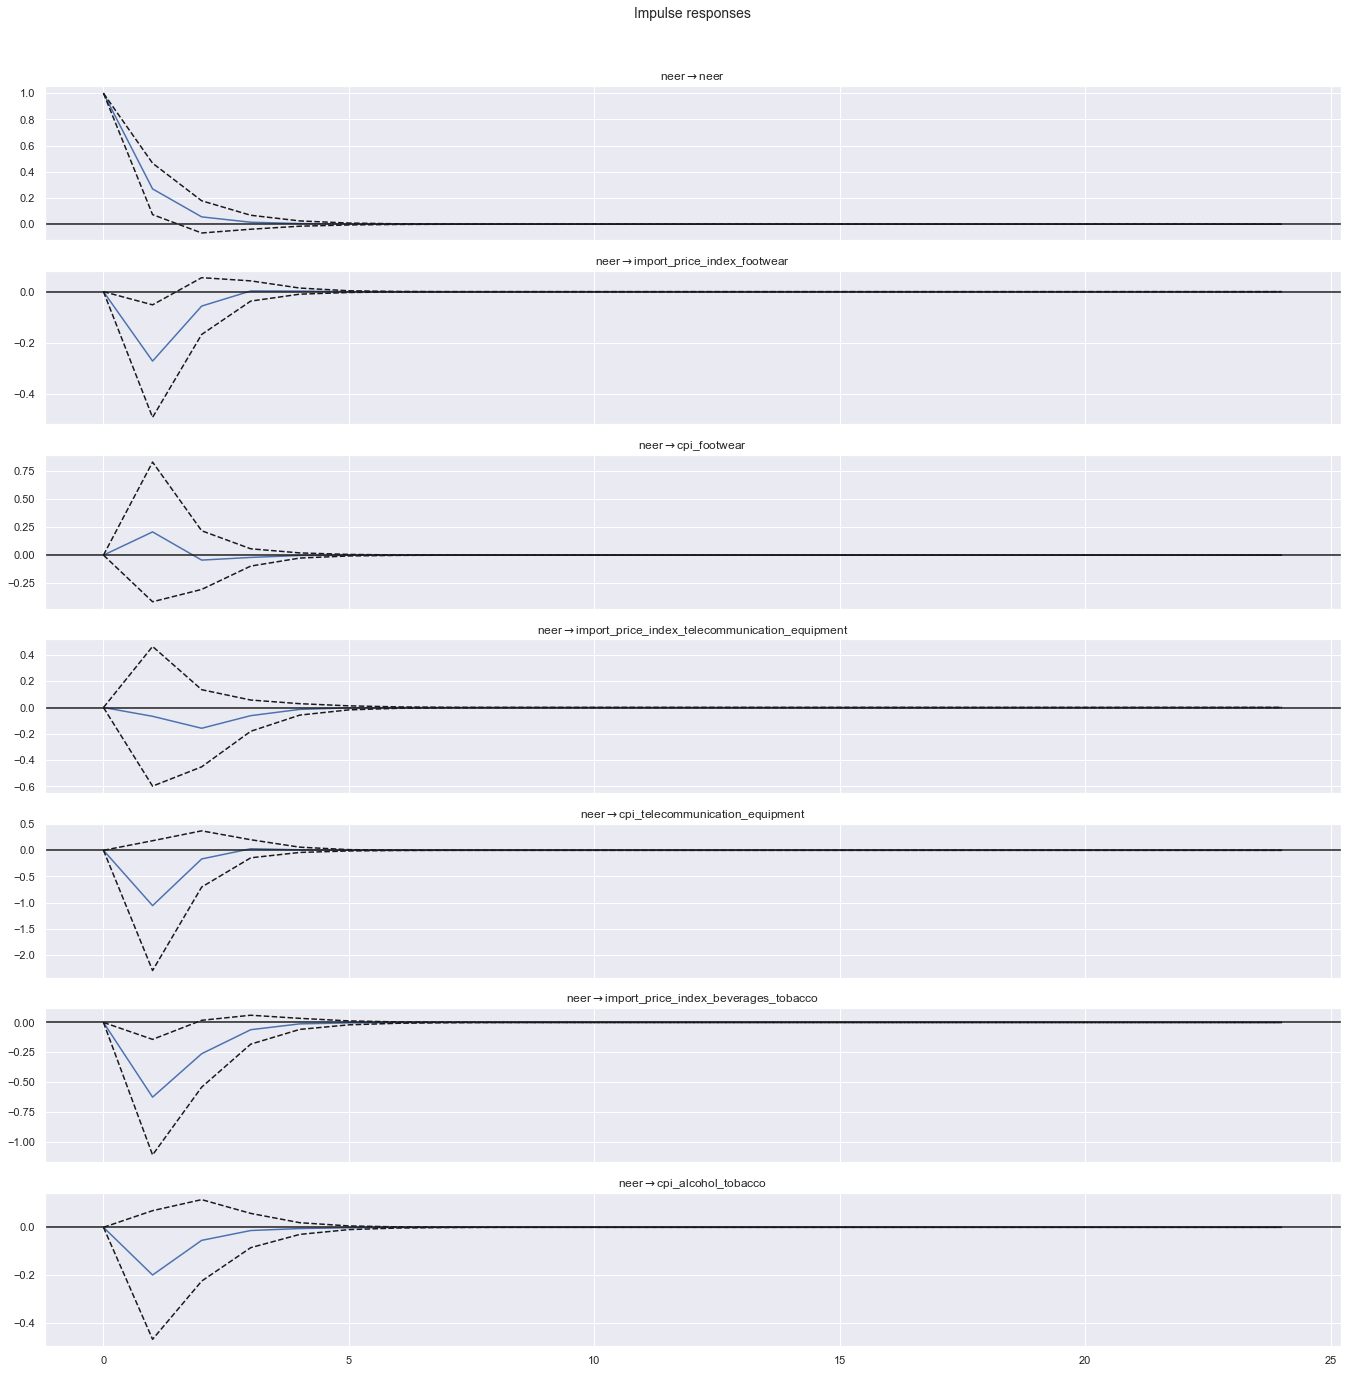

In [90]:
results = model.fit(1) #use 1 because 2nd best in BIC and residual whitenoise
irf = results.irf(24)
irf_plot = irf.plot(orth=False,figsize=(20,20), impulse='neer')

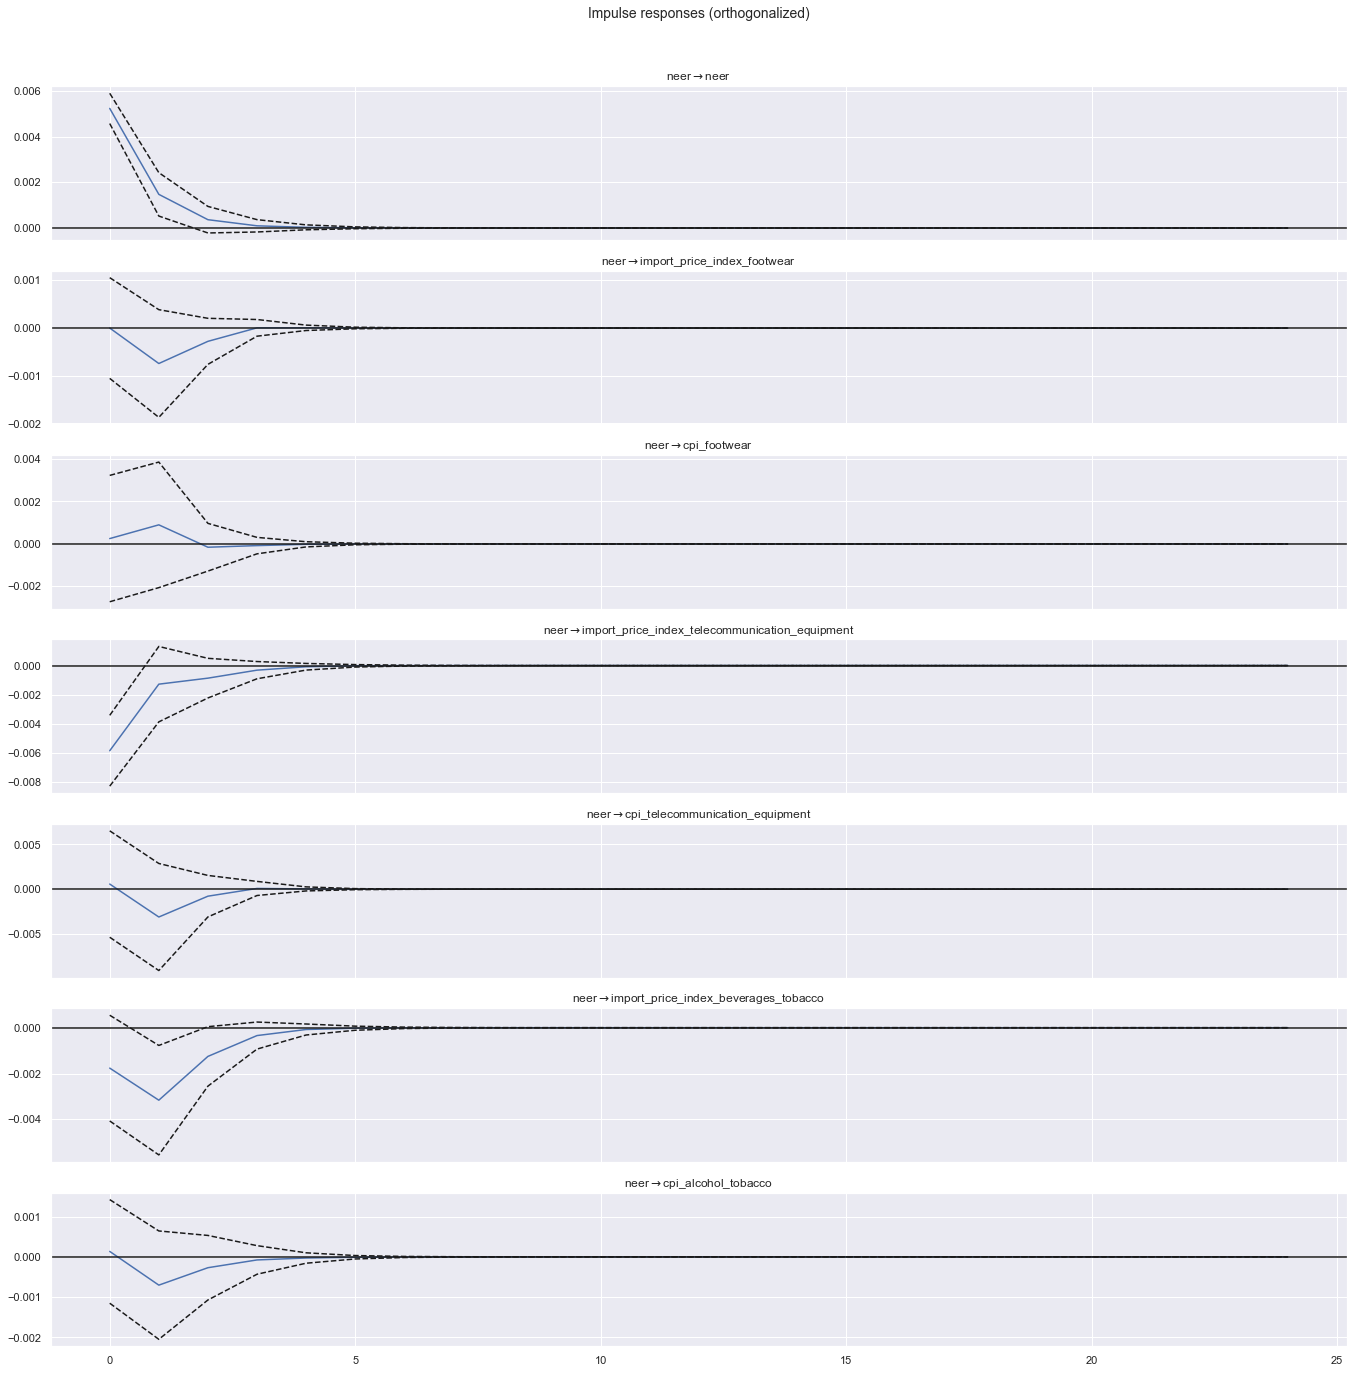

In [91]:
results = model.fit(1) #use 1 because 2nd best in BIC and residual whitenoise
irf = results.irf(24)
irf_plot = irf.plot(orth=True,figsize=(20,20), impulse='neer')

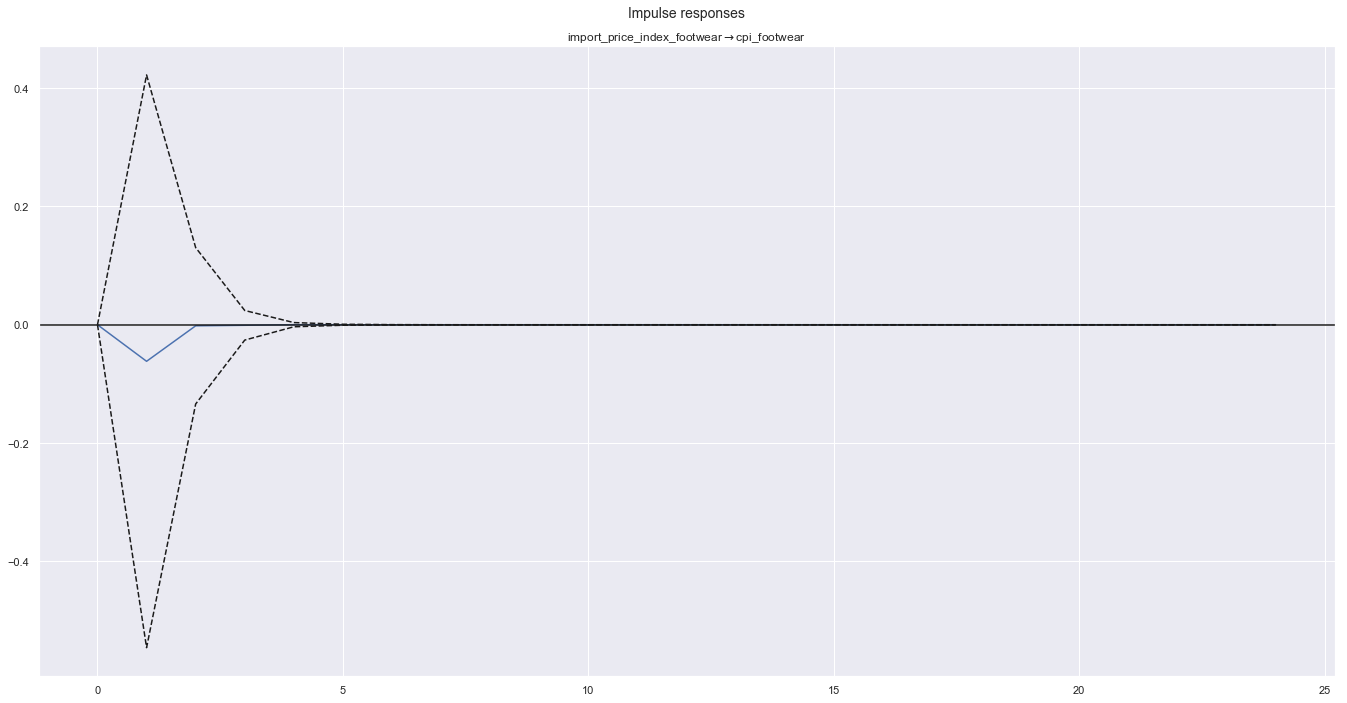

In [92]:
irf_plot = irf.plot(orth=False, figsize=(20,10), impulse='import_price_index_footwear', response='cpi_footwear')

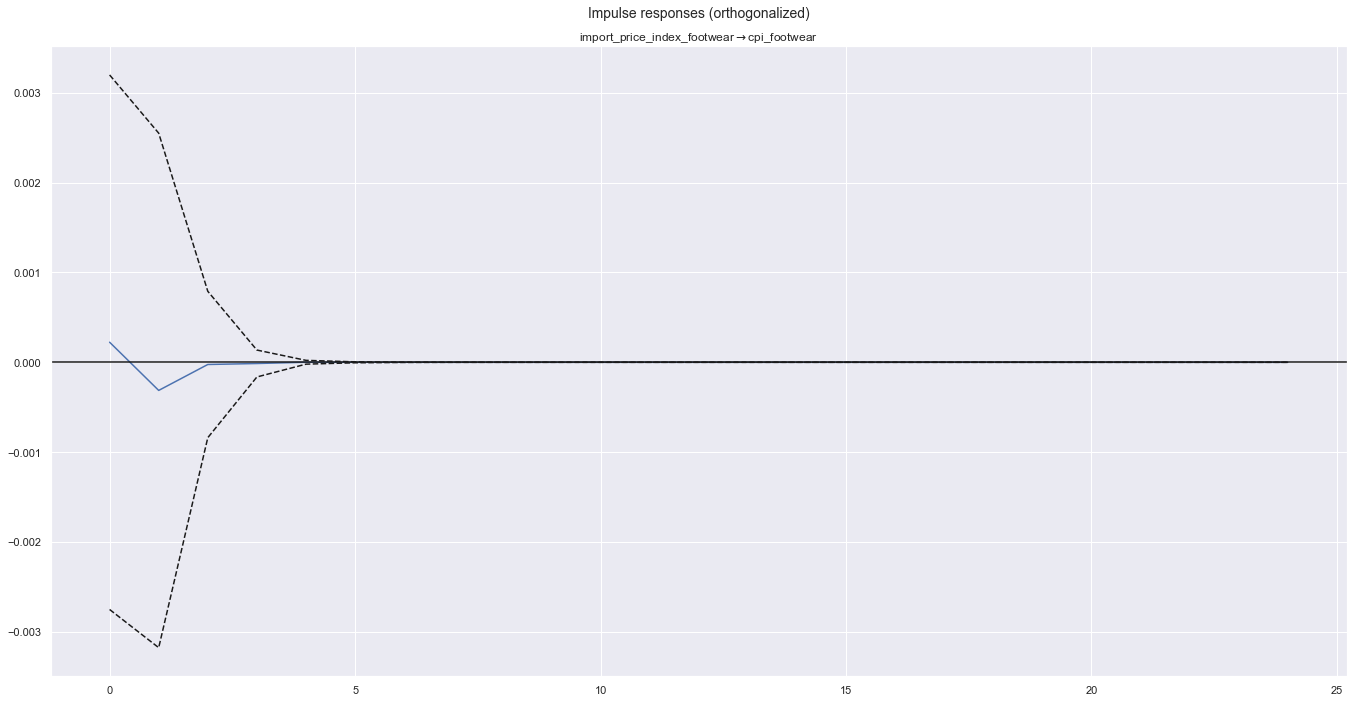

In [93]:
irf_plot = irf.plot(orth=True, figsize=(20,10), impulse='import_price_index_footwear', response='cpi_footwear')

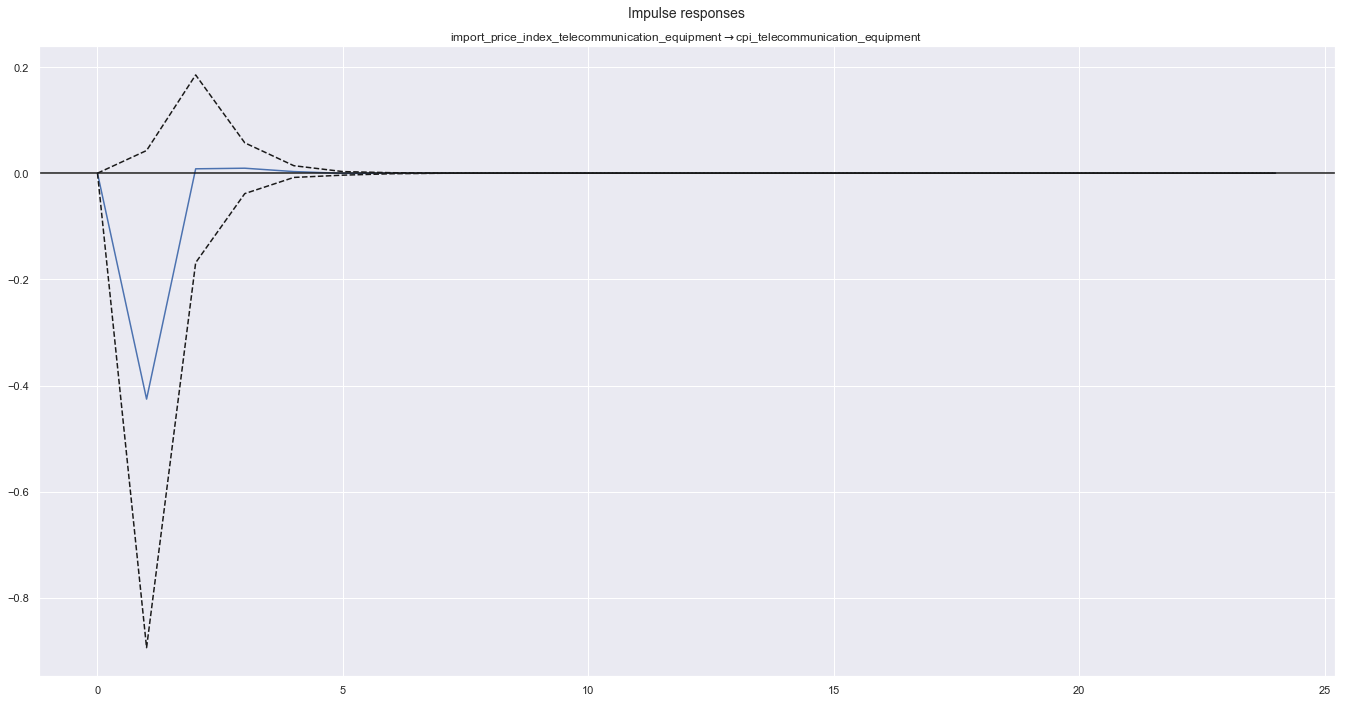

In [94]:
irf_plot = irf.plot(orth=False, figsize=(20,10), impulse='import_price_index_telecommunication_equipment',
                    response='cpi_telecommunication_equipment')

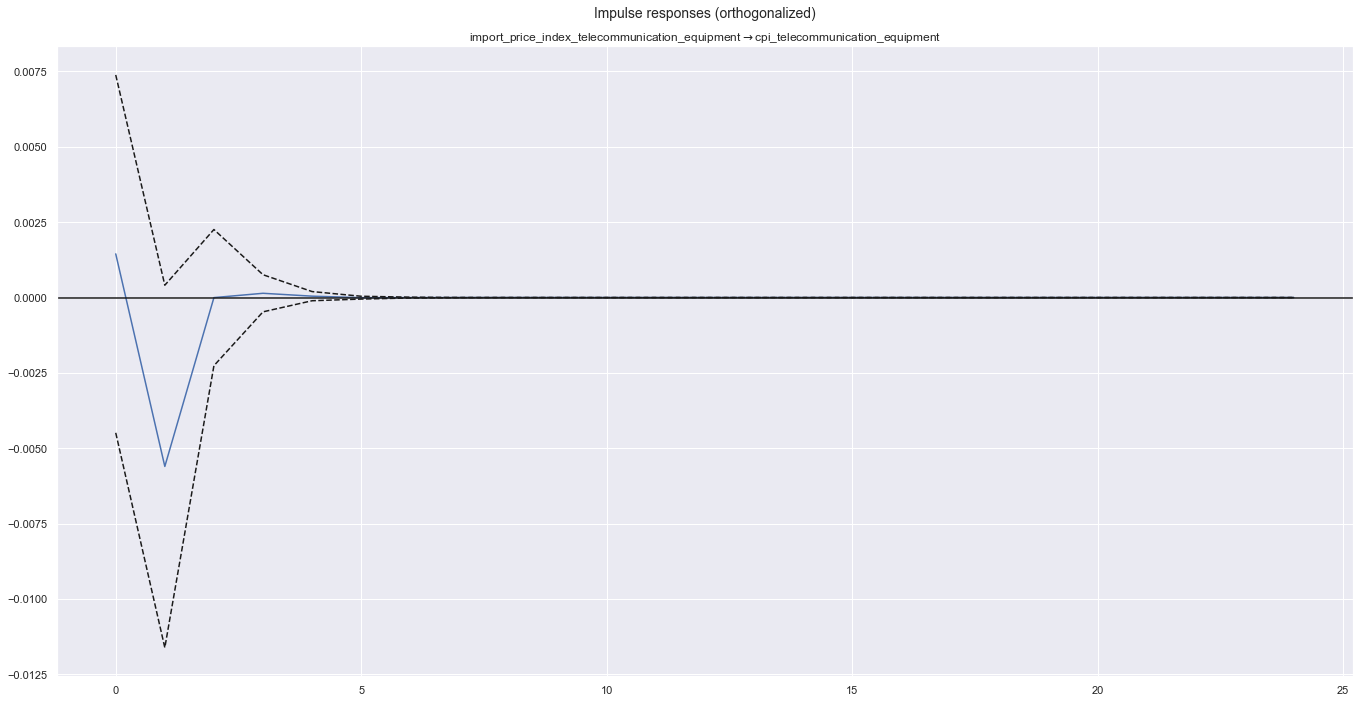

In [95]:
irf_plot = irf.plot(orth=True, figsize=(20,10), impulse='import_price_index_telecommunication_equipment',
                    response='cpi_telecommunication_equipment')

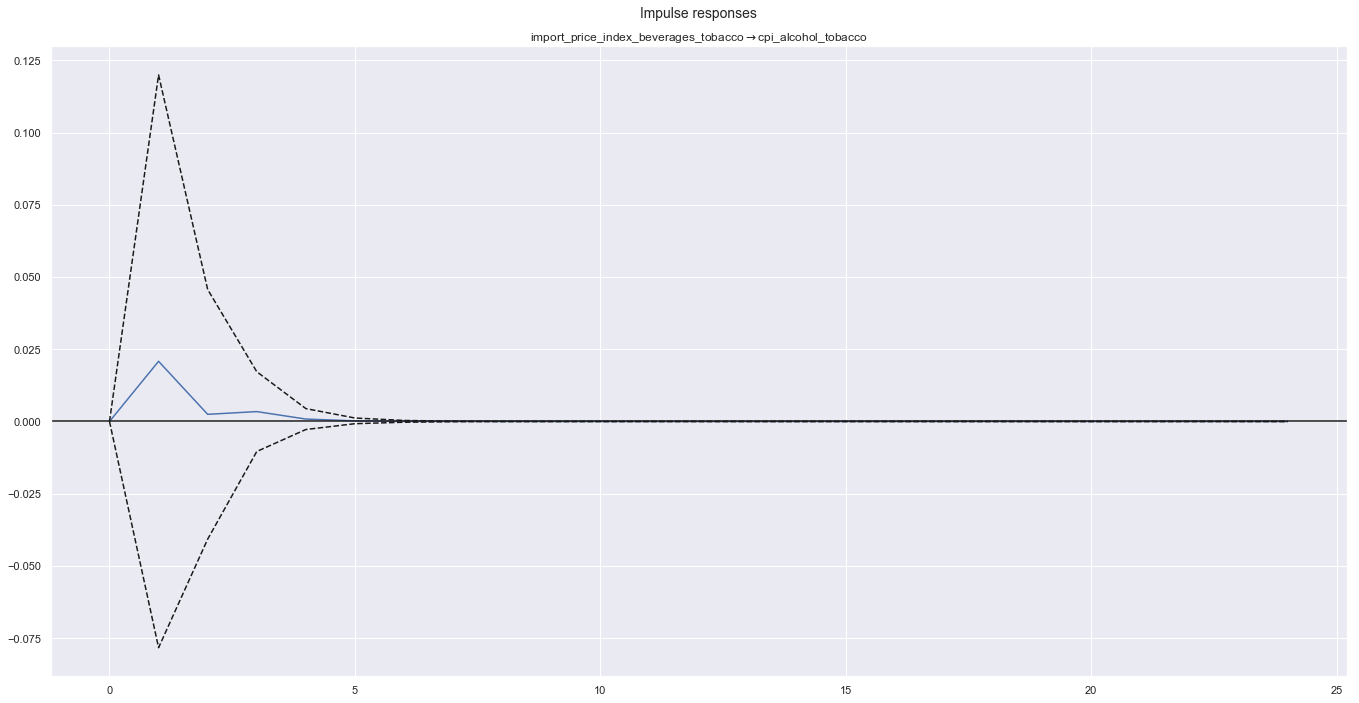

In [96]:
irf_plot = irf.plot(orth=False, figsize=(20,10), impulse='import_price_index_beverages_tobacco', response='cpi_alcohol_tobacco')

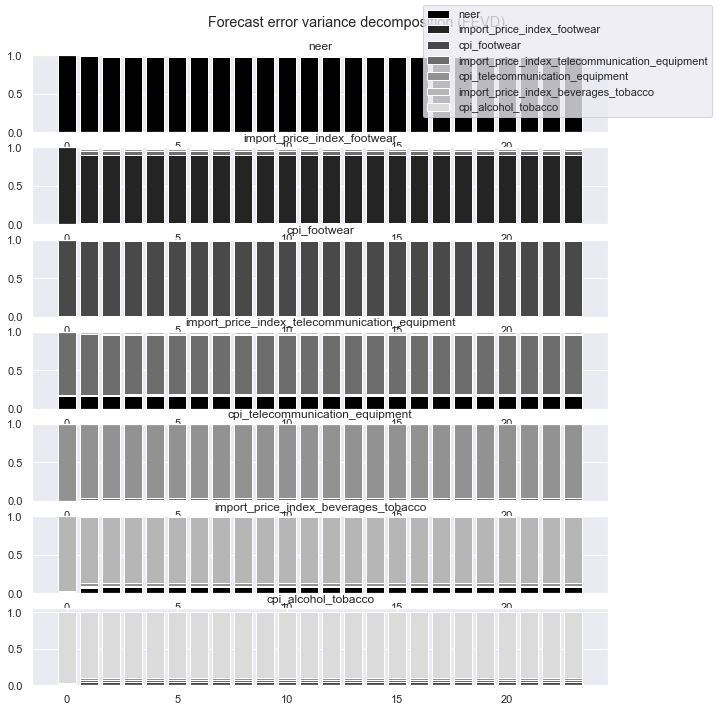

In [97]:
fevd = results.fevd(24).plot()

In [98]:
cols = ['neer', 
       'import_price_index_footwear', 
        'cpi_footwear', 
        'import_price_index_telecommunication_equipment', 
        'cpi_telecommunication_equipment',
       'import_price_index_beverages_tobacco', 
        'cpi_alcohol_tobacco']

coint_results = coint_johansen(np.log(data[cols]+1), det_order=0, k_ar_diff=1)
print_coint_results(coint_results)


--------------------------------------------------
--> Trace Statistics
variable statistic Crit-90% Crit-95%  Crit-99%
r = 0 	 144.3791 120.3673 125.6185 135.9825
r = 1 	 92.0628 91.109 95.7542 104.9637
r = 2 	 59.2764 65.8202 69.8189 77.8202
r = 3 	 35.6538 44.4929 47.8545 54.6815
r = 4 	 21.8884 27.0669 29.7961 35.4628
r = 5 	 9.9918 13.4294 15.4943 19.9349
r = 6 	 0.7622 2.7055 3.8415 6.6349
--------------------------------------------------


In [99]:
vecm_model = VECM(endog = np.log(data[cols]+1), k_ar_diff = 1, coint_rank = 1, deterministic = 'co')
vecm_fit = vecm_model.fit()
vecm_fit.summary()
print(vecm_fit.test_whiteness())

<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 10 is zero: fail to reject at 5% significance level. Test statistic: 451.369, critical value: 483.571>, p-value: 0.273>


C:\Users\Reverse\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [100]:
vecm_irf = vecm_fit.irf(24)

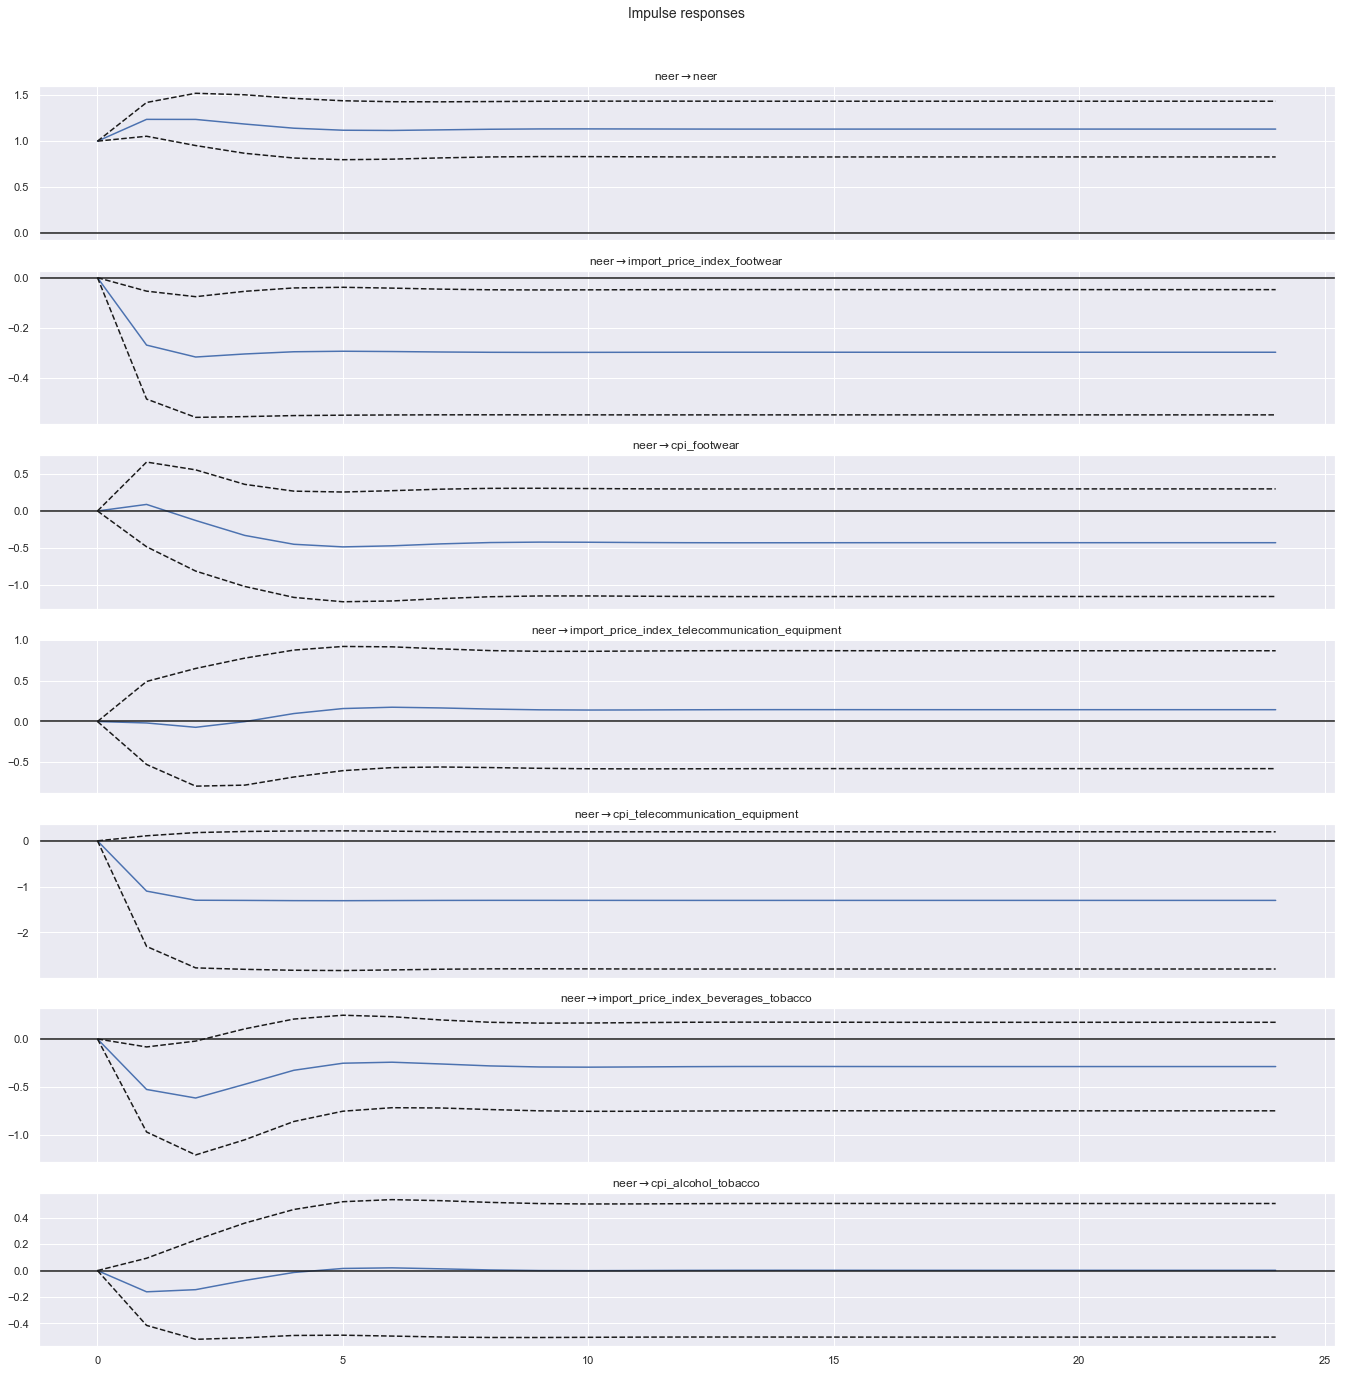

In [101]:
irf_plot = vecm_irf.plot(orth=False, figsize=(20,20), impulse='neer')

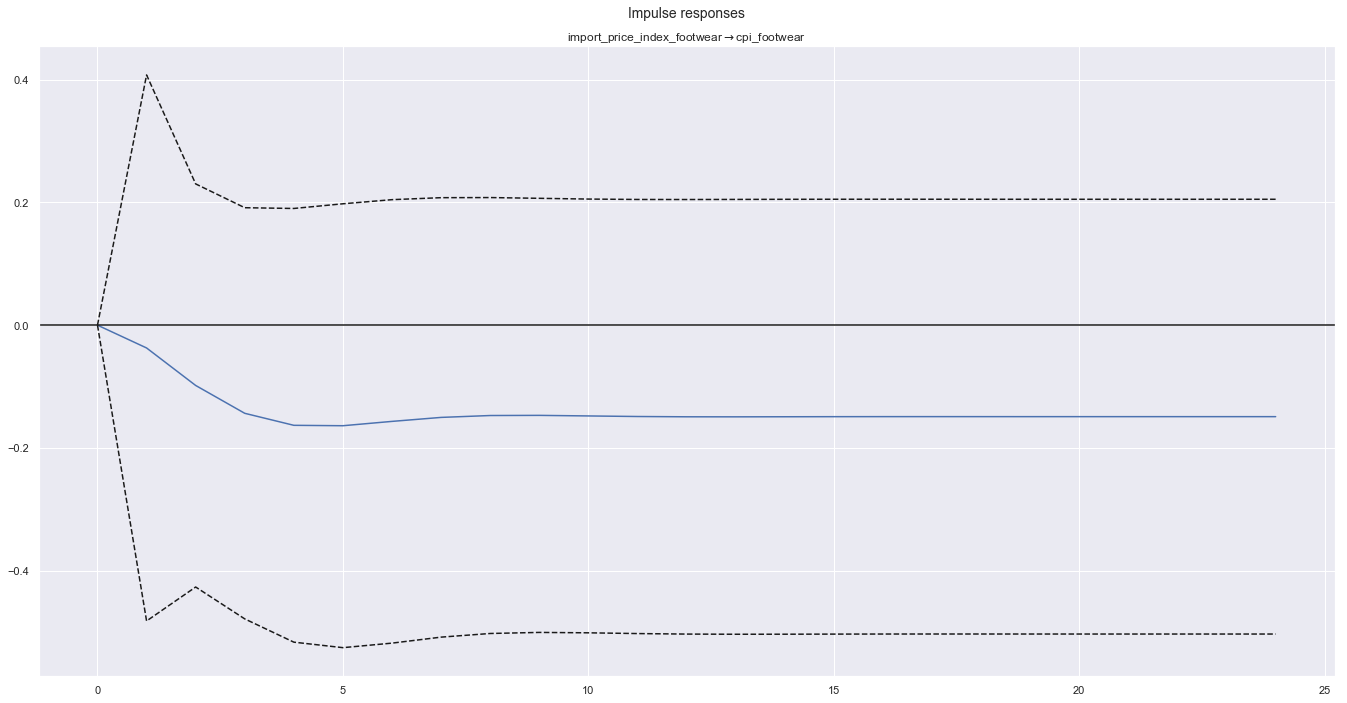

In [102]:
irf_plot = vecm_irf.plot(orth=False, figsize=(20,10), impulse='import_price_index_footwear', response='cpi_footwear')

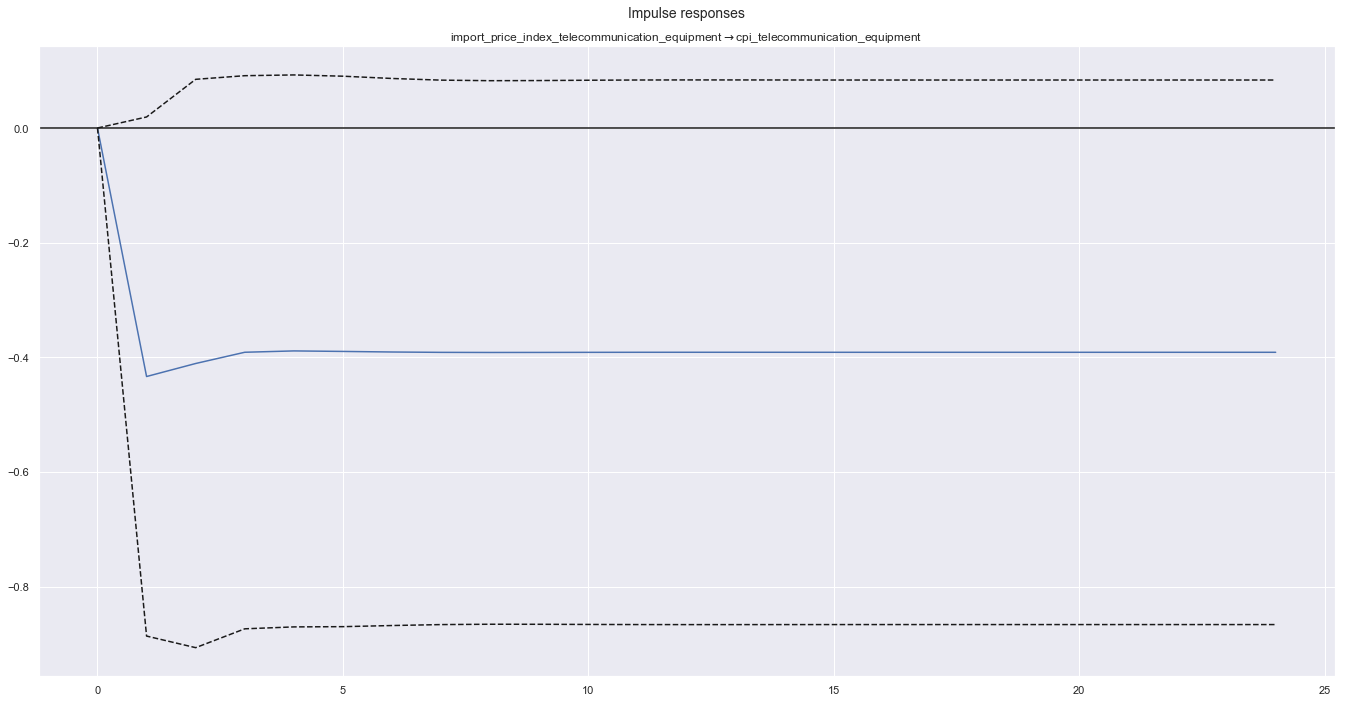

In [103]:
irf_plot = vecm_irf.plot(orth=False, figsize=(20,10), impulse='import_price_index_telecommunication_equipment', response='cpi_telecommunication_equipment')

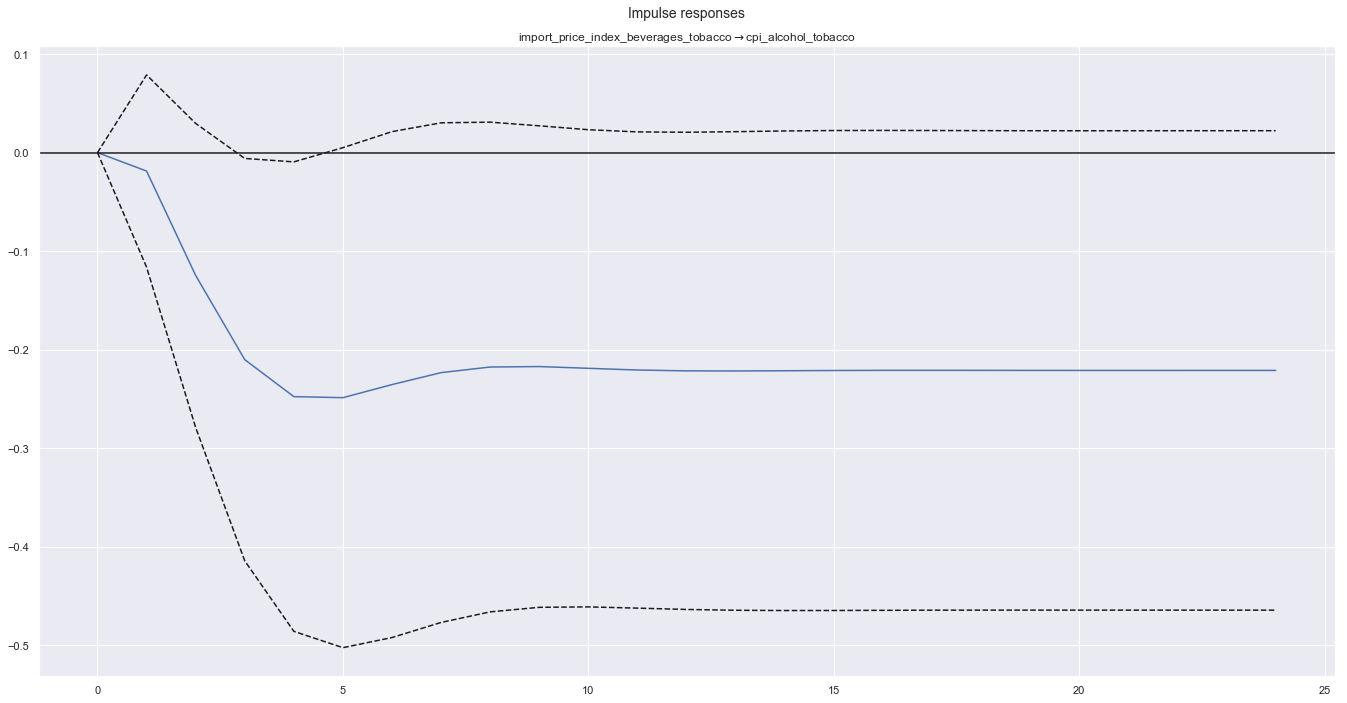

In [104]:
irf_plot = vecm_irf.plot(orth=False, figsize=(20,10), impulse='import_price_index_beverages_tobacco', response='cpi_alcohol_tobacco')